# <center>**SAÉ 15 : Taiter des données** <a class="anchor" id="top"> </a></center>
**<center>Yann Plougonven--Lastennet et Gurvan Mury</center>**
<center>Étudiants en première année de BUT réseaux et télécommunications</center>
<center>à l'IUT de Lannion / Université de Rennes</center>
<center>
<p></p>
<img src="images/illustrations/iut_lannion.jpg" height="100" alt="Logo de l'IUT de Lannion">
<img src="images/illustrations/univ_rennes.jpg" height="100" alt="Logo de l'Université de Rennes">
<img src="images/illustrations/but_rt.png" height="100" alt="Logo du BUT réseaux et télécommunications de l'IUT de Lannion">
</center>

## Sommaire :
* **[Le sujet](#sujet)**
* **[Présentation des outils utilisés](#outils)**
* **[Etape 1 : Collecte des métriques](#1)**
    * [1.1 Code bash de collecte des données](#11)
    * [1.2 Automatisation du lancement du premier script avec cron](#12)
* **[Etape 2 : Variation des métriques](#2)**
    * [2.1 Code bash de modification des données](#21)
    * [2.2 Automatisation du lancement des scripts avec cron](#22)
    * [2.3 Extrait du fichier LOG.csv](#23)
* **[Etape 3 : Traitement des données](#3)**
    * [3.1 Recuperation des donnees avec Python](#31)
    * [3.2 Calcul des statistiques avec Python](#32)
* **[Etape 4 : Visualiation des données](#4)**
    * [4.1 Courbes : Évolution du statut des interfaces au cours du temps](#41)
    * [4.2 Diagramme circulaire : Temps d'utilisation de chaque réseau](#42)
    * [4.3 Diagramme en barres empilées : Durée de connexion à chaque réseau par heure](#43)
    * [4.4 Diagramme 3D en barres : Durée de connexion à chaque réseau selon leurs localisations](#44)
    * [4.5 Diagramme 3D en barres : Durée de connexion à chaque réseau par heure, selon leurs localisations](#45)
* **[Conclusion du projet](#conclusion)**

## Le sujet <a class="anchor" id="sujet"> </a>
Le sujet de notre binôme, pour la Situation d'Évaluation et d'Apprentissage 15 (SAÉ15), était initialement "**Interface réseau**", avec la commande bash "**ip a**". Ce sujet étant relativement peu vaste, nos professeurs nous ont également attribué un second sujet, "**Route réseau**" avec la commande "**ip route**".

Nous réaliserons ce projet sur des machines virtuelles VirtualBox Debian11 fournies par nos professeurs. Le paramétrage de la machine depuis le logiciel VirtualBox permet de créer de nouvelles interfaces réseau sur la machine ("Configuration" > "Réseau").

**Note :** Il est possible de lancer l'exécution de tous les programmes Python d'un seul coup, en cliquant sur le bouton "Run All" (ou similaire) en haut de votre écran.

## Présentation des outils utilisés <a class="anchor" id="outils"> </a>
### ip a :  
`ip a` est une commande bash permettant d'obtenir de nombreuses informations liées aux interfaces de la machine virtuelle.

Nous l'utilisons pour obtenir le nombre d'interfaces présentes et leur statut.

### ip route :
`ip route` est une commande bash permettant d'obtenir les informations liées aux routes configurées sur la machine.

Nous l'utilisons pour connaitre la route par défaut de la machine.

### Bash :
Bash est un interpréteur en ligne de commande développé par le projet GNU. C'est le shell des machines virtuelles que nous utilisons.

### Cron :
Cron est un service permettant l'exécution automatique de commandes bash, à intervalle régulier.

Nous l'utilisons pour lancer les scripts `update_csv.sh` et `change_values.sh` toutes les minutes.

### Python :
Python est un langage de programmation nous permettant d'extraire et de traiter facilement les données contenues dans le csv généré par nos scripts bash.

Pour cela, nous avons utilisé quelques-uns de ses modules, tels que "csv" pour extraire les données, "numpy" pour traiter ces données avec des listes, et "mathplotlib" pour générer des graphiques à partir de ces données.

### Jupyter notbook :
Jupyter notbook est un projet open source permettant de réunir l'ensemble de nos programmes python dans un seul fichier, tout en assurant leur documentation.

### Html : 
L'html nous a permis de mieux intégrer certaines images au notebook, et de positionner une ancre pour chaque titre de manière à pouvoir construire un sommaire cliquable.

### Suite Google : 
Ce travail ayant été réalisé en binôme, la suite Google, et plus particulièrement Google Drive et Google Docs, nous ont été très utiles.
* Drive permet de facilement partager nos fichier tout en conservant leur historique de modification et le nom de l'auteur de la modification.
* Docs permet à deux utilisateurs de modifier en même temps un même document, ce qui a été très utile lors de la rédaction de nos comptes rendus. Son extension codeblock nous a permis de garder la mise en forme de notre code python et bash, lors de son intégration aux comptes rendus.

## Étape 1 <a class="anchor" id="1"> </a>

### 1.1 Code bash de collecte des données <a class="anchor" id="11"> </a>

```bash
#!/bin/bash
# update_csv.sh
# Ce script capture différentes valeurs relatives au fonctionnement du système
# et obtenables grâce aux commandes "ip a" et "ip route".
# Ces valeurs sont ensuite datées et transférées dans un fichier LOG.csv. 
# Paramètres du script: aucun.
# Retourne le code 0.
# Ecrit par Gurvan Mury et Yann Plougonven--Lastennet,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 03/01/2024 par Yann.


### Obtention des valeurs ###

# Obtention de l'heure :
date_epoch=$(date +%s)

# Obtention de l'IP de la route par défaut (potentiellement vide) :
ip_route_defaut=$(ip route | grep default | cut -f 3 -d " ")

# Obtention du nombre total d'interfaces réseau :
nb_int=$(ip a | grep '^[0-9]' | wc -l)

# Obtention du nombre total d'interfaces réseau activées (UP) :
nb_int_up=$(ip a | grep '^[0-9]' | grep 'state UP' |  wc -l)

# Obtention du nombre total d'interfaces réseau désactivées (DOWN) :
nb_int_down=$(ip a | grep '^[0-9]' | grep 'state DOWN' |  wc -l)

# Obtention du nombre total d'interfaces réseau avec le statut UNKNOW :
# Ce nombre est censé rester à 1, car la loopback lo est la seule interface
# censée avoir le statut UNKNOW :
nb_int_unknow=$(ip a | grep '^[0-9]' | grep 'state UNKNOW' |  wc -l)


### Ecriture des valeurs dans le fichier LOG.csv ###
# L'utilisation d'un chemin absolu a l'avantage de nous permettre d'être certain
# de l'emplacement d'enregistrement des données, quel que soit l'emplacement d'exécution de ce script.
echo $date_epoch,$nb_int,$nb_int_up,$nb_int_down,$nb_int_unknow,$ip_route_defaut >> /root/Documents/SAE15/LOG.csv


### Fin de l'éxecution du script ###
echo "$date_epoch : Les informations réseau ont été enregistrées dans root/Documents/SAE15/LOG.csv."
exit 0
```

#### Preuves de fonctionnement :

```bash
root@debian11:~# date +%s
1704199494
root@debian11:~# ip route | grep default | cut -f 3 -d " "
10.0.255.254
root@debian11:~# ip a | grep '^[0-9]' | wc -l
6
root@debian11:~# ip a | grep '^[0-9]' | grep 'state UP' |  wc -l
3
root@debian11:~# ip a | grep '^[0-9]' | grep 'state DOWN' |  wc -l
2
root@debian11:~# ip a | grep '^[0-9]' | grep 'state UNKNOW' |  wc -l
1
```
```bash
root@debian11:~# ip link set enp0s9 down
root@debian11:~# ip a | grep '^[0-9]' | grep 'state UP' |  wc -l
2
root@debian11:~# ip a | grep '^[0-9]' | grep 'state DOWN' |  wc -l
2
root@debian11:~# ip link set enp0s9 up
root@debian11:~# ip a | grep '^[0-9]' | grep 'state UP' |  wc -l
3
root@debian11:~# ip a | grep '^[0-9]' | grep 'state DOWN' |  wc -l
1
```
##### Extrait du csv généré intial, avant le lancement du script change_values.sh :
```csv
1701363601,6,3,2,1,
1701363661,6,3,2,1,
1701363721,6,3,2,1,
1701363781,6,3,2,1,
1701363841,6,3,2,1,
1701363902,6,3,2,1,
1701363961,6,3,2,1,
1701364021,6,3,2,1,
1701364081,6,3,2,1,
1701364141,6,3,2,1,
1701364201,6,3,2,1,
```

### 1.2 Automatisation du lancement du premier script avec cron <a class="anchor" id="12"> </a>

```
* * * * * sh /root/Documents/SAE15/update_csv.sh >> /root/Documents/SAE15/logs_update 2>&1
```

[Retour en haut](#)

## Étape 2 <a class="anchor" id="2"> </a>

### 2.1 Code bash de modification des données <a class="anchor" id="21"> </a>

```bash
#!/bin/bash
# change_values.sh
# Ce script modifie les différentes valeurs relatives au fonctionnement de
# certains services réseaux du système d'exploitation.
# Ces valeurs peuvent être consultées grâce aux commandes "ip a" et "ip route".
# et sont en partie choisies de façon aléatoire.
# Paramètres du script : aucun.
# Retourne le code 0.
# Écrit par Gurvan Mury et Yann Plougonven--Lastennet,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 30/11/2023 par Yann.


### Attendre 2 secondes avant la suite de l'exécution ###

# Cela permet de s'assurer que ce script ne modifie pas les paramètres
# pendant la lecture des données par le script update_csv.sh.
sleep 2


### Générer des entiers aléatoires ###

nb_random_route_defaut=$(shuf -i 0-5 -n1) # Entre 0 et 5 inclus
nb_random_statut_int=$(shuf -i 0-10 -n1) # Entre 0 et 10 inclus
nb_random_supprimer_int=$(shuf -i 0-20 -n1) # Entre 0 et 20 inclus


### Changer la route par défaut ###

# Deux chances sur 5 de définir 10.0.255.254 en route par défaut :
if [ $nb_random_route_defaut = 0 ] || [ $nb_random_route_defaut = 3 ]
then
    ip link set enp0s9 up
    ip addr flush enp0s9
    ip addr add 10.0.0.1/16 dev enp0s9
    ip route add default via 10.0.255.254 
fi

# Une chance sur 5 de définir 10.1.255.254 en route par défaut :
if [ $nb_random_route_defaut = 1 ]
then
    ip link set enp0s9 up
    ip addr flush enp0s9
    ip addr add 10.1.0.1/16 dev enp0s9
    ip route add default via 10.1.255.254 
fi

# Une chance sur 5 de définir 10.2.255.254 en route par défaut :
if [ $nb_random_route_defaut = 2 ]
then
    ip link set enp0s9 up
    ip addr flush enp0s9
    ip addr add 10.2.0.1/16 dev enp0s9
    ip route add default via 10.2.255.254
fi


### Désactiver et activer aléatoirement des interfaces ###

# Une chance sur 5 de désactiver enp0s8 :
if [ $nb_random_statut_int = 1 ] || [ $nb_random_statut_int = 4 ]
then
    ip link set down enp0s8
fi

# Une chance sur 10 d'activer enp0s8 :
if [ $nb_random_statut_int = 5 ]
then
    ip link set up enp0s8
fi

# Une chance sur 10 de désactiver enp0s10 :
if [ $nb_random_statut_int = 2 ]
then
    ip link set down enp0s10
fi

# Une chance sur 10 d'activer enp0s10 :
if [ $nb_random_statut_int = 6 ]
then
    ip link set up enp0s10
fi

# Une chance sur 10 de désactiver enp0s17 : 
if [ $nb_random_statut_int = 3 ]
then
    ip link set down enp0s17
fi

# Une chance sur 10 d'activer enp0s17 : 
if [ $nb_random_statut_int = 7 ]
then
    ip link set up enp0s17
fi


### Supprimer une interface ###

# Sur certaines machines virtuelles, 
# docker0 est la seule interface pouvant être supprimée.
# Il est possible de la réactiver au redémarrage de la machine virtuelle.

# 1 chance sur 20 de supprimer l'interface docker0 :
if [ $nb_random_supprimer_int = 0 ] 
then 
    ip link delete docker0
fi


### Fin de l'execution du script ###

echo "$(date +%s) : Le script de changement des valeurs a bien été exécuté."
exit 0
```

#### Preuves de fonctionnement :

##### Preuves du bon fonctionnement de la génération de valeurs aléatoires :
```bash
root@debian11:~# nb_random_route_defaut=$(shuf -i 0-5 -n1)
root@debian11:~# nb_random_statut_int=$(shuf -i 0-10 -n1)
root@debian11:~# nb_random_supprimer_int=$(shuf -i 0-20 -n1)
root@debian11:~# echo $nb_random_route_defaut
3
root@debian11:~# echo $nb_random_statut_int
10
root@debian11:~# echo $nb_random_supprimer_int
12
root@debian11:~# nb_random_supprimer_int=$(shuf -i 0-20 -n1)
root@debian11:~# echo $nb_random_supprimer_int
19
root@debian11:~# nb_random_statut_int=$(shuf -i 0-10 -n1)
root@debian11:~# echo $nb_random_statut_int
2
```
##### Preuves du bon fonctionnement du système de modification de la route par défaut et du système d'activation/désactivation des interfaces :
```bash
root@debian11:~# ip link set enp0s9 down
root@debian11:~# ip link
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN mode DEFAULT group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
2: enp0s8: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:b4:63:38 brd ff:ff:ff:ff:ff:ff
3: enp0s9: <BROADCAST,MULTICAST> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:4a:5b:72 brd ff:ff:ff:ff:ff:ff
4: enp0s10: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:3a:c0:61 brd ff:ff:ff:ff:ff:ff
5: enp0s17: <BROADCAST,MULTICAST> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:9b:e1:6f brd ff:ff:ff:ff:ff:ff
root@debian11:~# ip link set enp0s9 up
root@debian11:~# ip link
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN mode DEFAULT group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
2: enp0s8: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:b4:63:38 brd ff:ff:ff:ff:ff:ff
3: enp0s9: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:4a:5b:72 brd ff:ff:ff:ff:ff:ff
4: enp0s10: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:3a:c0:61 brd ff:ff:ff:ff:ff:ff
5: enp0s17: <BROADCAST,MULTICAST> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:9b:e1:6f brd ff:ff:ff:ff:ff:ff
root@debian11:~# ip addr flush enp0s9
root@debian11:~# ip addr add 10.1.0.1/16 dev enp0s9
root@debian11:~# ip route add default via 10.1.255.254 
root@debian11:~# ip route
default via 10.1.255.254 dev enp0s9 
10.1.0.0/16 dev enp0s9 proto kernel scope link src 10.1.0.1 
root@debian11:~# nb_random_route_defaut=0
root@debian11:~# echo $nb_random_route_defaut
0
root@debian11:~# if [ $nb_random_route_defaut = 0 ] || [ $nb_random_route_defaut = 3 ]
then
    ip link set enp0s9 up
    ip addr flush enp0s9
    ip addr add 10.0.0.1/16 dev enp0s9
    ip route add default via 10.0.255.254 
fi
root@debian11:~# ip route
default via 10.0.255.254 dev enp0s9 
10.0.0.0/16 dev enp0s9 proto kernel scope link src 10.0.0.1 
```
##### Preuves du bon fonctionnement du système de suppresion de l'interface docker0 :
```bash
root@debian11:~# ip link
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN mode DEFAULT group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
2: enp0s8: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:b4:63:38 brd ff:ff:ff:ff:ff:ff
3: enp0s9: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:4a:5b:72 brd ff:ff:ff:ff:ff:ff
4: enp0s10: <BROADCAST,MULTICAST> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:3a:c0:61 brd ff:ff:ff:ff:ff:ff
5: enp0s17: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:9b:e1:6f brd ff:ff:ff:ff:ff:ff
6: docker0: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc noqueue state DOWN mode DEFAULT group default 
    link/ether 02:42:86:70:31:81 brd ff:ff:ff:ff:ff:ff
root@debian11:~# ip link delete docker0
root@debian11:~# ip link
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN mode DEFAULT group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
2: enp0s8: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:b4:63:38 brd ff:ff:ff:ff:ff:ff
3: enp0s9: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:4a:5b:72 brd ff:ff:ff:ff:ff:ff
4: enp0s10: <BROADCAST,MULTICAST> mtu 1500 qdisc pfifo_fast state DOWN mode DEFAULT group default qlen 1000
    link/ether 08:00:27:3a:c0:61 brd ff:ff:ff:ff:ff:ff
5: enp0s17: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc pfifo_fast state UP mode DEFAULT group default qlen 1000
    link/ether 08:00:27:9b:e1:6f brd ff:ff:ff:ff:ff:ff
```

### 2.2 Automatisation du lancement des scripts avec cron <a class="anchor" id="22"> </a>

```
* * * * * sh /root/Documents/SAE15/update_csv.sh >> /root/Documents/SAE15/logs_update 2>&1
* * * * * sh /root/Documents/SAE15/change_values.sh >> /root/Documents/SAE15/logs_change 2>&1
```

Très utile pendant la programmation : « `>> /root/Documents/SAE15/logs_update 2>&1` » permet d'enregistrer des logs dans les fichiers [logs_update](logs/logs_update) et [logs_change](logs/logs_change).

Nous avons choisi d'exécuter les fichiers toutes les minutes, soit le délai minimum permis par cron, car aucune contrainte technique ne nous obligeait à définir un délai plus élevé.

### 2.3 Extrait du fichier LOG.csv<a class="anchor" id="23"> </a>

```csv
1701363601,6,3,2,1,10.1.255.254
1701363661,6,3,2,1,10.1.255.254
1701363721,6,2,3,1,10.0.255.254
1701363781,6,3,2,1,10.0.255.254
1701363841,6,3,2,1,10.0.255.254
1701363902,6,3,2,1,10.0.255.254
1701363961,6,3,2,1,10.0.255.254
1701364021,6,3,2,1,
1701364081,6,3,2,1,10.2.255.254
1701364141,6,2,3,1,10.1.255.254
1701364201,6,2,3,1,10.0.255.254
```

**Note :** Dans les conditions expérimentales dans lesquelles nous avons fait tourner ces deux scripts bash, le système d'exploitation se permettait de régulièrement supprimer la route par défaut configurée par change_values.sh.

[Retour en haut](#)

## Étape 3 <a class="anchor" id="3"> </a>

### 3.1 Récuperation des données avec Python <a class="anchor" id="31"> </a>
L'objectif est d'importer dans Python les données des fichiers [LOG.csv](logs/LOG.csv), [LOG1.csv](logs/LOG1.csv), [LOG2.csv](logs/LOG2.csv) ou [LOG3.csv](logs/LOG3.csv).

In [1]:
# recuperation_donnees.py
# Ce programme permet de récupérer le contenu d'un fichier csv, puis de les traiter pour les rendre utilisables.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 03/01/2024 par Yann.

### Importation des modules ###
import csv
import datetime

### Initialisation des variables ###
chemin_fichier : str

### Définition du chemin du fichier csv à traiter ###
chemin_fichier = input('Chemin relatif du fichier csv à traiter (ou "", "1", "2", "3") :')
if chemin_fichier == "":
    chemin_fichier = "logs/LOG.csv"
elif chemin_fichier == "1" or "2" or "3":
    chemin_fichier = f"logs/LOG{chemin_fichier}.csv"

### Fonctions de traitement des fichiers csv ###


def put_csv_in_list(chemin_fichier : str) -> list[list[str]]:
    """Récupère les données contenues dans un fichier au format csv, et les stocke ligne par ligne dans une liste python.

    Args:
        chemin_fichier (str): chemin relatif vers le fichier csv à traiter.

    Returns:
        list[list[str]]: Liste contenant autant de listes que le fichier csv a de ligne. 
        Chaque ligne du csv est stockée dans une sous-liste différente.
    """
    ligne : str
    liste : list[str] = []
    with open(chemin_fichier, newline='') as csvfile :
        datareader = csv.reader(csvfile, delimiter= ',')
        for ligne in datareader:
            liste.append(ligne)
    return liste


def put_csv_in_dict(chemin_fichier : str) -> dict[str, list[str]]:
    """Récupère les données contenues dans un fichier au format csv, et les stocke dans un dictionnaire python.

    Args:
        chemin_fichier (str): chemin relatif vers le fichier csv à traiter.

    Returns:
        dict[str, list[str]]: dictionnaire contenant autant de clés (str) et de valeurs (listes) que le fichier csv a de ligne. 
        Chaque ligne du csv est stockée dans une relation clé:valeur différente.
    """
    i : int
    dico : dict[str] = {}
    liste : list[str] = put_csv_in_list(chemin_fichier)
    for i in range(len(liste)):
        dico[liste[i][0]] = liste[i][1:]
    return dico


def epoch_to_date(epochtimes : list[int]) -> list[str]:
    """Transforme chaque minutes au format epoch de la liste passée en paramètre, en des heures facilement lisibles par l'humain.

    Args:
        epochtimes (list[int]): liste contenant des heures au fomat epoch.

    Returns:
        list[str]: liste contenant des heures dans un format lisible par l'humain.
    """
    epoch : int
    date : str
    resultat : list[str] = []
    for epoch in epochtimes:
        date = datetime.datetime.fromtimestamp(epoch).strftime('%H:%M')
        resultat.append(date)
    return resultat


def transposer(chemin_fichier : str) -> list:
    """Transpose les données contenues dans un fichier au format csv, et les stocke dans une liste python contenant autant de sous-listes que le fichier csv a de valeur par ligne.
    Converti les données du format str au format int, si possible.
    Ajoute une sous-liste list[str], à la fin de la liste de retour, contenant les temps convertis du format epoch au format lisible par l'humain.

    Args:
        chemin_fichier (str): chemin relatif vers le fichier csv à traiter.

    Returns:
        list: contient autant de sous-listes que le fichier csv a de valeur par ligne, plus une liste (list[str]) contenant les temps de la première sous-liste (list[int]),
        convertis du format epoch au format lisible par l'humain (str).
        Une sous-liste correspond à une métrique contenu dans le fichier csv.
    """
    i : int
    j : int
    liste : list[str] = put_csv_in_list(chemin_fichier)
    une_valeur : str
    resultat : list[list[str]] = [[] for i in range(len(liste[0]) + 1)]
    #resultat : list[list[str]] = [[]]*len(liste[0]) # Avec cette méthode, les x listes seraient liées entre elles, ce qui pose des problèmes.

    for i in range(len(liste[0])):
        for j in range(len(liste)):
            une_valeur = liste[j][i]

            if une_valeur.isdigit(): # Si la valeur peut être représentée par un entier, la stocker sous forme d'entier
                resultat[i].append(int(une_valeur))

            else: # Si la valeur ne peut pas être représentée par un entier, la stocker sous forme de chaine de caractère
                resultat[i].append(une_valeur)

    resultat[-1] = epoch_to_date(resultat[0]) # Ajouter une liste contenant l'heure dans un format lisible

    return resultat


### Enregistrement des résultats des 3 premières fonctions de traitement des données ###
liste_donnees : list[list[str]]
liste_donnees = put_csv_in_list(chemin_fichier)

dictionnaire_donnees : dict[str, list[str]]
dictionnaire_donnees = put_csv_in_dict(chemin_fichier)

transposee : list
transposee = transposer(chemin_fichier)


print(f"liste_donnees : {liste_donnees}")
print(f"dictionnaire_donnees : {dictionnaire_donnees}")
print(f"transposee : {transposee}")

liste_donnees : [['1701363601', '6', '3', '2', '1', '10.1.255.254'], ['1701363661', '6', '3', '2', '1', '10.1.255.254'], ['1701363721', '6', '2', '3', '1', '10.0.255.254'], ['1701363781', '6', '3', '2', '1', '10.0.255.254'], ['1701363841', '6', '3', '2', '1', '10.0.255.254'], ['1701363902', '6', '3', '2', '1', '10.0.255.254'], ['1701363961', '6', '3', '2', '1', '10.0.255.254'], ['1701364021', '6', '3', '2', '1', ''], ['1701364081', '6', '3', '2', '1', '10.2.255.254'], ['1701364141', '6', '2', '3', '1', '10.1.255.254'], ['1701364201', '6', '2', '3', '1', '10.0.255.254'], ['1701364261', '6', '3', '2', '1', '10.0.255.254'], ['1701364321', '6', '2', '3', '1', '10.0.255.254'], ['1701364381', '6', '2', '3', '1', '10.0.255.254'], ['1701364446', '6', '2', '3', '1', '10.0.255.254'], ['1701364501', '6', '2', '3', '1', '10.0.255.254'], ['1701364561', '6', '2', '3', '1', '10.0.255.254'], ['1701364621', '6', '2', '3', '1', '10.2.255.254'], ['1701364681', '6', '2', '3', '1', ''], ['1701364741', '6',

#### Preuves de fonctionnement :

```python
PS C:\Users\ploug\OneDrive\Documents\COURS\SAE15\Main> & C:/Users/ploug/AppData/Local/Microsoft/WindowsApps/python3.11.exe c:/Users/ploug/OneDrive/Documents/COURS/SAE15/Main/recuperation_donnees.py
Chemin relatif du fichier csv à traiter (ou "", "1", "2", "3") :
liste_donnees : [['1701363601', '6', '3', '2', '1', '10.1.255.254'], ['1701363661', '6', '3', '2', '1', '10.1.255.254'], ['1701363721', '6', '2', '3', '1', '10.0.255.254'], ['1701363781', '6', '3', '2', '1', '10.0.255.254'], ['1701363841', '6', '3', '2', '1', '10.0.255.254'], ['1701363902', '6', '3', '2', '1', '10.0.255.254'], ['1701363961', '6', '3', '2', '1', '10.0.255.254'], ['1701364021', '6', '3', '2', '1', ''], ['1701364081', '6', '3', '2', '1', '10.2.255.254'], ['1701364141', '6', '2', '3', '1', '10.1.255.254'], ['1701364201', '6', '2', '3', '1', '10.0.255.254'], ['1701364261', '6', '3', '2', '1', '10.0.255.254'], ['1701364321', '6', '2', '3', '1', '10.0.255.254'], ['1701364381', '6', '2', '3', '1', '10.0.255.254'], ['1701364446', '6', '2', '3', '1', '10.0.255.254'], ['1701364501', '6', '2', '3', '1', '10.0.255.254'], ['1701364561', '6', '2', '3', '1', '10.0.255.254'], ['1701364621', '6', '2', '3', '1', '10.2.255.254'], ['1701364681', '6', '2', '3', '1', ''], ['1701364741', '6', '2', '3', '1', '10.1.255.254'], ['1701364801', '6', '2', '3', '1', '10.1.255.254'], ['1701364861', '6', '2', '3', '1', '10.1.255.254'], ['1701364921', '6', '2', '3', '1', '10.1.255.254'], ['1701364981', '6', '3', '2', '1', '10.1.255.254'], ['1701365041', '5', '3', '1', '1', '10.1.255.254'], ['1701365101', '5', '3', '1', '1', '10.1.255.254'], ['1701365161', '5', '3', '1', '1', '10.1.255.254'], ['1701365221', '5', '3', '1', '1', '10.2.255.254'], ['1701365281', '5', '3', '1', '1', '10.2.255.254'], ['1701365341', '5', '4', '0', '1', '10.1.255.254'], ['1701365401', '5', '4', '0', '1', ''], ['1701365461', '5', '4', '0', '1', '10.1.255.254'], ['1701365521', '5', '3', '1', '1', '10.0.255.254'], ['1701365581', '5', '3', '1', '1', '10.0.255.254'], ['1701365641', '5', '3', '1', '1', '10.0.255.254'], ['1701365701', '5', '3', '1', '1', '10.0.255.254'], ['1701365761', '5', '3', '1', '1', '10.0.255.254'], ['1701365821', '5', '4', '0', '1', '10.0.255.254'], ['1701365881', '5', '3', '1', '1', '10.0.255.254'], ['1701365941', '5', '3', '1', '1', '10.0.255.254'], ['1701366001', '5', '2', '2', '1', '10.0.255.254'], ['1701366061', '5', '2', '2', '1', ''], ['1701366121', '5', '3', '1', '1', '10.0.255.254'], ['1701366181', '5', '3', '1', '1', '10.1.255.254'], ['1701366241', '5', '3', '1', '1', '10.1.255.254'], ['1701366301', '5', '3', '1', '1', '10.1.255.254'], ['1701366361', '5', '3', '1', '1', '10.1.255.254'], ['1701366421', '5', '3', '1', '1', '10.0.255.254'], ['1701366481', '5', '3', '1', '1', '10.0.255.254'], ['1701366541', '5', '3', '1', '1', '10.2.255.254'], ['1701366601', '5', '3', '1', '1', '10.0.255.254'], ['1701366661', '5', '2', '2', '1', '10.0.255.254'], ['1701366721', '5', '2', '2', '1', '10.0.255.254'], ['1701366781', '5', '2', '2', '1', ''], ['1701366842', '5', '2', '2', '1', '10.0.255.254'], ['1701366901', '5', '2', '2', '1', '10.0.255.254'], ['1701366961', '5', '2', '2', '1', '10.0.255.254'], ['1701367021', '5', '2', '2', '1', '10.0.255.254'], ['1701367081', '5', '2', '2', '1', '10.2.255.254'], ['1701367141', '5', '2', '2', '1', '10.0.255.254'], ['1701367201', '5', '2', '2', '1', '10.0.255.254'], ['1701367261', '5', '2', '2', '1', '10.0.255.254'], ['1701367321', '5', '2', '2', '1', '10.2.255.254'], ['1701367381', '5', '2', '2', '1', '10.2.255.254'], ['1701367441', '5', '2', '2', '1', ''], ['1701367501', '5', '2', '2', '1', ''], ['1701367561', '5', '2', '2', '1', '10.2.255.254'], ['1701367621', '5', '2', '2', '1', '10.2.255.254'], ['1701367681', '5', '2', '2', '1', '10.2.255.254'], ['1701367741', '5', '1', '3', '1', '10.0.255.254'], ['1701367801', '5', '1', '3', '1', '10.0.255.254'], ['1701367861', '5', '2', '2', '1', '10.0.255.254'], ['1701367921', '5', '1', '3', '1', '10.0.255.254'], ['1701367981', '5', '1', '3', '1', '10.0.255.254'], ['1701368042', '5', '2', '2', '1', '10.0.255.254'], ['1701368101', '5', '2', '2', '1', '10.1.255.254'], ['1701368161', '5', '1', '3', '1', ''], ['1701368221', '5', '1', '3', '1', '10.1.255.254'], ['1701368281', '5', '1', '3', '1', '10.1.255.254'], ['1701368341', '5', '1', '3', '1', '10.1.255.254'], ['1701368401', '5', '2', '2', '1', '10.0.255.254'], ['1701368461', '5', '2', '2', '1', '10.0.255.254'], ['1701368521', '5', '2', '2', '1', '10.2.255.254'], ['1701368581', '5', '2', '2', '1', '10.2.255.254'], ['1701368641', '5', '2', '2', '1', '10.2.255.254'], ['1701368701', '5', '2', '2', '1', '10.0.255.254'], ['1701368761', '5', '2', '2', '1', '10.0.255.254'], ['1701368821', '5', '2', '2', '1', ''], ['1701368881', '5', '3', '1', '1', '10.0.255.254'], ['1701368941', '5', '3', '1', '1', '10.0.255.254'], ['1701369001', '5', '3', '1', '1', '10.1.255.254'], ['1701369061', '5', '3', '1', '1', '10.2.255.254'], ['1701369121', '5', '2', '2', '1', '10.0.255.254'], ['1701369182', '5', '2', '2', '1', '10.1.255.254'], ['1701369241', '5', '2', '2', '1', '10.1.255.254'], ['1701369301', '5', '2', '2', '1', '10.1.255.254'], ['1701369361', '5', '2', '2', '1', '10.1.255.254'], ['1701369421', '5', '2', '2', '1', '10.1.255.254'], ['1701369481', '5', '2', '2', '1', '10.1.255.254'], ['1701369541', '5', '3', '1', '1', ''], ['1701369601', '5', '2', '2', '1', '10.0.255.254'], ['1701369661', '5', '2', '2', '1', '10.1.255.254'], ['1701369721', '5', '2', '2', '1', '10.2.255.254'], ['1701369781', '5', '2', '2', '1', '10.1.255.254'], ['1701369841', '5', '2', '2', '1', '10.1.255.254'], ['1701369901', '5', '3', '1', '1', '10.1.255.254'], ['1701369961', '5', '2', '2', '1', '10.0.255.254'], ['1701370021', '5', '3', '1', '1', '10.0.255.254'], ['1701370081', '5', '4', '0', '1', '10.0.255.254'], ['1701370141', '5', '4', '0', '1', '10.0.255.254'], ['1701370201', '5', '4', '0', '1', ''], ['1701370261', '5', '4', '0', '1', '10.2.255.254'], ['1701370321', '5', '3', '1', '1', '10.0.255.254'], ['1701370381', '5', '3', '1', '1', '10.2.255.254'], ['1701370441', '5', '2', '2', '1', '10.0.255.254'], ['1701370501', '5', '2', '2', '1', '10.0.255.254'], ['1701370561', '5', '2', '2', '1', '10.0.255.254'], ['1701370621', '5', '3', '1', '1', '10.0.255.254'], ['1701370681', '5', '2', '2', '1', '10.0.255.254'], ['1701370741', '5', '2', '2', '1', '10.0.255.254'], ['1701370801', '5', '1', '3', '1', '10.0.255.254'], ['1701370861', '5', '2', '2', '1', '10.0.255.254'], ['1701370921', '5', '2', '2', '1', ''], ['1701370981', '5', '1', '3', '1', '10.2.255.254'], ['1701371041', '5', '1', '3', '1', '10.2.255.254'], ['1701371101', '5', '1', '3', '1', '10.2.255.254'], ['1701371161', '5', '1', '3', '1', '10.1.255.254'], ['1701371222', '5', '2', '2', '1', '10.2.255.254'], ['1701371281', '5', '2', '2', '1', '10.2.255.254'], ['1701371341', '5', '2', '2', '1', '10.0.255.254'], ['1701371401', '5', '3', '1', '1', '10.0.255.254'], ['1701371461', '5', '3', '1', '1', '10.2.255.254'], ['1701371521', '5', '3', '1', '1', '10.1.255.254'], ['1701371581', '5', '3', '1', '1', ''], ['1701371641', '5', '3', '1', '1', '10.0.255.254'], ['1701371701', '5', '3', '1', '1', '10.0.255.254'], ['1701371761', '5', '3', '1', '1', '10.1.255.254'], ['1701371821', '5', '2', '2', '1', '10.1.255.254'], ['1701371881', '5', '2', '2', '1', '10.0.255.254'], ['1701371941', '5', '2', '2', '1', '10.1.255.254'], ['1701372001', '5', '2', '2', '1', '10.1.255.254'], ['1701372061', '5', '2', '2', '1', '10.0.255.254'], ['1701372121', '5', '3', '1', '1', '10.1.255.254'], ['1701372181', '5', '3', '1', '1', '10.1.255.254'], ['1701372241', '5', '4', '0', '1', '10.1.255.254'], ['1701372301', '5', '4', '0', '1', ''], ['1701372361', '5', '4', '0', '1', ''], ['1701372421', '5', '3', '1', '1', ''], ['1701372481', '5', '2', '2', '1', ''], ['1701372541', '5', '2', '2', '1', '10.2.255.254'], ['1701372601', '5', '3', '1', '1', '10.2.255.254'], ['1701372661', '5', '3', '1', '1', '10.1.255.254'], ['1701372721', '5', '3', '1', '1', '10.0.255.254'], ['1701372781', '5', '3', '1', '1', '10.2.255.254'], ['1701372841', '5', '3', '1', '1', '10.1.255.254'], ['1701372901', '5', '3', '1', '1', '10.2.255.254'], ['1701372961', '5', '4', '0', '1', ''], ['1701373021', '5', '4', '0', '1', ''], ['1701373081', '5', '4', '0', '1', '10.0.255.254'], ['1701373141', '5', '3', '1', '1', '10.0.255.254'], ['1701373201', '5', '3', '1', '1', '10.0.255.254'], ['1701373261', '5', '3', '1', '1', '10.0.255.254'], ['1701373321', '5', '3', '1', '1', '10.1.255.254'], ['1701373381', '5', '4', '0', '1', '10.2.255.254'], ['1701373441', '5', '3', '1', '1', '10.2.255.254'], ['1701373501', '5', '2', '2', '1', '10.2.255.254'], ['1701373561', '5', '3', '1', '1', '10.0.255.254'], ['1701373621', '5', '2', '2', '1', '10.0.255.254'], ['1701373681', '5', '2', '2', '1', ''], ['1701373741', '5', '2', '2', '1', '10.1.255.254'], ['1701373801', '5', '2', '2', '1', '10.0.255.254'], ['1701373861', '5', '2', '2', '1', '10.2.255.254'], ['1701373921', '5', '3', '1', '1', '10.0.255.254'], ['1701373981', '5', '3', '1', '1', '10.0.255.254'], ['1701374041', '5', '3', '1', '1', '10.0.255.254'], ['1701374101', '5', '4', '0', '1', '10.0.255.254'], ['1701374161', '5', '3', '1', '1', '10.0.255.254'], ['1701374221', '5', '3', '1', '1', '10.0.255.254'], ['1701374281', '5', '3', '1', '1', '10.0.255.254'], ['1701374341', '5', '3', '1', '1', ''], ['1701374401', '5', '3', '1', '1', '10.0.255.254'], ['1701374461', '5', '3', '1', '1', '10.1.255.254'], ['1701374522', '5', '3', '1', '1', '10.1.255.254'], ['1701374581', '5', '4', '0', '1', '10.1.255.254'], ['1701374641', '5', '3', '1', '1', '10.2.255.254'], ['1701374701', '5', '3', '1', '1', '10.2.255.254'], ['1701374761', '5', '3', '1', '1', '10.2.255.254'], ['1701374821', '5', '4', '0', '1', '10.1.255.254'], ['1701374881', '5', '4', '0', '1', '10.1.255.254'], ['1701374941', '5', '4', '0', '1', '10.1.255.254'], ['1701375001', '5', '3', '1', '1', '10.2.255.254'], ['1701375061', '5', '4', '0', '1', ''], ['1701375121', '5', '4', '0', '1', ''], ['1701375181', '5', '4', '0', '1', ''], ['1701375241', '5', '3', '1', '1', '10.2.255.254'], ['1701375301', '5', '4', '0', '1', '10.0.255.254'], ['1701375361', '5', '4', '0', '1', '10.2.255.254'], ['1701375421', '5', '3', '1', '1', '10.0.255.254'], ['1701375481', '5', '2', '2', '1', '10.2.255.254'], ['1701375541', '5', '2', '2', '1', '10.0.255.254'], ['1701375601', '5', '2', '2', '1', '10.0.255.254'], ['1701375661', '5', '2', '2', '1', '10.2.255.254'], ['1701375721', '5', '2', '2', '1', ''], ['1701375781', '5', '3', '1', '1', '10.0.255.254'], ['1701375841', '5', '3', '1', '1', '10.2.255.254'], ['1701375901', '5', '2', '2', '1', '10.2.255.254'], ['1701375962', '5', '1', '3', '1', '10.1.255.254'], ['1701376021', '5', '1', '3', '1', '10.2.255.254'], ['1701376081', '5', '2', '2', '1', '10.2.255.254'], ['1701376141', '5', '2', '2', '1', '10.1.255.254'], ['1701376201', '5', '2', '2', '1', '10.0.255.254'], ['1701376261', '5', '2', '2', '1', '10.0.255.254'], ['1701376321', '5', '2', '2', '1', '10.0.255.254'], ['1701376381', '5', '2', '2', '1', '10.0.255.254'], ['1701376441', '5', '2', '2', '1', ''], ['1701376501', '5', '3', '1', '1', ''], ['1701376561', '5', '3', '1', '1', '10.2.255.254'], ['1701376621', '5', '3', '1', '1', '10.2.255.254'], ['1701376681', '5', '3', '1', '1', '10.0.255.254'], ['1701376741', '5', '4', '0', '1', '10.0.255.254'], ['1701376802', '5', '4', '0', '1', '10.0.255.254'], ['1701376861', '5', '4', '0', '1', '10.2.255.254'], ['1701376921', '5', '3', '1', '1', '10.2.255.254'], ['1701376981', '5', '3', '1', '1', '10.2.255.254'], ['1701377041', '5', '3', '1', '1', '10.2.255.254'], ['1701377101', '5', '4', '0', '1', ''], ['1701377161', '5', '4', '0', '1', '10.2.255.254'], ['1701377221', '5', '3', '1', '1', '10.0.255.254'], ['1701377281', '5', '3', '1', '1', '10.1.255.254'], ['1701377341', '5', '3', '1', '1', '10.1.255.254'], ['1701377401', '5', '3', '1', '1', '10.1.255.254'], ['1701377461', '5', '3', '1', '1', '10.1.255.254'], ['1701377521', '5', '3', '1', '1', '10.1.255.254'], ['1701377581', '5', '2', '2', '1', '10.0.255.254'], ['1701377641', '5', '3', '1', '1', '10.2.255.254'], ['1701377701', '5', '3', '1', '1', '10.2.255.254'], ['1701377761', '5', '4', '0', '1', '10.2.255.254'], ['1701377821', '5', '4', '0', '1', ''], ['1701377881', '5', '4', '0', '1', ''], ['1701377941', '5', '3', '1', '1', '10.0.255.254'], ['1701378001', '5', '2', '2', '1', '10.0.255.254'], ['1701378061', '5', '2', '2', '1', '10.0.255.254'], ['1701378121', '5', '2', '2', '1', '10.0.255.254'], ['1701378181', '5', '2', '2', '1', '10.0.255.254'], ['1701378241', '5', '2', '2', '1', '10.0.255.254'], ['1701378301', '5', '2', '2', '1', '10.0.255.254'], ['1701378361', '5', '2', '2', '1', '10.0.255.254'], ['1701378421', '5', '2', '2', '1', '10.1.255.254'], ['1701378481', '5', '2', '2', '1', ''], ['1701378541', '5', '3', '1', '1', '10.0.255.254'], ['1701378601', '5', '3', '1', '1', '10.0.255.254'], ['1701378661', '5', '3', '1', '1', '10.0.255.254'], ['1701378721', '5', '3', '1', '1', '10.0.255.254'], ['1701378781', '5', '3', '1', '1', '10.0.255.254'], ['1701378841', '5', '3', '1', '1', '10.0.255.254'], ['1701378901', '5', '3', '1', '1', '10.0.255.254'], ['1701378961', '5', '3', '1', '1', '10.2.255.254'], ['1701379021', '5', '3', '1', '1', '10.0.255.254'], ['1701379081', '5', '2', '2', '1', '10.0.255.254'], ['1701379141', '5', '2', '2', '1', '10.0.255.254'], ['1701379201', '5', '1', '3', '1', ''], ['1701379261', '5', '1', '3', '1', '10.0.255.254'], ['1701379321', '5', '1', '3', '1', '10.2.255.254'], ['1701379381', '5', '1', '3', '1', '10.0.255.254'], ['1701379441', '5', '1', '3', '1', '10.0.255.254'], ['1701379501', '5', '1', '3', '1', '10.0.255.254'], ['1701379561', '5', '1', '3', '1', '10.0.255.254'], ['1701379621', '5', '2', '2', '1', '10.0.255.254'], ['1701379681', '5', '2', '2', '1', '10.0.255.254'], ['1701379741', '5', '2', '2', '1', '10.0.255.254'], ['1701379801', '5', '2', '2', '1', '10.2.255.254'], ['1701379861', '5', '2', '2', '1', ''], ['1701379921', '5', '1', '3', '1', '10.0.255.254'], ['1701379981', '5', '2', '2', '1', '10.0.255.254'], ['1701380041', '5', '2', '2', '1', '10.1.255.254'], ['1701380101', '5', '2', '2', '1', '10.0.255.254'], ['1701380161', '5', '2', '2', '1', '10.0.255.254'], ['1701380222', '5', '2', '2', '1', '10.1.255.254'], ['1701380281', '5', '2', '2', '1', '10.2.255.254'], ['1701380341', '5', '2', '2', '1', '10.2.255.254'], ['1701380401', '5', '2', '2', '1', '10.2.255.254'], ['1701380461', '5', '2', '2', '1', '10.1.255.254'], ['1701380521', '5', '1', '3', '1', '10.0.255.254'], ['1701380581', '5', '1', '3', '1', ''], ['1701380641', '5', '1', '3', '1', '10.0.255.254'], ['1701380701', '5', '1', '3', '1', '10.2.255.254'], ['1701380761', '5', '1', '3', '1', '10.0.255.254'], ['1701380821', '5', '1', '3', '1', '10.0.255.254'], ['1701380881', '5', '1', '3', '1', '10.0.255.254'], ['1701380941', '5', '1', '3', '1', '10.1.255.254'], ['1701381001', '5', '2', '2', '1', '10.0.255.254'], ['1701381061', '5', '2', '2', '1', '10.1.255.254'], ['1701381121', '5', '3', '1', '1', '10.1.255.254'], ['1701381181', '5', '2', '2', '1', '10.0.255.254'], ['1701381241', '5', '2', '2', '1', ''], ['1701381301', '5', '2', '2', '1', '10.2.255.254'], ['1701381361', '5', '3', '1', '1', '10.0.255.254'], ['1701381421', '5', '3', '1', '1', '10.1.255.254'], ['1701381481', '5', '2', '2', '1', '10.0.255.254'], ['1701381541', '5', '3', '1', '1', '10.2.255.254'], ['1701381601', '5', '2', '2', '1', '10.2.255.254'], ['1701381661', '5', '2', '2', '1', '10.2.255.254'], ['1701381721', '5', '2', '2', '1', '10.1.255.254'], ['1701381781', '5', '2', '2', '1', '10.0.255.254'], ['1701381841', '5', '2', '2', '1', '10.0.255.254'], ['1701381901', '5', '2', '2', '1', '10.2.255.254'], ['1701381961', '5', '2', '2', '1', ''], ['1701382021', '5', '3', '1', '1', '10.2.255.254'], ['1701382081', '5', '3', '1', '1', '10.0.255.254'], ['1701382141', '5', '3', '1', '1', '10.0.255.254'], ['1701382201', '5', '3', '1', '1', '10.0.255.254'], ['1701382261', '5', '3', '1', '1', '10.2.255.254'], ['1701382321', '5', '3', '1', '1', '10.0.255.254'], ['1701382381', '5', '3', '1', '1', '10.0.255.254'], ['1701382441', '5', '3', '1', '1', '10.1.255.254'], ['1701382501', '5', '3', '1', '1', '10.1.255.254'], ['1701382562', '5', '2', '2', '1', '10.0.255.254'], ['1701382621', '5', '2', '2', '1', ''], ['1701382681', '5', '2', '2', '1', '10.1.255.254'], ['1701382741', '5', '2', '2', '1', '10.1.255.254'], ['1701382801', '5', '2', '2', '1', '10.1.255.254'], ['1701382861', '5', '3', '1', '1', '10.0.255.254'], ['1701382921', '5', '3', '1', '1', '10.0.255.254'], ['1701382981', '5', '3', '1', '1', '10.0.255.254'], ['1701383041', '5', '4', '0', '1', '10.2.255.254'], ['1701383101', '5', '3', '1', '1', '10.2.255.254'], ['1701383161', '5', '3', '1', '1', '10.2.255.254'], ['1701383221', '5', '3', '1', '1', '10.0.255.254'], ['1701383281', '5', '3', '1', '1', '10.0.255.254'], ['1701383341', '5', '3', '1', '1', ''], ['1701383401', '5', '3', '1', '1', ''], ['1701383461', '5', '3', '1', '1', '10.0.255.254'], ['1701383521', '5', '3', '1', '1', '10.0.255.254'], ['1701383581', '5', '3', '1', '1', '10.0.255.254'], ['1701383641', '5', '3', '1', '1', '10.0.255.254'], ['1701383701', '5', '3', '1', '1', '10.0.255.254'], ['1701383761', '5', '3', '1', '1', '10.0.255.254'], ['1701383821', '5', '3', '1', '1', '10.2.255.254'], ['1701383881', '5', '2', '2', '1', '10.2.255.254'], ['1701383941', '5', '2', '2', '1', '10.2.255.254'], ['1701384001', '5', '2', '2', '1', ''], ['1701384061', '5', '2', '2', '1', ''], ['1701384121', '5', '2', '2', '1', ''], ['1701384181', '5', '2', '2', '1', '10.0.255.254'], ['1701384241', '5', '2', '2', '1', '10.0.255.254'], ['1701384301', '5', '2', '2', '1', '10.0.255.254'], ['1701384361', '5', '2', '2', '1', '10.1.255.254'], ['1701384421', '5', '2', '2', '1', '10.0.255.254'], ['1701384481', '5', '2', '2', '1', '10.0.255.254'], ['1701384541', '5', '2', '2', '1', '10.0.255.254'], ['1701384601', '5', '2', '2', '1', '10.0.255.254'], ['1701384661', '5', '2', '2', '1', '10.1.255.254'], ['1701384721', '5', '2', '2', '1', ''], ['1701384781', '5', '2', '2', '1', '10.0.255.254'], ['1701384841', '5', '3', '1', '1', '10.0.255.254'], ['1701384901', '5', '3', '1', '1', '10.0.255.254'], ['1701384961', '5', '3', '1', '1', '10.1.255.254'], ['1701385021', '5', '2', '2', '1', '10.0.255.254'], ['1701385081', '5', '2', '2', '1', '10.0.255.254'], ['1701385142', '5', '2', '2', '1', '10.1.255.254'], ['1701385201', '5', '2', '2', '1', '10.0.255.254'], ['1701385261', '5', '2', '2', '1', '10.2.255.254'], ['1701385321', '5', '2', '2', '1', '10.0.255.254'], ['1701385381', '5', '3', '1', '1', ''], ['1701385441', '5', '3', '1', '1', '10.0.255.254'], ['1701385501', '5', '4', '0', '1', '10.0.255.254'], ['1701385561', '5', '4', '0', '1', '10.0.255.254'], ['1701385621', '5', '4', '0', '1', '10.2.255.254'], ['1701385681', '5', '3', '1', '1', '10.0.255.254'], ['1701385741', '5', '4', '0', '1', '10.0.255.254'], ['1701385801', '5', '4', '0', '1', '10.0.255.254'], ['1701385861', '5', '4', '0', '1', '10.0.255.254'], ['1701385921', '5', '4', '0', '1', '10.2.255.254'], ['1701385981', '5', '3', '1', '1', '10.2.255.254'], ['1701386041', '5', '2', '2', '1', '10.2.255.254'], ['1701386101', '5', '2', '2', '1', ''], ['1701386161', '5', '3', '1', '1', ''], ['1701386221', '5', '3', '1', '1', ''], ['1701386281', '5', '3', '1', '1', '10.2.255.254'], ['1701386341', '5', '3', '1', '1', '10.2.255.254'], ['1701386401', '5', '2', '2', '1', '10.0.255.254'], ['1701386461', '5', '2', '2', '1', '10.2.255.254'], ['1701386521', '5', '3', '1', '1', '10.0.255.254'], ['1701386581', '5', '3', '1', '1', '10.0.255.254'], ['1701386641', '5', '3', '1', '1', '10.1.255.254'], ['1701386701', '5', '3', '1', '1', '10.1.255.254'], ['1701386761', '5', '3', '1', '1', ''], ['1701386821', '5', '3', '1', '1', ''], ['1701386881', '5', '2', '2', '1', '10.1.255.254'], ['1701386941', '5', '2', '2', '1', '10.1.255.254'], ['1701387001', '5', '2', '2', '1', '10.1.255.254'], ['1701387061', '5', '2', '2', '1', '10.0.255.254'], ['1701387121', '5', '2', '2', '1', '10.2.255.254'], ['1701387181', '5', '3', '1', '1', '10.2.255.254'], ['1701387241', '5', '3', '1', '1', '10.2.255.254'], ['1701387301', '5', '2', '2', '1', '10.1.255.254'], ['1701387361', '5', '2', '2', '1', '10.1.255.254'], ['1701387421', '5', '3', '1', '1', '10.1.255.254'], ['1701387481', '5', '3', '1', '1', ''], ['1701387541', '5', '4', '0', '1', ''], ['1701387601', '5', '3', '1', '1', '10.1.255.254'], ['1701387661', '5', '3', '1', '1', '10.2.255.254'], ['1701387721', '5', '3', '1', '1', '10.2.255.254'], ['1701387781', '5', '4', '0', '1', '10.2.255.254'], ['1701387841', '5', '4', '0', '1', '10.2.255.254'], ['1701387901', '5', '4', '0', '1', '10.0.255.254'], ['1701387961', '5', '4', '0', '1', '10.0.255.254'], ['1701388021', '5', '4', '0', '1', '10.0.255.254'], ['1701388081', '5', '3', '1', '1', '10.1.255.254'], ['1701388141', '5', '4', '0', '1', ''], ['1701388201', '5', '4', '0', '1', ''], ['1701388261', '5', '3', '1', '1', '10.2.255.254'], ['1701388321', '5', '3', '1', '1', '10.0.255.254'], ['1701388381', '5', '3', '1', '1', '10.1.255.254'], ['1701388441', '5', '2', '2', '1', '10.0.255.254'], ['1701388501', '5', '2', '2', '1', '10.0.255.254'], ['1701388562', '5', '2', '2', '1', '10.0.255.254'], ['1701388621', '5', '3', '1', '1', '10.0.255.254'], ['1701388681', '5', '3', '1', '1', '10.0.255.254'], ['1701388741', '5', '3', '1', '1', '10.1.255.254'], ['1701388801', '5', '4', '0', '1', '10.1.255.254'], ['1701388861', '5', '4', '0', '1', ''], ['1701388921', '5', '4', '0', '1', ''], ['1701388981', '5', '4', '0', '1', '10.1.255.254'], ['1701389041', '5', '4', '0', '1', '10.1.255.254'], ['1701389101', '5', '4', '0', '1', '10.1.255.254'], ['1701389161', '5', '4', '0', '1', '10.1.255.254'], ['1701389221', '5', '4', '0', '1', '10.2.255.254'], ['1701389281', '5', '4', '0', '1', '10.0.255.254'], ['1701389341', '5', '4', '0', '1', '10.2.255.254'], ['1701389401', '5', '4', '0', '1', '10.2.255.254'], ['1701389461', '5', '3', '1', '1', '10.2.255.254'], ['1701389521', '5', '3', '1', '1', ''], ['1701389581', '5', '4', '0', '1', '10.0.255.254'], ['1701389641', '5', '4', '0', '1', '10.0.255.254'], ['1701389701', '5', '4', '0', '1', '10.0.255.254'], ['1701389761', '5', '3', '1', '1', '10.0.255.254'], ['1701389822', '5', '2', '2', '1', '10.0.255.254'], ['1701389881', '5', '3', '1', '1', '10.0.255.254'], ['1701389941', '5', '4', '0', '1', '10.0.255.254'], ['1701390001', '5', '4', '0', '1', '10.0.255.254'], ['1701390061', '5', '4', '0', '1', '10.0.255.254'], ['1701390121', '5', '4', '0', '1', '10.0.255.254'], ['1701390181', '5', '4', '0', '1', '10.1.255.254'], ['1701390241', '5', '3', '1', '1', ''], ['1701390301', '5', '4', '0', '1', ''], ['1701390361', '5', '3', '1', '1', '10.1.255.254'], ['1701390421', '5', '3', '1', '1', '10.2.255.254'], ['1701390481', '5', '4', '0', '1', '10.1.255.254'], ['1701390541', '5', '3', '1', '1', '10.0.255.254'], ['1701390601', '5', '2', '2', '1', '10.0.255.254'], ['1701390661', '5', '2', '2', '1', '10.2.255.254'], ['1701390721', '5', '2', '2', '1', '10.2.255.254'], ['1701390781', '5', '3', '1', '1', '10.1.255.254'], ['1701390841', '5', '3', '1', '1', '10.1.255.254'], ['1701390901', '5', '3', '1', '1', ''], ['1701390961', '5', '3', '1', '1', '10.0.255.254'], ['1701391021', '5', '3', '1', '1', '10.0.255.254'], ['1701391081', '5', '3', '1', '1', '10.0.255.254'], ['1701391141', '5', '3', '1', '1', '10.2.255.254'], ['1701391201', '5', '4', '0', '1', '10.0.255.254'], ['1701391261', '5', '3', '1', '1', '10.2.255.254'], ['1701391321', '5', '2', '2', '1', '10.1.255.254'], ['1701391381', '5', '2', '2', '1', '10.0.255.254'], ['1701391441', '5', '3', '1', '1', '10.1.255.254'], ['1701391501', '5', '4', '0', '1', '10.0.255.254'], ['1701391561', '5', '4', '0', '1', '10.0.255.254'], ['1701391621', '5', '4', '0', '1', ''], ['1701391681', '5', '3', '1', '1', '10.0.255.254'], ['1701391741', '5', '2', '2', '1', '10.0.255.254'], ['1701391801', '5', '3', '1', '1', '10.1.255.254'], ['1701391861', '5', '3', '1', '1', '10.1.255.254'], ['1701391921', '5', '3', '1', '1', '10.0.255.254'], ['1701391981', '5', '3', '1', '1', '10.0.255.254'], ['1701392041', '5', '3', '1', '1', '10.0.255.254'], ['1701392101', '5', '2', '2', '1', '10.0.255.254'], ['1701392161', '5', '2', '2', '1', '10.0.255.254'], ['1701392221', '5', '3', '1', '1', '10.0.255.254'], ['1701392281', '5', '2', '2', '1', ''], ['1701392341', '5', '2', '2', '1', ''], ['1701392401', '5', '2', '2', '1', '10.0.255.254'], ['1701392461', '5', '2', '2', '1', '10.0.255.254'], ['1701392521', '5', '2', '2', '1', '10.0.255.254'], ['1701392581', '5', '2', '2', '1', '10.0.255.254'], ['1701392641', '5', '2', '2', '1', '10.0.255.254'], ['1701392701', '5', '1', '3', '1', '10.1.255.254'], ['1701392761', '5', '2', '2', '1', '10.1.255.254'], ['1701392821', '5', '2', '2', '1', '10.1.255.254'], ['1701392881', '5', '3', '1', '1', '10.0.255.254'], ['1701392941', '5', '4', '0', '1', '10.0.255.254'], ['1701393001', '5', '3', '1', '1', ''], ['1701393061', '5', '2', '2', '1', ''], ['1701393121', '5', '2', '2', '1', '10.0.255.254'], ['1701393181', '5', '2', '2', '1', '10.0.255.254'], ['1701393241', '5', '1', '3', '1', '10.0.255.254'], ['1701393301', '5', '1', '3', '1', '10.0.255.254'], ['1701393361', '5', '1', '3', '1', '10.0.255.254'], ['1701393421', '5', '2', '2', '1', '10.1.255.254'], ['1701393481', '5', '1', '3', '1', '10.2.255.254'], ['1701393541', '6', '2', '3', '1', '10.1.255.254'], ['1701393601', '6', '2', '3', '1', '10.1.255.254'], ['1701393661', '6', '2', '3', '1', ''], ['1701393721', '6', '2', '3', '1', '10.0.255.254'], ['1701393781', '6', '3', '2', '1', '10.1.255.254'], ['1701393841', '6', '3', '2', '1', '10.1.255.254'], ['1701393901', '6', '3', '2', '1', '10.1.255.254'], ['1701393961', '6', '3', '2', '1', '10.1.255.254'], ['1701394021', '6', '3', '2', '1', '10.2.255.254'], ['1701394081', '6', '4', '1', '1', '10.2.255.254'], ['1701394141', '6', '4', '1', '1', '10.2.255.254'], ['1701394201', '6', '4', '1', '1', '10.2.255.254'], ['1701394261', '6', '4', '1', '1', '10.2.255.254'], ['1701394321', '6', '3', '2', '1', '10.1.255.254'], ['1701394381', '6', '3', '2', '1', ''], ['1701394441', '6', '3', '2', '1', '10.2.255.254'], ['1701394501', '6', '3', '2', '1', '10.2.255.254'], ['1701394561', '6', '2', '3', '1', '10.1.255.254'], ['1701394621', '5', '2', '2', '1', '10.1.255.254'], ['1701394681', '5', '2', '2', '1', '10.0.255.254'], ['1701394741', '5', '2', '2', '1', '10.1.255.254'], ['1701394801', '5', '1', '3', '1', '10.1.255.254'], ['1701394861', '5', '1', '3', '1', '10.2.255.254'], ['1701394921', '5', '1', '3', '1', '10.2.255.254'], ['1701394981', '5', '2', '2', '1', '10.1.255.254'], ['1701395041', '5', '3', '1', '1', ''], ['1701395102', '5', '3', '1', '1', '10.0.255.254'], ['1701395161', '5', '3', '1', '1', '10.0.255.254'], ['1701395221', '5', '3', '1', '1', '10.2.255.254'], ['1701395281', '5', '3', '1', '1', '10.1.255.254'], ['1701395341', '5', '3', '1', '1', '10.2.255.254'], ['1701395401', '5', '3', '1', '1', '10.0.255.254'], ['1701395461', '5', '3', '1', '1', '10.0.255.254'], ['1701395521', '5', '4', '0', '1', '10.0.255.254'], ['1701395581', '5', '4', '0', '1', '10.0.255.254'], ['1701395641', '5', '4', '0', '1', '10.0.255.254'], ['1701395701', '5', '4', '0', '1', '10.0.255.254'], ['1701395761', '5', '4', '0', '1', ''], ['1701395821', '5', '4', '0', '1', ''], ['1701395881', '5', '3', '1', '1', ''], ['1701395941', '5', '3', '1', '1', ''], ['1701396001', '5', '3', '1', '1', '10.0.255.254'], ['1701396061', '5', '3', '1', '1', '10.0.255.254'], ['1701396121', '5', '2', '2', '1', '10.1.255.254'], ['1701396181', '5', '2', '2', '1', '10.0.255.254'], ['1701396241', '5', '2', '2', '1', '10.0.255.254'], ['1701396301', '5', '2', '2', '1', '10.1.255.254'], ['1701396361', '5', '2', '2', '1', '10.1.255.254'], ['1701396421', '5', '2', '2', '1', ''], ['1701396481', '5', '2', '2', '1', '10.2.255.254'], ['1701396541', '5', '2', '2', '1', '10.1.255.254'], ['1701396601', '5', '2', '2', '1', '10.0.255.254'], ['1701396661', '5', '1', '3', '1', '10.2.255.254'], ['1701396721', '5', '1', '3', '1', '10.0.255.254'], ['1701396781', '5', '1', '3', '1', '10.0.255.254'], ['1701396841', '5', '1', '3', '1', '10.1.255.254'], ['1701396901', '5', '1', '3', '1', '10.1.255.254'], ['1701396961', '5', '1', '3', '1', '10.1.255.254'], ['1701397021', '5', '2', '2', '1', '10.1.255.254'], ['1701397081', '5', '2', '2', '1', '10.1.255.254'], ['1701397141', '5', '2', '2', '1', ''], ['1701397201', '5', '2', '2', '1', '10.2.255.254'], ['1701397261', '5', '2', '2', '1', '10.1.255.254'], ['1701397321', '5', '3', '1', '1', '10.1.255.254'], ['1701397381', '5', '3', '1', '1', '10.2.255.254'], ['1701397441', '5', '3', '1', '1', '10.0.255.254'], ['1701397501', '5', '3', '1', '1', '10.2.255.254'], ['1701397561', '5', '3', '1', '1', '10.2.255.254'], ['1701397621', '5', '2', '2', '1', '10.2.255.254'], ['1701397681', '5', '2', '2', '1', '10.0.255.254'], ['1701397741', '5', '2', '2', '1', '10.0.255.254'], ['1701397801', '5', '3', '1', '1', ''], ['1701397861', '5', '2', '2', '1', '10.0.255.254'], ['1701397921', '5', '1', '3', '1', '10.0.255.254'], ['1701397981', '5', '1', '3', '1', '10.2.255.254'], ['1701398041', '5', '1', '3', '1', '10.2.255.254'], ['1701398101', '5', '1', '3', '1', '10.0.255.254'], ['1701398161', '5', '1', '3', '1', '10.0.255.254'], ['1701398221', '5', '1', '3', '1', '10.0.255.254'], ['1701398281', '5', '1', '3', '1', '10.1.255.254'], ['1701398341', '5', '2', '2', '1', '10.2.255.254'], ['1701398401', '5', '2', '2', '1', '10.2.255.254'], ['1701398461', '5', '2', '2', '1', '10.2.255.254'], ['1701398521', '5', '2', '2', '1', ''], ['1701398581', '5', '2', '2', '1', '10.0.255.254'], ['1701398641', '5', '2', '2', '1', '10.0.255.254'], ['1701398701', '5', '2', '2', '1', '10.0.255.254'], ['1701398761', '5', '3', '1', '1', '10.0.255.254'], ['1701398822', '5', '3', '1', '1', '10.0.255.254'], ['1701398881', '5', '2', '2', '1', '10.0.255.254'], ['1701398941', '5', '2', '2', '1', '10.0.255.254'], ['1701399001', '5', '2', '2', '1', '10.2.255.254'], ['1701399061', '5', '3', '1', '1', '10.1.255.254'], ['1701399121', '5', '3', '1', '1', '10.1.255.254'], ['1701399181', '5', '3', '1', '1', ''], ['1701399241', '5', '3', '1', '1', '10.0.255.254'], ['1701399301', '5', '3', '1', '1', '10.1.255.254'], ['1701399361', '5', '3', '1', '1', '10.0.255.254'], ['1701399421', '5', '3', '1', '1', '10.2.255.254'], ['1701399481', '5', '2', '2', '1', '10.1.255.254'], ['1701399541', '5', '2', '2', '1', '10.1.255.254'], ['1701399601', '5', '2', '2', '1', '10.1.255.254'], ['1701399661', '5', '2', '2', '1', '10.2.255.254'], ['1701399721', '5', '1', '3', '1', '10.2.255.254'], ['1701399781', '5', '1', '3', '1', '10.2.255.254'], ['1701399841', '5', '1', '3', '1', '10.2.255.254'], ['1701399901', '5', '1', '3', '1', ''], ['1701399961', '5', '1', '3', '1', ''], ['1701400021', '5', '1', '3', '1', ''], ['1701400081', '5', '1', '3', '1', '10.2.255.254'], ['1701400141', '5', '1', '3', '1', '10.0.255.254'], ['1701400201', '5', '2', '2', '1', '10.0.255.254'], ['1701400261', '5', '2', '2', '1', '10.0.255.254'], ['1701400321', '5', '1', '3', '1', '10.0.255.254'], ['1701400381', '5', '1', '3', '1', '10.1.255.254'], ['1701400441', '5', '1', '3', '1', '10.1.255.254'], ['1701400501', '5', '1', '3', '1', '10.1.255.254'], ['1701400561', '5', '2', '2', '1', ''], ['1701400621', '5', '2', '2', '1', '10.1.255.254'], ['1701400681', '5', '3', '1', '1', '10.2.255.254'], ['1701400741', '5', '3', '1', '1', '10.1.255.254'], ['1701400801', '5', '2', '2', '1', '10.0.255.254'], ['1701400861', '5', '3', '1', '1', '10.1.255.254'], ['1701400921', '5', '3', '1', '1', '10.1.255.254'], ['1701400981', '5', '2', '2', '1', '10.0.255.254'], ['1701401041', '5', '3', '1', '1', '10.2.255.254'], ['1701401101', '5', '3', '1', '1', '10.2.255.254'], ['1701401161', '5', '3', '1', '1', '10.2.255.254'], ['1701401221', '5', '3', '1', '1', '10.2.255.254'], ['1701401281', '5', '3', '1', '1', ''], ['1701401341', '5', '3', '1', '1', '10.2.255.254'], ['1701401401', '5', '3', '1', '1', '10.2.255.254'], ['1701401461', '5', '3', '1', '1', '10.2.255.254'], ['1701401521', '5', '3', '1', '1', '10.2.255.254'], ['1701401581', '5', '4', '0', '1', '10.0.255.254'], ['1701401641', '5', '4', '0', '1', '10.0.255.254'], ['1701401701', '5', '4', '0', '1', '10.0.255.254'], ['1701401761', '5', '4', '0', '1', '10.2.255.254'], ['1701401821', '5', '3', '1', '1', '10.1.255.254'], ['1701401881', '5', '2', '2', '1', '10.0.255.254'], ['1701401941', '5', '2', '2', '1', ''], ['1701402001', '5', '3', '1', '1', '10.2.255.254'], ['1701402061', '5', '3', '1', '1', '10.0.255.254'], ['1701402121', '5', '2', '2', '1', '10.2.255.254'], ['1701402181', '5', '3', '1', '1', '10.0.255.254'], ['1701402241', '5', '3', '1', '1', '10.0.255.254'], ['1701402301', '5', '3', '1', '1', '10.0.255.254'], ['1701402361', '5', '3', '1', '1', '10.0.255.254'], ['1701402421', '5', '3', '1', '1', '10.2.255.254'], ['1701402481', '5', '3', '1', '1', '10.0.255.254'], ['1701402541', '5', '4', '0', '1', '10.0.255.254'], ['1701402601', '5', '3', '1', '1', '10.2.255.254'], ['1701402661', '5', '2', '2', '1', ''], ['1701402721', '5', '2', '2', '1', '10.2.255.254'], ['1701402781', '5', '3', '1', '1', '10.2.255.254'], ['1701402841', '5', '3', '1', '1', '10.1.255.254'], ['1701402901', '5', '3', '1', '1', '10.1.255.254'], ['1701402961', '5', '3', '1', '1', '10.0.255.254'], ['1701403021', '5', '2', '2', '1', '10.0.255.254'], ['1701403081', '5', '3', '1', '1', '10.0.255.254'], ['1701403141', '5', '3', '1', '1', '10.0.255.254'], ['1701403201', '5', '4', '0', '1', '10.0.255.254'], ['1701403261', '5', '4', '0', '1', '10.0.255.254'], ['1701403321', '5', '4', '0', '1', ''], ['1701403381', '5', '3', '1', '1', '10.0.255.254'], ['1701403441', '5', '3', '1', '1', '10.0.255.254'], ['1701403501', '5', '3', '1', '1', '10.0.255.254'], ['1701403561', '5', '3', '1', '1', '10.1.255.254'], ['1701403621', '5', '2', '2', '1', '10.2.255.254'], ['1701403681', '5', '1', '3', '1', '10.1.255.254'], ['1701403741', '5', '1', '3', '1', '10.1.255.254'], ['1701403801', '5', '1', '3', '1', '10.1.255.254'], ['1701403861', '5', '2', '2', '1', '10.0.255.254'], ['1701403921', '5', '2', '2', '1', '10.0.255.254'], ['1701403981', '5', '2', '2', '1', '10.0.255.254'], ['1701404041', '5', '3', '1', '1', ''], ['1701404101', '5', '3', '1', '1', '10.1.255.254'], ['1701404161', '5', '3', '1', '1', '10.0.255.254'], ['1701404221', '5', '3', '1', '1', '10.0.255.254'], ['1701404281', '5', '3', '1', '1', '10.0.255.254'], ['1701404341', '5', '2', '2', '1', '10.2.255.254'], ['1701404401', '5', '2', '2', '1', '10.0.255.254'], ['1701404461', '5', '2', '2', '1', '10.1.255.254'], ['1701404521', '5', '2', '2', '1', '10.0.255.254'], ['1701404581', '5', '2', '2', '1', '10.0.255.254'], ['1701404641', '5', '2', '2', '1', '10.0.255.254'], ['1701404701', '5', '3', '1', '1', ''], ['1701404761', '5', '2', '2', '1', '10.0.255.254'], ['1701404821', '5', '2', '2', '1', '10.0.255.254'], ['1701404881', '5', '3', '1', '1', '10.2.255.254'], ['1701404941', '5', '2', '2', '1', '10.2.255.254'], ['1701405001', '5', '3', '1', '1', '10.2.255.254'], ['1701405061', '5', '2', '2', '1', '10.1.255.254'], ['1701405121', '5', '3', '1', '1', '10.0.255.254'], ['1701405181', '5', '3', '1', '1', '10.1.255.254'], ['1701405241', '5', '2', '2', '1', '10.0.255.254'], ['1701405301', '5', '2', '2', '1', '10.0.255.254'], ['1701405361', '5', '2', '2', '1', '10.0.255.254'], ['1701405421', '5', '2', '2', '1', ''], ['1701405481', '5', '2', '2', '1', '10.0.255.254'], ['1701405541', '5', '2', '2', '1', '10.0.255.254'], ['1701405601', '5', '2', '2', '1', '10.2.255.254'], ['1701405661', '5', '2', '2', '1', '10.2.255.254'], ['1701405721', '5', '2', '2', '1', '10.0.255.254'], ['1701405781', '5', '2', '2', '1', '10.0.255.254'], ['1701405841', '5', '1', '3', '1', '10.0.255.254'], ['1701405901', '5', '2', '2', '1', '10.1.255.254'], ['1701405961', '5', '1', '3', '1', '10.1.255.254'], ['1701406021', '5', '1', '3', '1', '10.1.255.254'], ['1701406081', '5', '1', '3', '1', ''], ['1701406141', '5', '1', '3', '1', '10.0.255.254'], ['1701406201', '5', '2', '2', '1', '10.1.255.254'], ['1701406261', '5', '2', '2', '1', '10.0.255.254'], ['1701406321', '5', '2', '2', '1', '10.1.255.254'], ['1701406381', '5', '3', '1', '1', '10.0.255.254'], ['1701406441', '5', '3', '1', '1', '10.1.255.254'], ['1701406501', '5', '3', '1', '1', '10.1.255.254'], ['1701406561', '5', '3', '1', '1', '10.0.255.254'], ['1701406621', '5', '3', '1', '1', '10.0.255.254'], ['1701406681', '5', '3', '1', '1', '10.0.255.254'], ['1701406741', '5', '3', '1', '1', '10.1.255.254'], ['1701406801', '5', '3', '1', '1', ''], ['1701406861', '5', '3', '1', '1', '10.1.255.254'], ['1701406921', '5', '3', '1', '1', '10.1.255.254'], ['1701406981', '5', '2', '2', '1', '10.0.255.254'], ['1701407041', '5', '2', '2', '1', '10.0.255.254'], ['1701407101', '5', '2', '2', '1', '10.1.255.254'], ['1701407161', '5', '2', '2', '1', '10.1.255.254'], ['1701407221', '5', '1', '3', '1', '10.0.255.254'], ['1701407281', '5', '1', '3', '1', '10.0.255.254'], ['1701407341', '5', '1', '3', '1', '10.1.255.254'], ['1701407401', '5', '1', '3', '1', '10.0.255.254'], ['1701407461', '5', '2', '2', '1', ''], ['1701407521', '5', '2', '2', '1', ''], ['1701407581', '5', '1', '3', '1', ''], ['1701407641', '5', '2', '2', '1', ''], ['1701407701', '5', '2', '2', '1', '10.2.255.254'], ['1701407761', '5', '2', '2', '1', '10.1.255.254'], ['1701407821', '5', '2', '2', '1', '10.2.255.254'], ['1701407881', '5', '2', '2', '1', '10.0.255.254'], ['1701407941', '5', '2', '2', '1', '10.0.255.254'], ['1701408001', '5', '2', '2', '1', '10.0.255.254'], ['1701408061', '5', '3', '1', '1', '10.2.255.254'], ['1701408121', '5', '3', '1', '1', '10.0.255.254'], ['1701408181', '5', '3', '1', '1', ''], ['1701408241', '5', '4', '0', '1', '10.2.255.254'], ['1701408301', '5', '4', '0', '1', '10.2.255.254'], ['1701408361', '5', '4', '0', '1', '10.0.255.254'], ['1701408421', '5', '3', '1', '1', '10.0.255.254'], ['1701408481', '5', '3', '1', '1', '10.0.255.254'], ['1701408541', '5', '3', '1', '1', '10.0.255.254'], ['1701408601', '5', '3', '1', '1', '10.0.255.254'], ['1701408661', '5', '3', '1', '1', '10.0.255.254'], ['1701408721', '5', '3', '1', '1', '10.0.255.254'], ['1701408781', '5', '4', '0', '1', '10.0.255.254'], ['1701408841', '5', '4', '0', '1', ''], ['1701408901', '5', '3', '1', '1', ''], ['1701408961', '5', '2', '2', '1', '10.0.255.254'], ['1701409021', '5', '2', '2', '1', '10.2.255.254'], ['1701409081', '5', '2', '2', '1', '10.2.255.254'], ['1701409141', '5', '2', '2', '1', '10.1.255.254'], ['1701409201', '5', '2', '2', '1', '10.2.255.254'], ['1701409261', '5', '3', '1', '1', '10.0.255.254'], ['1701409321', '5', '3', '1', '1', '10.0.255.254'], ['1701409381', '5', '3', '1', '1', '10.2.255.254'], ['1701409441', '5', '3', '1', '1', '10.0.255.254'], ['1701409501', '5', '2', '2', '1', '10.2.255.254'], ['1701409561', '5', '2', '2', '1', ''], ['1701409621', '5', '3', '1', '1', ''], ['1701409681', '5', '4', '0', '1', ''], ['1701409741', '5', '3', '1', '1', ''], ['1701409801', '5', '3', '1', '1', ''], ['1701409861', '5', '3', '1', '1', '10.1.255.254'], ['1701409921', '5', '4', '0', '1', '10.1.255.254'], ['1701409981', '5', '4', '0', '1', '10.0.255.254'], ['1701410041', '5', '3', '1', '1', '10.0.255.254'], ['1701410101', '5', '3', '1', '1', '10.0.255.254'], ['1701410161', '5', '3', '1', '1', '10.0.255.254'], ['1701410221', '5', '3', '1', '1', ''], ['1701410281', '5', '2', '2', '1', ''], ['1701410341', '5', '2', '2', '1', '10.0.255.254'], ['1701410401', '5', '2', '2', '1', '10.1.255.254'], ['1701410461', '5', '2', '2', '1', '10.2.255.254'], ['1701410521', '5', '1', '3', '1', '10.2.255.254'], ['1701410581', '5', '2', '2', '1', '10.1.255.254'], ['1701410641', '5', '2', '2', '1', '10.0.255.254'], ['1701410701', '5', '2', '2', '1', '10.0.255.254'], ['1701410761', '5', '2', '2', '1', '10.0.255.254'], ['1701410821', '5', '3', '1', '1', '10.0.255.254'], ['1701410881', '5', '2', '2', '1', '10.0.255.254'], ['1701410941', '5', '2', '2', '1', ''], ['1701411001', '5', '2', '2', '1', ''], ['1701411061', '5', '2', '2', '1', ''], ['1701411121', '5', '2', '2', '1', '10.0.255.254'], ['1701411181', '5', '2', '2', '1', '10.0.255.254'], ['1701411241', '5', '2', '2', '1', '10.0.255.254'], ['1701411301', '5', '2', '2', '1', '10.1.255.254'], ['1701411361', '5', '3', '1', '1', '10.1.255.254'], ['1701411421', '5', '3', '1', '1', '10.0.255.254'], ['1701411481', '5', '3', '1', '1', '10.0.255.254'], ['1701411541', '5', '2', '2', '1', '10.0.255.254'], ['1701411601', '5', '2', '2', '1', ''], ['1701411661', '5', '1', '3', '1', '10.0.255.254'], ['1701411721', '5', '2', '2', '1', '10.0.255.254'], ['1701411781', '5', '2', '2', '1', '10.0.255.254'], ['1701411841', '5', '2', '2', '1', '10.0.255.254'], ['1701411901', '5', '2', '2', '1', '10.0.255.254'], ['1701411961', '5', '2', '2', '1', '10.0.255.254'], ['1701412021', '5', '2', '2', '1', '10.0.255.254'], ['1701412081', '5', '3', '1', '1', '10.0.255.254'], ['1701412141', '5', '2', '2', '1', '10.1.255.254'], ['1701412201', '5', '2', '2', '1', '10.1.255.254'], ['1701412261', '5', '2', '2', '1', '10.1.255.254'], ['1701412321', '5', '2', '2', '1', ''], ['1701412381', '5', '2', '2', '1', ''], ['1701412441', '5', '2', '2', '1', '10.1.255.254'], ['1701412501', '5', '2', '2', '1', '10.0.255.254'], ['1701412561', '5', '1', '3', '1', '10.0.255.254'], ['1701412621', '5', '2', '2', '1', '10.2.255.254'], ['1701412681', '5', '3', '1', '1', '10.1.255.254'], ['1701412741', '5', '3', '1', '1', '10.1.255.254'], ['1701412801', '5', '2', '2', '1', '10.1.255.254'], ['1701412861', '5', '2', '2', '1', '10.1.255.254'], ['1701412921', '5', '2', '2', '1', '10.1.255.254'], ['1701412981', '5', '2', '2', '1', ''], ['1701413041', '5', '3', '1', '1', ''], ['1701413101', '5', '3', '1', '1', '10.2.255.254'], ['1701413161', '5', '2', '2', '1', '10.0.255.254'], ['1701413221', '5', '3', '1', '1', '10.0.255.254'], ['1701413281', '5', '3', '1', '1', '10.0.255.254'], ['1701413341', '5', '3', '1', '1', '10.1.255.254'], ['1701413401', '5', '2', '2', '1', '10.0.255.254'], ['1701413461', '5', '2', '2', '1', '10.0.255.254']]

dictionnaire_donnees : {'1701363601': ['6', '3', '2', '1', '10.1.255.254'], '1701363661': ['6', '3', '2', '1', '10.1.255.254'], '1701363721': ['6', '2', '3', '1', '10.0.255.254'], '1701363781': ['6', '3', '2', '1', '10.0.255.254'], '1701363841': ['6', '3', '2', '1', '10.0.255.254'], '1701363902': ['6', '3', '2', '1', '10.0.255.254'], '1701363961': ['6', '3', '2', '1', '10.0.255.254'], '1701364021': ['6', '3', '2', '1', ''], '1701364081': ['6', '3', '2', '1', '10.2.255.254'], '1701364141': ['6', '2', '3', '1', '10.1.255.254'], '1701364201': ['6', '2', '3', '1', '10.0.255.254'], '1701364261': ['6', '3', '2', '1', '10.0.255.254'], '1701364321': ['6', '2', '3', '1', '10.0.255.254'], '1701364381': ['6', '2', '3', '1', '10.0.255.254'], '1701364446': ['6', '2', '3', '1', '10.0.255.254'], '1701364501': ['6', '2', '3', '1', '10.0.255.254'], '1701364561': ['6', '2', '3', '1', '10.0.255.254'], '1701364621': ['6', '2', '3', '1', '10.2.255.254'], '1701364681': ['6', '2', '3', '1', ''], '1701364741': ['6', '2', '3', '1', '10.1.255.254'], '1701364801': ['6', '2', '3', '1', '10.1.255.254'], '1701364861': ['6', '2', '3', '1', '10.1.255.254'], '1701364921': ['6', '2', '3', '1', '10.1.255.254'], '1701364981': ['6', '3', '2', '1', '10.1.255.254'], '1701365041': ['5', '3', '1', '1', '10.1.255.254'], '1701365101': ['5', '3', '1', '1', '10.1.255.254'], '1701365161': ['5', '3', '1', '1', '10.1.255.254'], '1701365221': ['5', '3', '1', '1', '10.2.255.254'], '1701365281': ['5', '3', '1', '1', '10.2.255.254'], '1701365341': ['5', '4', '0', '1', '10.1.255.254'], '1701365401': ['5', '4', '0', '1', ''], '1701365461': ['5', '4', '0', '1', '10.1.255.254'], '1701365521': ['5', '3', '1', '1', '10.0.255.254'], '1701365581': ['5', '3', '1', '1', '10.0.255.254'], '1701365641': ['5', '3', '1', '1', '10.0.255.254'], '1701365701': ['5', '3', '1', '1', '10.0.255.254'], '1701365761': ['5', '3', '1', '1', '10.0.255.254'], '1701365821': ['5', '4', '0', '1', '10.0.255.254'], '1701365881': ['5', '3', '1', '1', '10.0.255.254'], '1701365941': ['5', '3', '1', '1', '10.0.255.254'], '1701366001': ['5', '2', '2', '1', '10.0.255.254'], '1701366061': ['5', '2', '2', '1', ''], '1701366121': ['5', '3', '1', '1', '10.0.255.254'], '1701366181': ['5', '3', '1', '1', '10.1.255.254'], '1701366241': ['5', '3', '1', '1', '10.1.255.254'], '1701366301': ['5', '3', '1', '1', '10.1.255.254'], '1701366361': ['5', '3', '1', '1', '10.1.255.254'], '1701366421': ['5', '3', '1', '1', '10.0.255.254'], '1701366481': ['5', '3', '1', '1', '10.0.255.254'], '1701366541': ['5', '3', '1', '1', '10.2.255.254'], '1701366601': ['5', '3', '1', '1', '10.0.255.254'], '1701366661': ['5', '2', '2', '1', '10.0.255.254'], '1701366721': ['5', '2', '2', '1', '10.0.255.254'], '1701366781': ['5', '2', '2', '1', ''], '1701366842': ['5', '2', '2', '1', '10.0.255.254'], '1701366901': ['5', '2', '2', '1', '10.0.255.254'], '1701366961': ['5', '2', '2', '1', '10.0.255.254'], '1701367021': ['5', '2', '2', '1', '10.0.255.254'], '1701367081': ['5', '2', '2', '1', '10.2.255.254'], '1701367141': ['5', '2', '2', '1', '10.0.255.254'], '1701367201': ['5', '2', '2', '1', '10.0.255.254'], '1701367261': ['5', '2', '2', '1', '10.0.255.254'], '1701367321': ['5', '2', '2', '1', '10.2.255.254'], '1701367381': ['5', '2', '2', '1', '10.2.255.254'], '1701367441': ['5', '2', '2', '1', ''], '1701367501': ['5', '2', '2', '1', ''], '1701367561': ['5', '2', '2', '1', '10.2.255.254'], '1701367621': ['5', '2', '2', '1', '10.2.255.254'], '1701367681': ['5', '2', '2', '1', '10.2.255.254'], '1701367741': ['5', '1', '3', '1', '10.0.255.254'], '1701367801': ['5', '1', '3', '1', '10.0.255.254'], '1701367861': ['5', '2', '2', '1', '10.0.255.254'], '1701367921': ['5', '1', '3', '1', '10.0.255.254'], '1701367981': ['5', '1', '3', '1', '10.0.255.254'], '1701368042': ['5', '2', '2', '1', '10.0.255.254'], '1701368101': ['5', '2', '2', '1', '10.1.255.254'], '1701368161': ['5', '1', '3', '1', ''], '1701368221': ['5', '1', '3', '1', '10.1.255.254'], '1701368281': ['5', '1', '3', '1', '10.1.255.254'], '1701368341': ['5', '1', '3', '1', '10.1.255.254'], '1701368401': ['5', '2', '2', '1', '10.0.255.254'], '1701368461': ['5', '2', '2', '1', '10.0.255.254'], '1701368521': ['5', '2', '2', '1', '10.2.255.254'], '1701368581': ['5', '2', '2', '1', '10.2.255.254'], '1701368641': ['5', '2', '2', '1', '10.2.255.254'], '1701368701': ['5', '2', '2', '1', '10.0.255.254'], '1701368761': ['5', '2', '2', '1', '10.0.255.254'], '1701368821': ['5', '2', '2', '1', ''], '1701368881': ['5', '3', '1', '1', '10.0.255.254'], '1701368941': ['5', '3', '1', '1', '10.0.255.254'], '1701369001': ['5', '3', '1', '1', '10.1.255.254'], '1701369061': ['5', '3', '1', '1', '10.2.255.254'], '1701369121': ['5', '2', '2', '1', '10.0.255.254'], '1701369182': ['5', '2', '2', '1', '10.1.255.254'], '1701369241': ['5', '2', '2', '1', '10.1.255.254'], '1701369301': ['5', '2', '2', '1', '10.1.255.254'], '1701369361': ['5', '2', '2', '1', '10.1.255.254'], '1701369421': ['5', '2', '2', '1', '10.1.255.254'], '1701369481': ['5', '2', '2', '1', '10.1.255.254'], '1701369541': ['5', '3', '1', '1', ''], '1701369601': ['5', '2', '2', '1', '10.0.255.254'], '1701369661': ['5', '2', '2', '1', '10.1.255.254'], '1701369721': ['5', '2', '2', '1', '10.2.255.254'], '1701369781': ['5', '2', '2', '1', '10.1.255.254'], '1701369841': ['5', '2', '2', '1', '10.1.255.254'], '1701369901': ['5', '3', '1', '1', '10.1.255.254'], '1701369961': ['5', '2', '2', '1', '10.0.255.254'], '1701370021': ['5', '3', '1', '1', '10.0.255.254'], '1701370081': ['5', '4', '0', '1', '10.0.255.254'], '1701370141': ['5', '4', '0', '1', '10.0.255.254'], '1701370201': ['5', '4', '0', '1', ''], '1701370261': ['5', '4', '0', '1', '10.2.255.254'], '1701370321': ['5', '3', '1', '1', '10.0.255.254'], '1701370381': ['5', '3', '1', '1', '10.2.255.254'], '1701370441': ['5', '2', '2', '1', '10.0.255.254'], '1701370501': ['5', '2', '2', '1', '10.0.255.254'], '1701370561': ['5', '2', '2', '1', '10.0.255.254'], '1701370621': ['5', '3', '1', '1', '10.0.255.254'], '1701370681': ['5', '2', '2', '1', '10.0.255.254'], '1701370741': ['5', '2', '2', '1', '10.0.255.254'], '1701370801': ['5', '1', '3', '1', '10.0.255.254'], '1701370861': ['5', '2', '2', '1', '10.0.255.254'], '1701370921': ['5', '2', '2', '1', ''], '1701370981': ['5', '1', '3', '1', '10.2.255.254'], '1701371041': ['5', '1', '3', '1', '10.2.255.254'], '1701371101': ['5', '1', '3', '1', '10.2.255.254'], '1701371161': ['5', '1', '3', '1', '10.1.255.254'], '1701371222': ['5', '2', '2', '1', '10.2.255.254'], '1701371281': ['5', '2', '2', '1', '10.2.255.254'], '1701371341': ['5', '2', '2', '1', '10.0.255.254'], '1701371401': ['5', '3', '1', '1', '10.0.255.254'], '1701371461': ['5', '3', '1', '1', '10.2.255.254'], '1701371521': ['5', '3', '1', '1', '10.1.255.254'], '1701371581': ['5', '3', '1', '1', ''], '1701371641': ['5', '3', '1', '1', '10.0.255.254'], '1701371701': ['5', '3', '1', '1', '10.0.255.254'], '1701371761': ['5', '3', '1', '1', '10.1.255.254'], '1701371821': ['5', '2', '2', '1', '10.1.255.254'], '1701371881': ['5', '2', '2', '1', '10.0.255.254'], '1701371941': ['5', '2', '2', '1', '10.1.255.254'], '1701372001': ['5', '2', '2', '1', '10.1.255.254'], '1701372061': ['5', '2', '2', '1', '10.0.255.254'], '1701372121': ['5', '3', '1', '1', '10.1.255.254'], '1701372181': ['5', '3', '1', '1', '10.1.255.254'], '1701372241': ['5', '4', '0', '1', '10.1.255.254'], '1701372301': ['5', '4', '0', '1', ''], '1701372361': ['5', '4', '0', '1', ''], '1701372421': ['5', '3', '1', '1', ''], '1701372481': ['5', '2', '2', '1', ''], '1701372541': ['5', '2', '2', '1', '10.2.255.254'], '1701372601': ['5', '3', '1', '1', '10.2.255.254'], '1701372661': ['5', '3', '1', '1', '10.1.255.254'], '1701372721': ['5', '3', '1', '1', '10.0.255.254'], '1701372781': ['5', '3', '1', '1', '10.2.255.254'], '1701372841': ['5', '3', '1', '1', '10.1.255.254'], '1701372901': ['5', '3', '1', '1', '10.2.255.254'], '1701372961': ['5', '4', '0', '1', ''], '1701373021': ['5', '4', '0', '1', ''], '1701373081': ['5', '4', '0', '1', '10.0.255.254'], '1701373141': ['5', '3', '1', '1', '10.0.255.254'], '1701373201': ['5', '3', '1', '1', '10.0.255.254'], '1701373261': ['5', '3', '1', '1', '10.0.255.254'], '1701373321': ['5', '3', '1', '1', '10.1.255.254'], '1701373381': ['5', '4', '0', '1', '10.2.255.254'], '1701373441': ['5', '3', '1', '1', '10.2.255.254'], '1701373501': ['5', '2', '2', '1', '10.2.255.254'], '1701373561': ['5', '3', '1', '1', '10.0.255.254'], '1701373621': ['5', '2', '2', '1', '10.0.255.254'], '1701373681': ['5', '2', '2', '1', ''], '1701373741': ['5', '2', '2', '1', '10.1.255.254'], '1701373801': ['5', '2', '2', '1', '10.0.255.254'], '1701373861': ['5', '2', '2', '1', '10.2.255.254'], '1701373921': ['5', '3', '1', '1', '10.0.255.254'], '1701373981': ['5', '3', '1', '1', '10.0.255.254'], '1701374041': ['5', '3', '1', '1', '10.0.255.254'], '1701374101': ['5', '4', '0', '1', '10.0.255.254'], '1701374161': ['5', '3', '1', '1', '10.0.255.254'], '1701374221': ['5', '3', '1', '1', '10.0.255.254'], '1701374281': ['5', '3', '1', '1', '10.0.255.254'], '1701374341': ['5', '3', '1', '1', ''], '1701374401': ['5', '3', '1', '1', '10.0.255.254'], '1701374461': ['5', '3', '1', '1', '10.1.255.254'], '1701374522': ['5', '3', '1', '1', '10.1.255.254'], '1701374581': ['5', '4', '0', '1', '10.1.255.254'], '1701374641': ['5', '3', '1', '1', '10.2.255.254'], '1701374701': ['5', '3', '1', '1', '10.2.255.254'], '1701374761': ['5', '3', '1', '1', '10.2.255.254'], '1701374821': ['5', '4', '0', '1', '10.1.255.254'], '1701374881': ['5', '4', '0', '1', '10.1.255.254'], '1701374941': ['5', '4', '0', '1', '10.1.255.254'], '1701375001': ['5', '3', '1', '1', '10.2.255.254'], '1701375061': ['5', '4', '0', '1', ''], '1701375121': ['5', '4', '0', '1', ''], '1701375181': ['5', '4', '0', '1', ''], '1701375241': ['5', '3', '1', '1', '10.2.255.254'], '1701375301': ['5', '4', '0', '1', '10.0.255.254'], '1701375361': ['5', '4', '0', '1', '10.2.255.254'], '1701375421': ['5', '3', '1', '1', '10.0.255.254'], '1701375481': ['5', '2', '2', '1', '10.2.255.254'], '1701375541': ['5', '2', '2', '1', '10.0.255.254'], '1701375601': ['5', '2', '2', '1', '10.0.255.254'], '1701375661': ['5', '2', '2', '1', '10.2.255.254'], '1701375721': ['5', '2', '2', '1', ''], '1701375781': ['5', '3', '1', '1', '10.0.255.254'], '1701375841': ['5', '3', '1', '1', '10.2.255.254'], '1701375901': ['5', '2', '2', '1', '10.2.255.254'], '1701375962': ['5', '1', '3', '1', '10.1.255.254'], '1701376021': ['5', '1', '3', '1', '10.2.255.254'], '1701376081': ['5', '2', '2', '1', '10.2.255.254'], '1701376141': ['5', '2', '2', '1', '10.1.255.254'], '1701376201': ['5', '2', '2', '1', '10.0.255.254'], '1701376261': ['5', '2', '2', '1', '10.0.255.254'], '1701376321': ['5', '2', '2', '1', '10.0.255.254'], '1701376381': ['5', '2', '2', '1', '10.0.255.254'], '1701376441': ['5', '2', '2', '1', ''], '1701376501': ['5', '3', '1', '1', ''], '1701376561': ['5', '3', '1', '1', '10.2.255.254'], '1701376621': ['5', '3', '1', '1', '10.2.255.254'], '1701376681': ['5', '3', '1', '1', '10.0.255.254'], '1701376741': ['5', '4', '0', '1', '10.0.255.254'], '1701376802': ['5', '4', '0', '1', '10.0.255.254'], '1701376861': ['5', '4', '0', '1', '10.2.255.254'], '1701376921': ['5', '3', '1', '1', '10.2.255.254'], '1701376981': ['5', '3', '1', '1', '10.2.255.254'], '1701377041': ['5', '3', '1', '1', '10.2.255.254'], '1701377101': ['5', '4', '0', '1', ''], '1701377161': ['5', '4', '0', '1', '10.2.255.254'], '1701377221': ['5', '3', '1', '1', '10.0.255.254'], '1701377281': ['5', '3', '1', '1', '10.1.255.254'], '1701377341': ['5', '3', '1', '1', '10.1.255.254'], '1701377401': ['5', '3', '1', '1', '10.1.255.254'], '1701377461': ['5', '3', '1', '1', '10.1.255.254'], '1701377521': ['5', '3', '1', '1', '10.1.255.254'], '1701377581': ['5', '2', '2', '1', '10.0.255.254'], '1701377641': ['5', '3', '1', '1', '10.2.255.254'], '1701377701': ['5', '3', '1', '1', '10.2.255.254'], '1701377761': ['5', '4', '0', '1', '10.2.255.254'], '1701377821': ['5', '4', '0', '1', ''], '1701377881': ['5', '4', '0', '1', ''], '1701377941': ['5', '3', '1', '1', '10.0.255.254'], '1701378001': ['5', '2', '2', '1', '10.0.255.254'], '1701378061': ['5', '2', '2', '1', '10.0.255.254'], '1701378121': ['5', '2', '2', '1', '10.0.255.254'], '1701378181': ['5', '2', '2', '1', '10.0.255.254'], '1701378241': ['5', '2', '2', '1', '10.0.255.254'], '1701378301': ['5', '2', '2', '1', '10.0.255.254'], '1701378361': ['5', '2', '2', '1', '10.0.255.254'], '1701378421': ['5', '2', '2', '1', '10.1.255.254'], '1701378481': ['5', '2', '2', '1', ''], '1701378541': ['5', '3', '1', '1', '10.0.255.254'], '1701378601': ['5', '3', '1', '1', '10.0.255.254'], '1701378661': ['5', '3', '1', '1', '10.0.255.254'], '1701378721': ['5', '3', '1', '1', '10.0.255.254'], '1701378781': ['5', '3', '1', '1', '10.0.255.254'], '1701378841': ['5', '3', '1', '1', '10.0.255.254'], '1701378901': ['5', '3', '1', '1', '10.0.255.254'], '1701378961': ['5', '3', '1', '1', '10.2.255.254'], '1701379021': ['5', '3', '1', '1', '10.0.255.254'], '1701379081': ['5', '2', '2', '1', '10.0.255.254'], '1701379141': ['5', '2', '2', '1', '10.0.255.254'], '1701379201': ['5', '1', '3', '1', ''], '1701379261': ['5', '1', '3', '1', '10.0.255.254'], '1701379321': ['5', '1', '3', '1', '10.2.255.254'], '1701379381': ['5', '1', '3', '1', '10.0.255.254'], '1701379441': ['5', '1', '3', '1', '10.0.255.254'], '1701379501': ['5', '1', '3', '1', '10.0.255.254'], '1701379561': ['5', '1', '3', '1', '10.0.255.254'], '1701379621': ['5', '2', '2', '1', '10.0.255.254'], '1701379681': ['5', '2', '2', '1', '10.0.255.254'], '1701379741': ['5', '2', '2', '1', '10.0.255.254'], '1701379801': ['5', '2', '2', '1', '10.2.255.254'], '1701379861': ['5', '2', '2', '1', ''], '1701379921': ['5', '1', '3', '1', '10.0.255.254'], '1701379981': ['5', '2', '2', '1', '10.0.255.254'], '1701380041': ['5', '2', '2', '1', '10.1.255.254'], '1701380101': ['5', '2', '2', '1', '10.0.255.254'], '1701380161': ['5', '2', '2', '1', '10.0.255.254'], '1701380222': ['5', '2', '2', '1', '10.1.255.254'], '1701380281': ['5', '2', '2', '1', '10.2.255.254'], '1701380341': ['5', '2', '2', '1', '10.2.255.254'], '1701380401': ['5', '2', '2', '1', '10.2.255.254'], '1701380461': ['5', '2', '2', '1', '10.1.255.254'], '1701380521': ['5', '1', '3', '1', '10.0.255.254'], '1701380581': ['5', '1', '3', '1', ''], '1701380641': ['5', '1', '3', '1', '10.0.255.254'], '1701380701': ['5', '1', '3', '1', '10.2.255.254'], '1701380761': ['5', '1', '3', '1', '10.0.255.254'], '1701380821': ['5', '1', '3', '1', '10.0.255.254'], '1701380881': ['5', '1', '3', '1', '10.0.255.254'], '1701380941': ['5', '1', '3', '1', '10.1.255.254'], '1701381001': ['5', '2', '2', '1', '10.0.255.254'], '1701381061': ['5', '2', '2', '1', '10.1.255.254'], '1701381121': ['5', '3', '1', '1', '10.1.255.254'], '1701381181': ['5', '2', '2', '1', '10.0.255.254'], '1701381241': ['5', '2', '2', '1', ''], '1701381301': ['5', '2', '2', '1', '10.2.255.254'], '1701381361': ['5', '3', '1', '1', '10.0.255.254'], '1701381421': ['5', '3', '1', '1', '10.1.255.254'], '1701381481': ['5', '2', '2', '1', '10.0.255.254'], '1701381541': ['5', '3', '1', '1', '10.2.255.254'], '1701381601': ['5', '2', '2', '1', '10.2.255.254'], '1701381661': ['5', '2', '2', '1', '10.2.255.254'], '1701381721': ['5', '2', '2', '1', '10.1.255.254'], '1701381781': ['5', '2', '2', '1', '10.0.255.254'], '1701381841': ['5', '2', '2', '1', '10.0.255.254'], '1701381901': ['5', '2', '2', '1', '10.2.255.254'], '1701381961': ['5', '2', '2', '1', ''], '1701382021': ['5', '3', '1', '1', '10.2.255.254'], '1701382081': ['5', '3', '1', '1', '10.0.255.254'], '1701382141': ['5', '3', '1', '1', '10.0.255.254'], '1701382201': ['5', '3', '1', '1', '10.0.255.254'], '1701382261': ['5', '3', '1', '1', '10.2.255.254'], '1701382321': ['5', '3', '1', '1', '10.0.255.254'], '1701382381': ['5', '3', '1', '1', '10.0.255.254'], '1701382441': ['5', '3', '1', '1', '10.1.255.254'], '1701382501': ['5', '3', '1', '1', '10.1.255.254'], '1701382562': ['5', '2', '2', '1', '10.0.255.254'], '1701382621': ['5', '2', '2', '1', ''], '1701382681': ['5', '2', '2', '1', '10.1.255.254'], '1701382741': ['5', '2', '2', '1', '10.1.255.254'], '1701382801': ['5', '2', '2', '1', '10.1.255.254'], '1701382861': ['5', '3', '1', '1', '10.0.255.254'], '1701382921': ['5', '3', '1', '1', '10.0.255.254'], '1701382981': ['5', '3', '1', '1', '10.0.255.254'], '1701383041': ['5', '4', '0', '1', '10.2.255.254'], '1701383101': ['5', '3', '1', '1', '10.2.255.254'], '1701383161': ['5', '3', '1', '1', '10.2.255.254'], '1701383221': ['5', '3', '1', '1', '10.0.255.254'], '1701383281': ['5', '3', '1', '1', '10.0.255.254'], '1701383341': ['5', '3', '1', '1', ''], '1701383401': ['5', '3', '1', '1', ''], '1701383461': ['5', '3', '1', '1', '10.0.255.254'], '1701383521': ['5', '3', '1', '1', '10.0.255.254'], '1701383581': ['5', '3', '1', '1', '10.0.255.254'], '1701383641': ['5', '3', '1', '1', '10.0.255.254'], '1701383701': ['5', '3', '1', '1', '10.0.255.254'], '1701383761': ['5', '3', '1', '1', '10.0.255.254'], '1701383821': ['5', '3', '1', '1', '10.2.255.254'], '1701383881': ['5', '2', '2', '1', '10.2.255.254'], '1701383941': ['5', '2', '2', '1', '10.2.255.254'], '1701384001': ['5', '2', '2', '1', ''], '1701384061': ['5', '2', '2', '1', ''], '1701384121': ['5', '2', '2', '1', ''], '1701384181': ['5', '2', '2', '1', '10.0.255.254'], '1701384241': ['5', '2', '2', '1', '10.0.255.254'], '1701384301': ['5', '2', '2', '1', '10.0.255.254'], '1701384361': ['5', '2', '2', '1', '10.1.255.254'], '1701384421': ['5', '2', '2', '1', '10.0.255.254'], '1701384481': ['5', '2', '2', '1', '10.0.255.254'], '1701384541': ['5', '2', '2', '1', '10.0.255.254'], '1701384601': ['5', '2', '2', '1', '10.0.255.254'], '1701384661': ['5', '2', '2', '1', '10.1.255.254'], '1701384721': ['5', '2', '2', '1', ''], '1701384781': ['5', '2', '2', '1', '10.0.255.254'], '1701384841': ['5', '3', '1', '1', '10.0.255.254'], '1701384901': ['5', '3', '1', '1', '10.0.255.254'], '1701384961': ['5', '3', '1', '1', '10.1.255.254'], '1701385021': ['5', '2', '2', '1', '10.0.255.254'], '1701385081': ['5', '2', '2', '1', '10.0.255.254'], '1701385142': ['5', '2', '2', '1', '10.1.255.254'], '1701385201': ['5', '2', '2', '1', '10.0.255.254'], '1701385261': ['5', '2', '2', '1', '10.2.255.254'], '1701385321': ['5', '2', '2', '1', '10.0.255.254'], '1701385381': ['5', '3', '1', '1', ''], '1701385441': ['5', '3', '1', '1', '10.0.255.254'], '1701385501': ['5', '4', '0', '1', '10.0.255.254'], '1701385561': ['5', '4', '0', '1', '10.0.255.254'], '1701385621': ['5', '4', '0', '1', '10.2.255.254'], '1701385681': ['5', '3', '1', '1', '10.0.255.254'], '1701385741': ['5', '4', '0', '1', '10.0.255.254'], '1701385801': ['5', '4', '0', '1', '10.0.255.254'], '1701385861': ['5', '4', '0', '1', '10.0.255.254'], '1701385921': ['5', '4', '0', '1', '10.2.255.254'], '1701385981': ['5', '3', '1', '1', '10.2.255.254'], '1701386041': ['5', '2', '2', '1', '10.2.255.254'], '1701386101': ['5', '2', '2', '1', ''], '1701386161': ['5', '3', '1', '1', ''], '1701386221': ['5', '3', '1', '1', ''], '1701386281': ['5', '3', '1', '1', '10.2.255.254'], '1701386341': ['5', '3', '1', '1', '10.2.255.254'], '1701386401': ['5', '2', '2', '1', '10.0.255.254'], '1701386461': ['5', '2', '2', '1', '10.2.255.254'], '1701386521': ['5', '3', '1', '1', '10.0.255.254'], '1701386581': ['5', '3', '1', '1', '10.0.255.254'], '1701386641': ['5', '3', '1', '1', '10.1.255.254'], '1701386701': ['5', '3', '1', '1', '10.1.255.254'], '1701386761': ['5', '3', '1', '1', ''], '1701386821': ['5', '3', '1', '1', ''], '1701386881': ['5', '2', '2', '1', '10.1.255.254'], '1701386941': ['5', '2', '2', '1', '10.1.255.254'], '1701387001': ['5', '2', '2', '1', '10.1.255.254'], '1701387061': ['5', '2', '2', '1', '10.0.255.254'], '1701387121': ['5', '2', '2', '1', '10.2.255.254'], '1701387181': ['5', '3', '1', '1', '10.2.255.254'], '1701387241': ['5', '3', '1', '1', '10.2.255.254'], '1701387301': ['5', '2', '2', '1', '10.1.255.254'], '1701387361': ['5', '2', '2', '1', '10.1.255.254'], '1701387421': ['5', '3', '1', '1', '10.1.255.254'], '1701387481': ['5', '3', '1', '1', ''], '1701387541': ['5', '4', '0', '1', ''], '1701387601': ['5', '3', '1', '1', '10.1.255.254'], '1701387661': ['5', '3', '1', '1', '10.2.255.254'], '1701387721': ['5', '3', '1', '1', '10.2.255.254'], '1701387781': ['5', '4', '0', '1', '10.2.255.254'], '1701387841': ['5', '4', '0', '1', '10.2.255.254'], '1701387901': ['5', '4', '0', '1', '10.0.255.254'], '1701387961': ['5', '4', '0', '1', '10.0.255.254'], '1701388021': ['5', '4', '0', '1', '10.0.255.254'], '1701388081': ['5', '3', '1', '1', '10.1.255.254'], '1701388141': ['5', '4', '0', '1', ''], '1701388201': ['5', '4', '0', '1', ''], '1701388261': ['5', '3', '1', '1', '10.2.255.254'], '1701388321': ['5', '3', '1', '1', '10.0.255.254'], '1701388381': ['5', '3', '1', '1', '10.1.255.254'], '1701388441': ['5', '2', '2', '1', '10.0.255.254'], '1701388501': ['5', '2', '2', '1', '10.0.255.254'], '1701388562': ['5', '2', '2', '1', '10.0.255.254'], '1701388621': ['5', '3', '1', '1', '10.0.255.254'], '1701388681': ['5', '3', '1', '1', '10.0.255.254'], '1701388741': ['5', '3', '1', '1', '10.1.255.254'], '1701388801': ['5', '4', '0', '1', '10.1.255.254'], '1701388861': ['5', '4', '0', '1', ''], '1701388921': ['5', '4', '0', '1', ''], '1701388981': ['5', '4', '0', '1', '10.1.255.254'], '1701389041': ['5', '4', '0', '1', '10.1.255.254'], '1701389101': ['5', '4', '0', '1', '10.1.255.254'], '1701389161': ['5', '4', '0', '1', '10.1.255.254'], '1701389221': ['5', '4', '0', '1', '10.2.255.254'], '1701389281': ['5', '4', '0', '1', '10.0.255.254'], '1701389341': ['5', '4', '0', '1', '10.2.255.254'], '1701389401': ['5', '4', '0', '1', '10.2.255.254'], '1701389461': ['5', '3', '1', '1', '10.2.255.254'], '1701389521': ['5', '3', '1', '1', ''], '1701389581': ['5', '4', '0', '1', '10.0.255.254'], '1701389641': ['5', '4', '0', '1', '10.0.255.254'], '1701389701': ['5', '4', '0', '1', '10.0.255.254'], '1701389761': ['5', '3', '1', '1', '10.0.255.254'], '1701389822': ['5', '2', '2', '1', '10.0.255.254'], '1701389881': ['5', '3', '1', '1', '10.0.255.254'], '1701389941': ['5', '4', '0', '1', '10.0.255.254'], '1701390001': ['5', '4', '0', '1', '10.0.255.254'], '1701390061': ['5', '4', '0', '1', '10.0.255.254'], '1701390121': ['5', '4', '0', '1', '10.0.255.254'], '1701390181': ['5', '4', '0', '1', '10.1.255.254'], '1701390241': ['5', '3', '1', '1', ''], '1701390301': ['5', '4', '0', '1', ''], '1701390361': ['5', '3', '1', '1', '10.1.255.254'], '1701390421': ['5', '3', '1', '1', '10.2.255.254'], '1701390481': ['5', '4', '0', '1', '10.1.255.254'], '1701390541': ['5', '3', '1', '1', '10.0.255.254'], '1701390601': ['5', '2', '2', '1', '10.0.255.254'], '1701390661': ['5', '2', '2', '1', '10.2.255.254'], '1701390721': ['5', '2', '2', '1', '10.2.255.254'], '1701390781': ['5', '3', '1', '1', '10.1.255.254'], '1701390841': ['5', '3', '1', '1', '10.1.255.254'], '1701390901': ['5', '3', '1', '1', ''], '1701390961': ['5', '3', '1', '1', '10.0.255.254'], '1701391021': ['5', '3', '1', '1', '10.0.255.254'], '1701391081': ['5', '3', '1', '1', '10.0.255.254'], '1701391141': ['5', '3', '1', '1', '10.2.255.254'], '1701391201': ['5', '4', '0', '1', '10.0.255.254'], '1701391261': ['5', '3', '1', '1', '10.2.255.254'], '1701391321': ['5', '2', '2', '1', '10.1.255.254'], '1701391381': ['5', '2', '2', '1', '10.0.255.254'], '1701391441': ['5', '3', '1', '1', '10.1.255.254'], '1701391501': ['5', '4', '0', '1', '10.0.255.254'], '1701391561': ['5', '4', '0', '1', '10.0.255.254'], '1701391621': ['5', '4', '0', '1', ''], '1701391681': ['5', '3', '1', '1', '10.0.255.254'], '1701391741': ['5', '2', '2', '1', '10.0.255.254'], '1701391801': ['5', '3', '1', '1', '10.1.255.254'], '1701391861': ['5', '3', '1', '1', '10.1.255.254'], '1701391921': ['5', '3', '1', '1', '10.0.255.254'], '1701391981': ['5', '3', '1', '1', '10.0.255.254'], '1701392041': ['5', '3', '1', '1', '10.0.255.254'], '1701392101': ['5', '2', '2', '1', '10.0.255.254'], '1701392161': ['5', '2', '2', '1', '10.0.255.254'], '1701392221': ['5', '3', '1', '1', '10.0.255.254'], '1701392281': ['5', '2', '2', '1', ''], '1701392341': ['5', '2', '2', '1', ''], '1701392401': ['5', '2', '2', '1', '10.0.255.254'], '1701392461': ['5', '2', '2', '1', '10.0.255.254'], '1701392521': ['5', '2', '2', '1', '10.0.255.254'], '1701392581': ['5', '2', '2', '1', '10.0.255.254'], '1701392641': ['5', '2', '2', '1', '10.0.255.254'], '1701392701': ['5', '1', '3', '1', '10.1.255.254'], '1701392761': ['5', '2', '2', '1', '10.1.255.254'], '1701392821': ['5', '2', '2', '1', '10.1.255.254'], '1701392881': ['5', '3', '1', '1', '10.0.255.254'], '1701392941': ['5', '4', '0', '1', '10.0.255.254'], '1701393001': ['5', '3', '1', '1', ''], '1701393061': ['5', '2', '2', '1', ''], '1701393121': ['5', '2', '2', '1', '10.0.255.254'], '1701393181': ['5', '2', '2', '1', '10.0.255.254'], '1701393241': ['5', '1', '3', '1', '10.0.255.254'], '1701393301': ['5', '1', '3', '1', '10.0.255.254'], '1701393361': ['5', '1', '3', '1', '10.0.255.254'], '1701393421': ['5', '2', '2', '1', '10.1.255.254'], '1701393481': ['5', '1', '3', '1', '10.2.255.254'], '1701393541': ['6', '2', '3', '1', '10.1.255.254'], '1701393601': ['6', '2', '3', '1', '10.1.255.254'], '1701393661': ['6', '2', '3', '1', ''], '1701393721': ['6', '2', '3', '1', '10.0.255.254'], '1701393781': ['6', '3', '2', '1', '10.1.255.254'], '1701393841': ['6', '3', '2', '1', '10.1.255.254'], '1701393901': ['6', '3', '2', '1', '10.1.255.254'], '1701393961': ['6', '3', '2', '1', '10.1.255.254'], '1701394021': ['6', '3', '2', '1', '10.2.255.254'], '1701394081': ['6', '4', '1', '1', '10.2.255.254'], '1701394141': ['6', '4', '1', '1', '10.2.255.254'], '1701394201': ['6', '4', '1', '1', '10.2.255.254'], '1701394261': ['6', '4', '1', '1', '10.2.255.254'], '1701394321': ['6', '3', '2', '1', '10.1.255.254'], '1701394381': ['6', '3', '2', '1', ''], '1701394441': ['6', '3', '2', '1', '10.2.255.254'], '1701394501': ['6', '3', '2', '1', '10.2.255.254'], '1701394561': ['6', '2', '3', '1', '10.1.255.254'], '1701394621': ['5', '2', '2', '1', '10.1.255.254'], '1701394681': ['5', '2', '2', '1', '10.0.255.254'], '1701394741': ['5', '2', '2', '1', '10.1.255.254'], '1701394801': ['5', '1', '3', '1', '10.1.255.254'], '1701394861': ['5', '1', '3', '1', '10.2.255.254'], '1701394921': ['5', '1', '3', '1', '10.2.255.254'], '1701394981': ['5', '2', '2', '1', '10.1.255.254'], '1701395041': ['5', '3', '1', '1', ''], '1701395102': ['5', '3', '1', '1', '10.0.255.254'], '1701395161': ['5', '3', '1', '1', '10.0.255.254'], '1701395221': ['5', '3', '1', '1', '10.2.255.254'], '1701395281': ['5', '3', '1', '1', '10.1.255.254'], '1701395341': ['5', '3', '1', '1', '10.2.255.254'], '1701395401': ['5', '3', '1', '1', '10.0.255.254'], '1701395461': ['5', '3', '1', '1', '10.0.255.254'], '1701395521': ['5', '4', '0', '1', '10.0.255.254'], '1701395581': ['5', '4', '0', '1', '10.0.255.254'], '1701395641': ['5', '4', '0', '1', '10.0.255.254'], '1701395701': ['5', '4', '0', '1', '10.0.255.254'], '1701395761': ['5', '4', '0', '1', ''], '1701395821': ['5', '4', '0', '1', ''], '1701395881': ['5', '3', '1', '1', ''], '1701395941': ['5', '3', '1', '1', ''], '1701396001': ['5', '3', '1', '1', '10.0.255.254'], '1701396061': ['5', '3', '1', '1', '10.0.255.254'], '1701396121': ['5', '2', '2', '1', '10.1.255.254'], '1701396181': ['5', '2', '2', '1', '10.0.255.254'], '1701396241': ['5', '2', '2', '1', '10.0.255.254'], '1701396301': ['5', '2', '2', '1', '10.1.255.254'], '1701396361': ['5', '2', '2', '1', '10.1.255.254'], '1701396421': ['5', '2', '2', '1', ''], '1701396481': ['5', '2', '2', '1', '10.2.255.254'], '1701396541': ['5', '2', '2', '1', '10.1.255.254'], '1701396601': ['5', '2', '2', '1', '10.0.255.254'], '1701396661': ['5', '1', '3', '1', '10.2.255.254'], '1701396721': ['5', '1', '3', '1', '10.0.255.254'], '1701396781': ['5', '1', '3', '1', '10.0.255.254'], '1701396841': ['5', '1', '3', '1', '10.1.255.254'], '1701396901': ['5', '1', '3', '1', '10.1.255.254'], '1701396961': ['5', '1', '3', '1', '10.1.255.254'], '1701397021': ['5', '2', '2', '1', '10.1.255.254'], '1701397081': ['5', '2', '2', '1', '10.1.255.254'], '1701397141': ['5', '2', '2', '1', ''], '1701397201': ['5', '2', '2', '1', '10.2.255.254'], '1701397261': ['5', '2', '2', '1', '10.1.255.254'], '1701397321': ['5', '3', '1', '1', '10.1.255.254'], '1701397381': ['5', '3', '1', '1', '10.2.255.254'], '1701397441': ['5', '3', '1', '1', '10.0.255.254'], '1701397501': ['5', '3', '1', '1', '10.2.255.254'], '1701397561': ['5', '3', '1', '1', '10.2.255.254'], '1701397621': ['5', '2', '2', '1', '10.2.255.254'], '1701397681': ['5', '2', '2', '1', '10.0.255.254'], '1701397741': ['5', '2', '2', '1', '10.0.255.254'], '1701397801': ['5', '3', '1', '1', ''], '1701397861': ['5', '2', '2', '1', '10.0.255.254'], '1701397921': ['5', '1', '3', '1', '10.0.255.254'], '1701397981': ['5', '1', '3', '1', '10.2.255.254'], '1701398041': ['5', '1', '3', '1', '10.2.255.254'], '1701398101': ['5', '1', '3', '1', '10.0.255.254'], '1701398161': ['5', '1', '3', '1', '10.0.255.254'], '1701398221': ['5', '1', '3', '1', '10.0.255.254'], '1701398281': ['5', '1', '3', '1', '10.1.255.254'], '1701398341': ['5', '2', '2', '1', '10.2.255.254'], '1701398401': ['5', '2', '2', '1', '10.2.255.254'], '1701398461': ['5', '2', '2', '1', '10.2.255.254'], '1701398521': ['5', '2', '2', '1', ''], '1701398581': ['5', '2', '2', '1', '10.0.255.254'], '1701398641': ['5', '2', '2', '1', '10.0.255.254'], '1701398701': ['5', '2', '2', '1', '10.0.255.254'], '1701398761': ['5', '3', '1', '1', '10.0.255.254'], '1701398822': ['5', '3', '1', '1', '10.0.255.254'], '1701398881': ['5', '2', '2', '1', '10.0.255.254'], '1701398941': ['5', '2', '2', '1', '10.0.255.254'], '1701399001': ['5', '2', '2', '1', '10.2.255.254'], '1701399061': ['5', '3', '1', '1', '10.1.255.254'], '1701399121': ['5', '3', '1', '1', '10.1.255.254'], '1701399181': ['5', '3', '1', '1', ''], '1701399241': ['5', '3', '1', '1', '10.0.255.254'], '1701399301': ['5', '3', '1', '1', '10.1.255.254'], '1701399361': ['5', '3', '1', '1', '10.0.255.254'], '1701399421': ['5', '3', '1', '1', '10.2.255.254'], '1701399481': ['5', '2', '2', '1', '10.1.255.254'], '1701399541': ['5', '2', '2', '1', '10.1.255.254'], '1701399601': ['5', '2', '2', '1', '10.1.255.254'], '1701399661': ['5', '2', '2', '1', '10.2.255.254'], '1701399721': ['5', '1', '3', '1', '10.2.255.254'], '1701399781': ['5', '1', '3', '1', '10.2.255.254'], '1701399841': ['5', '1', '3', '1', '10.2.255.254'], '1701399901': ['5', '1', '3', '1', ''], '1701399961': ['5', '1', '3', '1', ''], '1701400021': ['5', '1', '3', '1', ''], '1701400081': ['5', '1', '3', '1', '10.2.255.254'], '1701400141': ['5', '1', '3', '1', '10.0.255.254'], '1701400201': ['5', '2', '2', '1', '10.0.255.254'], '1701400261': ['5', '2', '2', '1', '10.0.255.254'], '1701400321': ['5', '1', '3', '1', '10.0.255.254'], '1701400381': ['5', '1', '3', '1', '10.1.255.254'], '1701400441': ['5', '1', '3', '1', '10.1.255.254'], '1701400501': ['5', '1', '3', '1', '10.1.255.254'], '1701400561': ['5', '2', '2', '1', ''], '1701400621': ['5', '2', '2', '1', '10.1.255.254'], '1701400681': ['5', '3', '1', '1', '10.2.255.254'], '1701400741': ['5', '3', '1', '1', '10.1.255.254'], '1701400801': ['5', '2', '2', '1', '10.0.255.254'], '1701400861': ['5', '3', '1', '1', '10.1.255.254'], '1701400921': ['5', '3', '1', '1', '10.1.255.254'], '1701400981': ['5', '2', '2', '1', '10.0.255.254'], '1701401041': ['5', '3', '1', '1', '10.2.255.254'], '1701401101': ['5', '3', '1', '1', '10.2.255.254'], '1701401161': ['5', '3', '1', '1', '10.2.255.254'], '1701401221': ['5', '3', '1', '1', '10.2.255.254'], '1701401281': ['5', '3', '1', '1', ''], '1701401341': ['5', '3', '1', '1', '10.2.255.254'], '1701401401': ['5', '3', '1', '1', '10.2.255.254'], '1701401461': ['5', '3', '1', '1', '10.2.255.254'], '1701401521': ['5', '3', '1', '1', '10.2.255.254'], '1701401581': ['5', '4', '0', '1', '10.0.255.254'], '1701401641': ['5', '4', '0', '1', '10.0.255.254'], '1701401701': ['5', '4', '0', '1', '10.0.255.254'], '1701401761': ['5', '4', '0', '1', '10.2.255.254'], '1701401821': ['5', '3', '1', '1', '10.1.255.254'], '1701401881': ['5', '2', '2', '1', '10.0.255.254'], '1701401941': ['5', '2', '2', '1', ''], '1701402001': ['5', '3', '1', '1', '10.2.255.254'], '1701402061': ['5', '3', '1', '1', '10.0.255.254'], '1701402121': ['5', '2', '2', '1', '10.2.255.254'], '1701402181': ['5', '3', '1', '1', '10.0.255.254'], '1701402241': ['5', '3', '1', '1', '10.0.255.254'], '1701402301': ['5', '3', '1', '1', '10.0.255.254'], '1701402361': ['5', '3', '1', '1', '10.0.255.254'], '1701402421': ['5', '3', '1', '1', '10.2.255.254'], '1701402481': ['5', '3', '1', '1', '10.0.255.254'], '1701402541': ['5', '4', '0', '1', '10.0.255.254'], '1701402601': ['5', '3', '1', '1', '10.2.255.254'], '1701402661': ['5', '2', '2', '1', ''], '1701402721': ['5', '2', '2', '1', '10.2.255.254'], '1701402781': ['5', '3', '1', '1', '10.2.255.254'], '1701402841': ['5', '3', '1', '1', '10.1.255.254'], '1701402901': ['5', '3', '1', '1', '10.1.255.254'], '1701402961': ['5', '3', '1', '1', '10.0.255.254'], '1701403021': ['5', '2', '2', '1', '10.0.255.254'], '1701403081': ['5', '3', '1', '1', '10.0.255.254'], '1701403141': ['5', '3', '1', '1', '10.0.255.254'], '1701403201': ['5', '4', '0', '1', '10.0.255.254'], '1701403261': ['5', '4', '0', '1', '10.0.255.254'], '1701403321': ['5', '4', '0', '1', ''], '1701403381': ['5', '3', '1', '1', '10.0.255.254'], '1701403441': ['5', '3', '1', '1', '10.0.255.254'], '1701403501': ['5', '3', '1', '1', '10.0.255.254'], '1701403561': ['5', '3', '1', '1', '10.1.255.254'], '1701403621': ['5', '2', '2', '1', '10.2.255.254'], '1701403681': ['5', '1', '3', '1', '10.1.255.254'], '1701403741': ['5', '1', '3', '1', '10.1.255.254'], '1701403801': ['5', '1', '3', '1', '10.1.255.254'], '1701403861': ['5', '2', '2', '1', '10.0.255.254'], '1701403921': ['5', '2', '2', '1', '10.0.255.254'], '1701403981': ['5', '2', '2', '1', '10.0.255.254'], '1701404041': ['5', '3', '1', '1', ''], '1701404101': ['5', '3', '1', '1', '10.1.255.254'], '1701404161': ['5', '3', '1', '1', '10.0.255.254'], '1701404221': ['5', '3', '1', '1', '10.0.255.254'], '1701404281': ['5', '3', '1', '1', '10.0.255.254'], '1701404341': ['5', '2', '2', '1', '10.2.255.254'], '1701404401': ['5', '2', '2', '1', '10.0.255.254'], '1701404461': ['5', '2', '2', '1', '10.1.255.254'], '1701404521': ['5', '2', '2', '1', '10.0.255.254'], '1701404581': ['5', '2', '2', '1', '10.0.255.254'], '1701404641': ['5', '2', '2', '1', '10.0.255.254'], '1701404701': ['5', '3', '1', '1', ''], '1701404761': ['5', '2', '2', '1', '10.0.255.254'], '1701404821': ['5', '2', '2', '1', '10.0.255.254'], '1701404881': ['5', '3', '1', '1', '10.2.255.254'], '1701404941': ['5', '2', '2', '1', '10.2.255.254'], '1701405001': ['5', '3', '1', '1', '10.2.255.254'], '1701405061': ['5', '2', '2', '1', '10.1.255.254'], '1701405121': ['5', '3', '1', '1', '10.0.255.254'], '1701405181': ['5', '3', '1', '1', '10.1.255.254'], '1701405241': ['5', '2', '2', '1', '10.0.255.254'], '1701405301': ['5', '2', '2', '1', '10.0.255.254'], '1701405361': ['5', '2', '2', '1', '10.0.255.254'], '1701405421': ['5', '2', '2', '1', ''], '1701405481': ['5', '2', '2', '1', '10.0.255.254'], '1701405541': ['5', '2', '2', '1', '10.0.255.254'], '1701405601': ['5', '2', '2', '1', '10.2.255.254'], '1701405661': ['5', '2', '2', '1', '10.2.255.254'], '1701405721': ['5', '2', '2', '1', '10.0.255.254'], '1701405781': ['5', '2', '2', '1', '10.0.255.254'], '1701405841': ['5', '1', '3', '1', '10.0.255.254'], '1701405901': ['5', '2', '2', '1', '10.1.255.254'], '1701405961': ['5', '1', '3', '1', '10.1.255.254'], '1701406021': ['5', '1', '3', '1', '10.1.255.254'], '1701406081': ['5', '1', '3', '1', ''], '1701406141': ['5', '1', '3', '1', '10.0.255.254'], '1701406201': ['5', '2', '2', '1', '10.1.255.254'], '1701406261': ['5', '2', '2', '1', '10.0.255.254'], '1701406321': ['5', '2', '2', '1', '10.1.255.254'], '1701406381': ['5', '3', '1', '1', '10.0.255.254'], '1701406441': ['5', '3', '1', '1', '10.1.255.254'], '1701406501': ['5', '3', '1', '1', '10.1.255.254'], '1701406561': ['5', '3', '1', '1', '10.0.255.254'], '1701406621': ['5', '3', '1', '1', '10.0.255.254'], '1701406681': ['5', '3', '1', '1', '10.0.255.254'], '1701406741': ['5', '3', '1', '1', '10.1.255.254'], '1701406801': ['5', '3', '1', '1', ''], '1701406861': ['5', '3', '1', '1', '10.1.255.254'], '1701406921': ['5', '3', '1', '1', '10.1.255.254'], '1701406981': ['5', '2', '2', '1', '10.0.255.254'], '1701407041': ['5', '2', '2', '1', '10.0.255.254'], '1701407101': ['5', '2', '2', '1', '10.1.255.254'], '1701407161': ['5', '2', '2', '1', '10.1.255.254'], '1701407221': ['5', '1', '3', '1', '10.0.255.254'], '1701407281': ['5', '1', '3', '1', '10.0.255.254'], '1701407341': ['5', '1', '3', '1', '10.1.255.254'], '1701407401': ['5', '1', '3', '1', '10.0.255.254'], '1701407461': ['5', '2', '2', '1', ''], '1701407521': ['5', '2', '2', '1', ''], '1701407581': ['5', '1', '3', '1', ''], '1701407641': ['5', '2', '2', '1', ''], '1701407701': ['5', '2', '2', '1', '10.2.255.254'], '1701407761': ['5', '2', '2', '1', '10.1.255.254'], '1701407821': ['5', '2', '2', '1', '10.2.255.254'], '1701407881': ['5', '2', '2', '1', '10.0.255.254'], '1701407941': ['5', '2', '2', '1', '10.0.255.254'], '1701408001': ['5', '2', '2', '1', '10.0.255.254'], '1701408061': ['5', '3', '1', '1', '10.2.255.254'], '1701408121': ['5', '3', '1', '1', '10.0.255.254'], '1701408181': ['5', '3', '1', '1', ''], '1701408241': ['5', '4', '0', '1', '10.2.255.254'], '1701408301': ['5', '4', '0', '1', '10.2.255.254'], '1701408361': ['5', '4', '0', '1', '10.0.255.254'], '1701408421': ['5', '3', '1', '1', '10.0.255.254'], '1701408481': ['5', '3', '1', '1', '10.0.255.254'], '1701408541': ['5', '3', '1', '1', '10.0.255.254'], '1701408601': ['5', '3', '1', '1', '10.0.255.254'], '1701408661': ['5', '3', '1', '1', '10.0.255.254'], '1701408721': ['5', '3', '1', '1', '10.0.255.254'], '1701408781': ['5', '4', '0', '1', '10.0.255.254'], '1701408841': ['5', '4', '0', '1', ''], '1701408901': ['5', '3', '1', '1', ''], '1701408961': ['5', '2', '2', '1', '10.0.255.254'], '1701409021': ['5', '2', '2', '1', '10.2.255.254'], '1701409081': ['5', '2', '2', '1', '10.2.255.254'], '1701409141': ['5', '2', '2', '1', '10.1.255.254'], '1701409201': ['5', '2', '2', '1', '10.2.255.254'], '1701409261': ['5', '3', '1', '1', '10.0.255.254'], '1701409321': ['5', '3', '1', '1', '10.0.255.254'], '1701409381': ['5', '3', '1', '1', '10.2.255.254'], '1701409441': ['5', '3', '1', '1', '10.0.255.254'], '1701409501': ['5', '2', '2', '1', '10.2.255.254'], '1701409561': ['5', '2', '2', '1', ''], '1701409621': ['5', '3', '1', '1', ''], '1701409681': ['5', '4', '0', '1', ''], '1701409741': ['5', '3', '1', '1', ''], '1701409801': ['5', '3', '1', '1', ''], '1701409861': ['5', '3', '1', '1', '10.1.255.254'], '1701409921': ['5', '4', '0', '1', '10.1.255.254'], '1701409981': ['5', '4', '0', '1', '10.0.255.254'], '1701410041': ['5', '3', '1', '1', '10.0.255.254'], '1701410101': ['5', '3', '1', '1', '10.0.255.254'], '1701410161': ['5', '3', '1', '1', '10.0.255.254'], '1701410221': ['5', '3', '1', '1', ''], '1701410281': ['5', '2', '2', '1', ''], '1701410341': ['5', '2', '2', '1', '10.0.255.254'], '1701410401': ['5', '2', '2', '1', '10.1.255.254'], '1701410461': ['5', '2', '2', '1', '10.2.255.254'], '1701410521': ['5', '1', '3', '1', '10.2.255.254'], '1701410581': ['5', '2', '2', '1', '10.1.255.254'], '1701410641': ['5', '2', '2', '1', '10.0.255.254'], '1701410701': ['5', '2', '2', '1', '10.0.255.254'], '1701410761': ['5', '2', '2', '1', '10.0.255.254'], '1701410821': ['5', '3', '1', '1', '10.0.255.254'], '1701410881': ['5', '2', '2', '1', '10.0.255.254'], '1701410941': ['5', '2', '2', '1', ''], '1701411001': ['5', '2', '2', '1', ''], '1701411061': ['5', '2', '2', '1', ''], '1701411121': ['5', '2', '2', '1', '10.0.255.254'], '1701411181': ['5', '2', '2', '1', '10.0.255.254'], '1701411241': ['5', '2', '2', '1', '10.0.255.254'], '1701411301': ['5', '2', '2', '1', '10.1.255.254'], '1701411361': ['5', '3', '1', '1', '10.1.255.254'], '1701411421': ['5', '3', '1', '1', '10.0.255.254'], '1701411481': ['5', '3', '1', '1', '10.0.255.254'], '1701411541': ['5', '2', '2', '1', '10.0.255.254'], '1701411601': ['5', '2', '2', '1', ''], '1701411661': ['5', '1', '3', '1', '10.0.255.254'], '1701411721': ['5', '2', '2', '1', '10.0.255.254'], '1701411781': ['5', '2', '2', '1', '10.0.255.254'], '1701411841': ['5', '2', '2', '1', '10.0.255.254'], '1701411901': ['5', '2', '2', '1', '10.0.255.254'], '1701411961': ['5', '2', '2', '1', '10.0.255.254'], '1701412021': ['5', '2', '2', '1', '10.0.255.254'], '1701412081': ['5', '3', '1', '1', '10.0.255.254'], '1701412141': ['5', '2', '2', '1', '10.1.255.254'], '1701412201': ['5', '2', '2', '1', '10.1.255.254'], '1701412261': ['5', '2', '2', '1', '10.1.255.254'], '1701412321': ['5', '2', '2', '1', ''], '1701412381': ['5', '2', '2', '1', ''], '1701412441': ['5', '2', '2', '1', '10.1.255.254'], '1701412501': ['5', '2', '2', '1', '10.0.255.254'], '1701412561': ['5', '1', '3', '1', '10.0.255.254'], '1701412621': ['5', '2', '2', '1', '10.2.255.254'], '1701412681': ['5', '3', '1', '1', '10.1.255.254'], '1701412741': ['5', '3', '1', '1', '10.1.255.254'], '1701412801': ['5', '2', '2', '1', '10.1.255.254'], '1701412861': ['5', '2', '2', '1', '10.1.255.254'], '1701412921': ['5', '2', '2', '1', '10.1.255.254'], '1701412981': ['5', '2', '2', '1', ''], '1701413041': ['5', '3', '1', '1', ''], '1701413101': ['5', '3', '1', '1', '10.2.255.254'], '1701413161': ['5', '2', '2', '1', '10.0.255.254'], '1701413221': ['5', '3', '1', '1', '10.0.255.254'], '1701413281': ['5', '3', '1', '1', '10.0.255.254'], '1701413341': ['5', '3', '1', '1', '10.1.255.254'], '1701413401': ['5', '2', '2', '1', '10.0.255.254'], '1701413461': ['5', '2', '2', '1', '10.0.255.254']}
transposee : [[1701363601, 1701363661, 1701363721, 1701363781, 1701363841, 1701363902, 1701363961, 1701364021, 1701364081, 1701364141, 1701364201, 1701364261, 1701364321, 1701364381, 1701364446, 1701364501, 1701364561, 1701364621, 1701364681, 1701364741, 1701364801, 1701364861, 1701364921, 1701364981, 1701365041, 1701365101, 1701365161, 1701365221, 1701365281, 1701365341, 1701365401, 1701365461, 1701365521, 1701365581, 1701365641, 1701365701, 1701365761, 1701365821, 1701365881, 1701365941, 1701366001, 1701366061, 1701366121, 1701366181, 1701366241, 1701366301, 1701366361, 1701366421, 1701366481, 1701366541, 1701366601, 1701366661, 1701366721, 1701366781, 1701366842, 1701366901, 1701366961, 1701367021, 1701367081, 1701367141, 1701367201, 1701367261, 1701367321, 1701367381, 1701367441, 1701367501, 1701367561, 1701367621, 1701367681, 1701367741, 1701367801, 1701367861, 1701367921, 1701367981, 1701368042, 1701368101, 1701368161, 1701368221, 1701368281, 1701368341, 1701368401, 1701368461, 1701368521, 1701368581, 1701368641, 1701368701, 1701368761, 1701368821, 1701368881, 1701368941, 1701369001, 1701369061, 1701369121, 1701369182, 1701369241, 1701369301, 1701369361, 1701369421, 1701369481, 1701369541, 1701369601, 1701369661, 1701369721, 1701369781, 1701369841, 1701369901, 1701369961, 1701370021, 1701370081, 1701370141, 1701370201, 1701370261, 1701370321, 1701370381, 1701370441, 1701370501, 1701370561, 1701370621, 1701370681, 1701370741, 1701370801, 1701370861, 1701370921, 1701370981, 1701371041, 1701371101, 1701371161, 1701371222, 1701371281, 1701371341, 1701371401, 1701371461, 1701371521, 1701371581, 1701371641, 1701371701, 1701371761, 1701371821, 1701371881, 1701371941, 1701372001, 1701372061, 1701372121, 1701372181, 1701372241, 1701372301, 1701372361, 1701372421, 1701372481, 1701372541, 1701372601, 1701372661, 1701372721, 1701372781, 1701372841, 1701372901, 1701372961, 1701373021, 1701373081, 1701373141, 1701373201, 1701373261, 1701373321, 1701373381, 1701373441, 1701373501, 1701373561, 1701373621, 1701373681, 1701373741, 1701373801, 1701373861, 1701373921, 1701373981, 1701374041, 1701374101, 1701374161, 1701374221, 1701374281, 1701374341, 1701374401, 1701374461, 1701374522, 1701374581, 1701374641, 1701374701, 1701374761, 1701374821, 1701374881, 1701374941, 1701375001, 1701375061, 1701375121, 1701375181, 1701375241, 1701375301, 1701375361, 1701375421, 1701375481, 1701375541, 1701375601, 1701375661, 1701375721, 1701375781, 1701375841, 1701375901, 1701375962, 1701376021, 1701376081, 1701376141, 1701376201, 1701376261, 1701376321, 1701376381, 1701376441, 1701376501, 1701376561, 1701376621, 1701376681, 1701376741, 1701376802, 1701376861, 1701376921, 1701376981, 1701377041, 1701377101, 1701377161, 1701377221, 1701377281, 1701377341, 1701377401, 1701377461, 1701377521, 1701377581, 1701377641, 1701377701, 1701377761, 1701377821, 1701377881, 1701377941, 1701378001, 1701378061, 1701378121, 1701378181, 1701378241, 1701378301, 1701378361, 1701378421, 1701378481, 1701378541, 1701378601, 1701378661, 1701378721, 1701378781, 1701378841, 1701378901, 1701378961, 1701379021, 1701379081, 1701379141, 1701379201, 1701379261, 1701379321, 1701379381, 1701379441, 1701379501, 1701379561, 1701379621, 1701379681, 1701379741, 1701379801, 1701379861, 1701379921, 1701379981, 1701380041, 1701380101, 1701380161, 1701380222, 1701380281, 1701380341, 1701380401, 1701380461, 1701380521, 1701380581, 1701380641, 1701380701, 1701380761, 1701380821, 1701380881, 1701380941, 1701381001, 1701381061, 1701381121, 1701381181, 1701381241, 1701381301, 1701381361, 1701381421, 1701381481, 1701381541, 1701381601, 1701381661, 1701381721, 1701381781, 1701381841, 1701381901, 1701381961, 1701382021, 1701382081, 1701382141, 1701382201, 1701382261, 1701382321, 1701382381, 1701382441, 1701382501, 1701382562, 1701382621, 1701382681, 1701382741, 1701382801, 1701382861, 1701382921, 1701382981, 1701383041, 1701383101, 1701383161, 1701383221, 1701383281, 1701383341, 1701383401, 1701383461, 1701383521, 1701383581, 1701383641, 1701383701, 1701383761, 1701383821, 1701383881, 1701383941, 1701384001, 1701384061, 1701384121, 1701384181, 1701384241, 1701384301, 1701384361, 1701384421, 1701384481, 1701384541, 1701384601, 1701384661, 1701384721, 1701384781, 1701384841, 1701384901, 1701384961, 1701385021, 1701385081, 1701385142, 1701385201, 1701385261, 1701385321, 1701385381, 1701385441, 1701385501, 1701385561, 1701385621, 1701385681, 1701385741, 1701385801, 1701385861, 1701385921, 1701385981, 1701386041, 1701386101, 1701386161, 1701386221, 1701386281, 1701386341, 1701386401, 1701386461, 1701386521, 1701386581, 1701386641, 1701386701, 1701386761, 1701386821, 1701386881, 1701386941, 1701387001, 1701387061, 1701387121, 1701387181, 1701387241, 1701387301, 1701387361, 1701387421, 1701387481, 1701387541, 1701387601, 1701387661, 1701387721, 1701387781, 1701387841, 1701387901, 1701387961, 1701388021, 1701388081, 1701388141, 1701388201, 1701388261, 1701388321, 1701388381, 1701388441, 1701388501, 1701388562, 1701388621, 1701388681, 1701388741, 1701388801, 1701388861, 1701388921, 1701388981, 1701389041, 1701389101, 1701389161, 1701389221, 1701389281, 1701389341, 1701389401, 1701389461, 1701389521, 1701389581, 1701389641, 1701389701, 1701389761, 1701389822, 1701389881, 1701389941, 1701390001, 1701390061, 1701390121, 1701390181, 1701390241, 1701390301, 1701390361, 1701390421, 1701390481, 1701390541, 1701390601, 1701390661, 1701390721, 1701390781, 1701390841, 1701390901, 1701390961, 1701391021, 1701391081, 1701391141, 1701391201, 1701391261, 1701391321, 1701391381, 1701391441, 1701391501, 1701391561, 1701391621, 1701391681, 1701391741, 1701391801, 1701391861, 1701391921, 1701391981, 1701392041, 1701392101, 1701392161, 1701392221, 1701392281, 1701392341, 1701392401, 1701392461, 1701392521, 1701392581, 1701392641, 1701392701, 1701392761, 1701392821, 1701392881, 1701392941, 1701393001, 1701393061, 1701393121, 1701393181, 1701393241, 1701393301, 1701393361, 1701393421, 1701393481, 1701393541, 1701393601, 1701393661, 1701393721, 1701393781, 1701393841, 1701393901, 1701393961, 1701394021, 1701394081, 1701394141, 1701394201, 1701394261, 1701394321, 1701394381, 1701394441, 1701394501, 1701394561, 1701394621, 1701394681, 1701394741, 1701394801, 1701394861, 1701394921, 1701394981, 1701395041, 1701395102, 1701395161, 1701395221, 1701395281, 1701395341, 1701395401, 1701395461, 1701395521, 1701395581, 1701395641, 1701395701, 1701395761, 1701395821, 1701395881, 1701395941, 1701396001, 1701396061, 1701396121, 1701396181, 1701396241, 1701396301, 1701396361, 1701396421, 1701396481, 1701396541, 1701396601, 1701396661, 1701396721, 1701396781, 1701396841, 1701396901, 1701396961, 1701397021, 1701397081, 1701397141, 1701397201, 1701397261, 1701397321, 1701397381, 1701397441, 1701397501, 1701397561, 1701397621, 1701397681, 1701397741, 1701397801, 1701397861, 1701397921, 1701397981, 1701398041, 1701398101, 1701398161, 1701398221, 1701398281, 1701398341, 1701398401, 1701398461, 1701398521, 1701398581, 1701398641, 1701398701, 1701398761, 1701398822, 1701398881, 1701398941, 1701399001, 1701399061, 1701399121, 1701399181, 1701399241, 1701399301, 1701399361, 1701399421, 1701399481, 1701399541, 1701399601, 1701399661, 1701399721, 1701399781, 1701399841, 1701399901, 1701399961, 1701400021, 1701400081, 1701400141, 1701400201, 1701400261, 1701400321, 1701400381, 1701400441, 1701400501, 1701400561, 1701400621, 1701400681, 1701400741, 1701400801, 1701400861, 1701400921, 1701400981, 1701401041, 1701401101, 1701401161, 1701401221, 1701401281, 1701401341, 1701401401, 1701401461, 1701401521, 1701401581, 1701401641, 1701401701, 1701401761, 1701401821, 1701401881, 1701401941, 1701402001, 1701402061, 1701402121, 1701402181, 1701402241, 1701402301, 1701402361, 1701402421, 1701402481, 1701402541, 1701402601, 1701402661, 1701402721, 1701402781, 1701402841, 1701402901, 1701402961, 1701403021, 1701403081, 1701403141, 1701403201, 1701403261, 1701403321, 1701403381, 1701403441, 1701403501, 1701403561, 1701403621, 1701403681, 1701403741, 1701403801, 1701403861, 1701403921, 1701403981, 1701404041, 1701404101, 1701404161, 1701404221, 1701404281, 1701404341, 1701404401, 1701404461, 1701404521, 1701404581, 1701404641, 1701404701, 1701404761, 1701404821, 1701404881, 1701404941, 1701405001, 1701405061, 1701405121, 1701405181, 1701405241, 1701405301, 1701405361, 1701405421, 1701405481, 1701405541, 1701405601, 1701405661, 1701405721, 1701405781, 1701405841, 1701405901, 1701405961, 1701406021, 1701406081, 1701406141, 1701406201, 1701406261, 1701406321, 1701406381, 1701406441, 1701406501, 1701406561, 1701406621, 1701406681, 1701406741, 1701406801, 1701406861, 1701406921, 1701406981, 1701407041, 1701407101, 1701407161, 1701407221, 1701407281, 1701407341, 1701407401, 1701407461, 1701407521, 1701407581, 1701407641, 1701407701, 1701407761, 1701407821, 1701407881, 1701407941, 1701408001, 1701408061, 1701408121, 1701408181, 1701408241, 1701408301, 1701408361, 1701408421, 1701408481, 1701408541, 1701408601, 1701408661, 1701408721, 1701408781, 1701408841, 1701408901, 1701408961, 1701409021, 1701409081, 1701409141, 1701409201, 1701409261, 1701409321, 1701409381, 1701409441, 1701409501, 1701409561, 1701409621, 1701409681, 1701409741, 1701409801, 1701409861, 1701409921, 1701409981, 1701410041, 1701410101, 1701410161, 1701410221, 1701410281, 1701410341, 1701410401, 1701410461, 1701410521, 1701410581, 1701410641, 1701410701, 1701410761, 1701410821, 1701410881, 1701410941, 1701411001, 1701411061, 1701411121, 1701411181, 1701411241, 1701411301, 1701411361, 1701411421, 1701411481, 1701411541, 1701411601, 1701411661, 1701411721, 1701411781, 1701411841, 1701411901, 1701411961, 1701412021, 1701412081, 1701412141, 1701412201, 1701412261, 1701412321, 1701412381, 1701412441, 1701412501, 1701412561, 1701412621, 1701412681, 1701412741, 1701412801, 1701412861, 1701412921, 1701412981, 1701413041, 1701413101, 1701413161, 1701413221, 1701413281, 1701413341, 1701413401, 1701413461], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 4, 4, 4, 4, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 2, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 4, 3, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 3, 3, 3, 3, 2, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2], [2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '', '', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '', '', '', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.2.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '', '', '', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '', '', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '', '', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '', '10.1.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '', '', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '', '', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '10.1.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '', '10.2.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '', '', '', '', '10.2.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.2.255.254', '', '', '', '', '', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254'], ['18:00', '18:01', '18:02', '18:03', '18:04', '18:05', '18:06', '18:07', '18:08', '18:09', '18:10', '18:11', '18:12', '18:13', '18:14', '18:15', '18:16', '18:17', '18:18', '18:19', '18:20', '18:21', '18:22', '18:23', '18:24', '18:25', '18:26', '18:27', '18:28', '18:29', '18:30', '18:31', '18:32', '18:33', '18:34', '18:35', '18:36', '18:37', '18:38', '18:39', '18:40', '18:41', '18:42', '18:43', '18:44', '18:45', '18:46', '18:47', '18:48', '18:49', '18:50', '18:51', '18:52', '18:53', '18:54', '18:55', '18:56', '18:57', '18:58', '18:59', '19:00', '19:01', '19:02', '19:03', '19:04', '19:05', '19:06', '19:07', '19:08', '19:09', '19:10', '19:11', '19:12', '19:13', '19:14', '19:15', '19:16', '19:17', '19:18', '19:19', '19:20', '19:21', '19:22', '19:23', '19:24', '19:25', '19:26', '19:27', '19:28', '19:29', '19:30', '19:31', '19:32', '19:33', '19:34', '19:35', '19:36', '19:37', '19:38', '19:39', '19:40', '19:41', '19:42', '19:43', '19:44', '19:45', '19:46', '19:47', '19:48', '19:49', '19:50', '19:51', '19:52', '19:53', '19:54', '19:55', '19:56', '19:57', '19:58', '19:59', '20:00', '20:01', '20:02', '20:03', '20:04', '20:05', '20:06', '20:07', '20:08', '20:09', '20:10', '20:11', '20:12', '20:13', '20:14', '20:15', '20:16', '20:17', '20:18', '20:19', '20:20', '20:21', '20:22', '20:23', '20:24', '20:25', '20:26', '20:27', '20:28', '20:29', '20:30', '20:31', '20:32', '20:33', '20:34', '20:35', '20:36', '20:37', '20:38', '20:39', '20:40', '20:41', '20:42', '20:43', '20:44', '20:45', '20:46', '20:47', '20:48', '20:49', '20:50', '20:51', '20:52', '20:53', '20:54', '20:55', '20:56', '20:57', '20:58', '20:59', '21:00', '21:01', '21:02', '21:03', '21:04', '21:05', '21:06', '21:07', '21:08', '21:09', '21:10', '21:11', '21:12', '21:13', '21:14', '21:15', '21:16', '21:17', '21:18', '21:19', '21:20', '21:21', '21:22', '21:23', '21:24', '21:25', '21:26', '21:27', '21:28', '21:29', '21:30', '21:31', '21:32', '21:33', '21:34', '21:35', '21:36', '21:37', '21:38', '21:39', '21:40', '21:41', '21:42', '21:43', '21:44', '21:45', '21:46', '21:47', '21:48', '21:49', '21:50', '21:51', '21:52', '21:53', '21:54', '21:55', '21:56', '21:57', '21:58', '21:59', '22:00', '22:01', '22:02', '22:03', '22:04', '22:05', '22:06', '22:07', '22:08', '22:09', '22:10', '22:11', '22:12', '22:13', '22:14', '22:15', '22:16', '22:17', '22:18', '22:19', '22:20', '22:21', '22:22', '22:23', '22:24', '22:25', '22:26', '22:27', '22:28', '22:29', '22:30', '22:31', '22:32', '22:33', '22:34', '22:35', '22:36', '22:37', '22:38', '22:39', '22:40', '22:41', '22:42', '22:43', '22:44', '22:45', '22:46', '22:47', '22:48', '22:49', '22:50', '22:51', '22:52', '22:53', '22:54', '22:55', '22:56', '22:57', '22:58', '22:59', '23:00', '23:01', '23:02', '23:03', '23:04', '23:05', '23:06', '23:07', '23:08', '23:09', '23:10', '23:11', '23:12', '23:13', '23:14', '23:15', '23:16', '23:17', '23:18', '23:19', '23:20', '23:21', '23:22', '23:23', '23:24', '23:25', '23:26', '23:27', '23:28', '23:29', '23:30', '23:31', '23:32', '23:33', '23:34', '23:35', '23:36', '23:37', '23:38', '23:39', '23:40', '23:41', '23:42', '23:43', '23:44', '23:45', '23:46', '23:47', '23:48', '23:49', '23:50', '23:51', '23:52', '23:53', '23:54', '23:55', '23:56', '23:57', '23:58', '23:59', '00:00', '00:01', '00:02', '00:03', '00:04', '00:05', '00:06', '00:07', '00:08', '00:09', '00:10', '00:11', '00:12', '00:13', '00:14', '00:15', '00:16', '00:17', '00:18', '00:19', '00:20', '00:21', '00:22', '00:23', '00:24', '00:25', '00:26', '00:27', '00:28', '00:29', '00:30', '00:31', '00:32', '00:33', '00:34', '00:35', '00:36', '00:37', '00:38', '00:39', '00:40', '00:41', '00:42', '00:43', '00:44', '00:45', '00:46', '00:47', '00:48', '00:49', '00:50', '00:51', '00:52', '00:53', '00:54', '00:55', '00:56', '00:57', '00:58', '00:59', '01:00', '01:01', '01:02', '01:03', '01:04', '01:05', '01:06', '01:07', '01:08', '01:09', '01:10', '01:11', '01:12', '01:13', '01:14', '01:15', '01:16', '01:17', '01:18', '01:19', '01:20', '01:21', '01:22', '01:23', '01:24', '01:25', '01:26', '01:27', '01:28', '01:29', '01:30', '01:31', '01:32', '01:33', '01:34', '01:35', '01:36', '01:37', '01:38', '01:39', '01:40', '01:41', '01:42', '01:43', '01:44', '01:45', '01:46', '01:47', '01:48', '01:49', '01:50', '01:51', '01:52', '01:53', '01:54', '01:55', '01:56', '01:57', '01:58', '01:59', '02:00', '02:01', '02:02', '02:03', '02:04', '02:05', '02:06', '02:07', '02:08', '02:09', '02:10', '02:11', '02:12', '02:13', '02:14', '02:15', '02:16', '02:17', '02:18', '02:19', '02:20', '02:21', '02:22', '02:23', '02:24', '02:25', '02:26', '02:27', '02:28', '02:29', '02:30', '02:31', '02:32', '02:33', '02:34', '02:35', '02:36', '02:37', '02:38', '02:39', '02:40', '02:41', '02:42', '02:43', '02:44', '02:45', '02:46', '02:47', '02:48', '02:49', '02:50', '02:51', '02:52', '02:53', '02:54', '02:55', '02:56', '02:57', '02:58', '02:59', '03:00', '03:01', '03:02', '03:03', '03:04', '03:05', '03:06', '03:07', '03:08', '03:09', '03:10', '03:11', '03:12', '03:13', '03:14', '03:15', '03:16', '03:17', '03:18', '03:19', '03:20', '03:21', '03:22', '03:23', '03:24', '03:25', '03:26', '03:27', '03:28', '03:29', '03:30', '03:31', '03:32', '03:33', '03:34', '03:35', '03:36', '03:37', '03:38', '03:39', '03:40', '03:41', '03:42', '03:43', '03:44', '03:45', '03:46', '03:47', '03:48', '03:49', '03:50', '03:51', '03:52', '03:53', '03:54', '03:55', '03:56', '03:57', '03:58', '03:59', '04:00', '04:01', '04:02', '04:03', '04:04', '04:05', '04:06', '04:07', '04:08', '04:09', '04:10', '04:11', '04:12', '04:13', '04:14', '04:15', '04:16', '04:17', '04:18', '04:19', '04:20', '04:21', '04:22', '04:23', '04:24', '04:25', '04:26', '04:27', '04:28', '04:29', '04:30', '04:31', '04:32', '04:33', '04:34', '04:35', '04:36', '04:37', '04:38', '04:39', '04:40', '04:41', '04:42', '04:43', '04:44', '04:45', '04:46', '04:47', '04:48', '04:49', '04:50', '04:51', '04:52', '04:53', '04:54', '04:55', '04:56', '04:57', '04:58', '04:59', '05:00', '05:01', '05:02', '05:03', '05:04', '05:05', '05:06', '05:07', '05:08', '05:09', '05:10', '05:11', '05:12', '05:13', '05:14', '05:15', '05:16', '05:17', '05:18', '05:19', '05:20', '05:21', '05:22', '05:23', '05:24', '05:25', '05:26', '05:27', '05:28', '05:29', '05:30', '05:31', '05:32', '05:33', '05:34', '05:35', '05:36', '05:37', '05:38', '05:39', '05:40', '05:41', '05:42', '05:43', '05:44', '05:45', '05:46', '05:47', '05:48', '05:49', '05:50', '05:51', '05:52', '05:53', '05:54', '05:55', '05:56', '05:57', '05:58', '05:59', '06:00', '06:01', '06:02', '06:03', '06:04', '06:05', '06:06', '06:07', '06:08', '06:09', '06:10', '06:11', '06:12', '06:13', '06:14', '06:15', '06:16', '06:17', '06:18', '06:19', '06:20', '06:21', '06:22', '06:23', '06:24', '06:25', '06:26', '06:27', '06:28', '06:29', '06:30', '06:31', '06:32', '06:33', '06:34', '06:35', '06:36', '06:37', '06:38', '06:39', '06:40', '06:41', '06:42', '06:43', '06:44', '06:45', '06:46', '06:47', '06:48', '06:49', '06:50', '06:51', '06:52', '06:53', '06:54', '06:55', '06:56', '06:57', '06:58', '06:59', '07:00', '07:01', '07:02', '07:03', '07:04', '07:05', '07:06', '07:07', '07:08', '07:09', '07:10', '07:11', '07:12', '07:13', '07:14', '07:15', '07:16', '07:17', '07:18', '07:19', '07:20', '07:21', '07:22', '07:23', '07:24', '07:25', '07:26', '07:27', '07:28', '07:29', '07:30', '07:31', '07:32', '07:33', '07:34', '07:35', '07:36', '07:37', '07:38', '07:39', '07:40', '07:41', '07:42', '07:43', '07:44', '07:45', '07:46', '07:47', '07:48', '07:49', '07:50', '07:51']]
```

```python
PS C:\Users\ploug\OneDrive\Documents\COURS\SAE15\Main> & C:/Users/ploug/AppData/Local/Microsoft/WindowsApps/python3.11.exe c:/Users/ploug/OneDrive/Documents/COURS/SAE15/Main/recuperation_donnees.py
Chemin relatif du fichier csv à traiter (ou "", "1", "2", "3") :3
liste_donnees : [['1700856781', '6', '2', '3', '1', '10.2.255.254'], ['1700856841', '6', '2', '3', '1', '10.2.255.254'], ['1700856901', '6', '2', '3', '1', '10.2.255.254'], ['1700856961', '6', '2', '3', '1', '10.0.255.254'], ['1700857021', '6', '2', '3', '1', '10.0.255.254'], ['1700857081', '6', '1', '4', '1', '10.0.255.254'], ['1700857141', '6', '2', '3', '1', '10.0.255.254'], ['1700857201', '6', '2', '3', '1', ''], ['1700857261', '6', '2', '3', '1', ''], ['1700857321', '6', '2', '3', '1', '10.2.255.254'], ['1700857382', '6', '2', '3', '1', '10.2.255.254'], ['1700857441', '6', '2', '3', '1', '10.0.255.254'], ['1700857501', '6', '2', '3', '1', '10.0.255.254'], ['1700857561', '5', '2', '2', '1', '10.0.255.254'], ['1700857621', '5', '1', '3', '1', '10.0.255.254'], ['1700857681', '5', '1', '3', '1', '10.1.255.254'], ['1700857741', '5', '2', '2', '1', '10.0.255.254'], ['1700857801', '5', '2', '2', '1', ''], ['1700857861', '5', '2', '2', '1', '10.0.255.254'], ['1700857921', '5', '2', '2', '1', '10.2.255.254'], ['1700857981', '5', '2', '2', '1', '10.0.255.254'], ['1700858041', '5', '1', '3', '1', '10.1.255.254'], ['1700858101', '5', '1', '3', '1', '10.1.255.254'], ['1700858161', '5', '2', '2', '1', '10.1.255.254'], ['1700858221', '5', '2', '2', '1', '10.0.255.254'], ['1700858282', '5', '2', '2', '1', '10.1.255.254'], ['1700858341', '5', '2', '2', '1', '10.2.255.254'], ['1700858401', '5', '2', '2', '1', '10.0.255.254'], ['1700858461', '5', '2', '2', '1', '10.0.255.254'], ['1700858521', '5', '2', '2', '1', ''], ['1700858581', '5', '2', '2', '1', ''], ['1700858641', '5', '2', '2', '1', '10.0.255.254'], ['1700858701', '5', '2', '2', '1', '10.0.255.254'], ['1700858761', '5', '2', '2', '1', '10.2.255.254'], ['1700858821', '5', '2', '2', '1', '10.2.255.254'], ['1700858881', '5', '2', '2', '1', '10.0.255.254'], ['1700858941', '5', '2', '2', '1', '10.0.255.254'], ['1700859001', '5', '2', '2', '1', '10.0.255.254'], ['1700859061', '5', '2', '2', '1', '10.0.255.254'], ['1700859121', '5', '2', '2', '1', '10.0.255.254'], ['1700859181', '5', '2', '2', '1', ''], ['1700859302', '6', '3', '2', '1', ''], ['1700859362', '6', '2', '3', '1', ''], ['1700859421', '6', '2', '3', '1', '10.1.255.254'], ['1700859481', '6', '2', '3', '1', '10.0.255.254'], ['1700859541', '6', '2', '3', '1', '10.0.255.254'], ['1700859601', '6', '2', '3', '1', '10.0.255.254'], ['1700859661', '6', '2', '3', '1', '10.1.255.254'], ['1700859721', '6', '2', '3', '1', '10.1.255.254'], ['1700859781', '6', '2', '3', '1', '10.1.255.254'], ['1700859842', '6', '2', '3', '1', '10.1.255.254'], ['1700859901', '6', '3', '2', '1', '10.1.255.254'], ['1700859961', '6', '3', '2', '1', ''], ['1700860021', '6', '2', '3', '1', '10.0.255.254'], ['1700860082', '6', '2', '3', '1', '10.0.255.254'], ['1700860141', '6', '2', '3', '1', '10.0.255.254'], ['1700860201', '6', '2', '3', '1', '10.1.255.254'], ['1700860261', '6', '2', '3', '1', '10.2.255.254'], ['1700860321', '6', '2', '3', '1', '10.2.255.254'], ['1700860381', '6', '2', '3', '1', '10.1.255.254'], ['1700860441', '6', '2', '3', '1', '10.1.255.254'], ['1700860501', '6', '2', '3', '1', '10.2.255.254'], ['1700860561', '6', '2', '3', '1', '10.0.255.254'], ['1700860621', '6', '2', '3', '1', '10.0.255.254'], ['1700860681', '6', '2', '3', '1', ''], ['1700860741', '6', '2', '3', '1', '10.0.255.254'], ['1700860801', '6', '2', '3', '1', '10.0.255.254'], ['1700860861', '6', '2', '3', '1', '10.2.255.254'], ['1700860921', '6', '2', '3', '1', '10.2.255.254'], ['1700860981', '6', '2', '3', '1', '10.1.255.254'], ['1700861041', '6', '2', '3', '1', '10.1.255.254'], ['1700861101', '6', '2', '3', '1', '10.0.255.254'], ['1700861161', '6', '2', '3', '1', '10.0.255.254'], ['1700861221', '6', '2', '3', '1', '10.2.255.254'], ['1700861281', '6', '2', '3', '1', '10.2.255.254'], ['1700861341', '6', '2', '3', '1', ''], ['1700861401', '6', '2', '3', '1', ''], ['1700861461', '6', '2', '3', '1', ''], ['1700861521', '6', '3', '2', '1', ''], ['1700861581', '6', '3', '2', '1', '10.2.255.254'], ['1700861641', '6', '3', '2', '1', '10.2.255.254'], ['1700861701', '6', '3', '2', '1', '10.0.255.254'], ['1700861822', '5', '3', '1', '1', ''], ['1700861881', '5', '3', '1', '1', ''], ['1700862541', '6', '1', '4', '1', ''], ['1700862601', '6', '1', '4', '1', ''], ['1700862662', '6', '2', '3', '1', '10.1.255.254'], ['1700862721', '6', '2', '3', '1', '10.2.255.254'], ['1700862781', '6', '2', '3', '1', '10.2.255.254'], ['1700862841', '6', '2', '3', '1', '10.2.255.254'], ['1700862901', '5', '2', '2', '1', '10.2.255.254'], ['1700862961', '5', '2', '2', '1', '10.2.255.254'], ['1700863021', '5', '2', '2', '1', '10.0.255.254'], ['1700863081', '5', '2', '2', '1', '10.0.255.254'], ['1700863141', '5', '2', '2', '1', '10.2.255.254'], ['1700863201', '5', '3', '1', '1', ''], ['1700863261', '5', '3', '1', '1', ''], ['1700863321', '5', '3', '1', '1', ''], ['1700863381', '5', '3', '1', '1', '10.0.255.254'], ['1700863441', '5', '2', '2', '1', '10.2.255.254'], ['1700863501', '5', '2', '2', '1', '10.2.255.254'], ['1700863561', '5', '2', '2', '1', '10.0.255.254'], ['1700863621', '5', '2', '2', '1', '10.1.255.254'], ['1700863681', '5', '2', '2', '1', '10.2.255.254'], ['1700863741', '5', '2', '2', '1', '10.2.255.254'], ['1700863801', '5', '2', '2', '1', '10.2.255.254'], ['1700863861', '5', '2', '2', '1', '10.1.255.254'], ['1700863921', '5', '2', '2', '1', ''], ['1700863981', '5', '2', '2', '1', '10.2.255.254'], ['1700864041', '5', '2', '2', '1', '10.0.255.254'], ['1700864101', '5', '1', '3', '1', '10.0.255.254'], ['1700864161', '5', '2', '2', '1', '10.0.255.254'], ['1700864221', '5', '2', '2', '1', '10.0.255.254'], ['1700864281', '5', '2', '2', '1', '10.0.255.254'], ['1700864341', '5', '2', '2', '1', '10.2.255.254'], ['1700864401', '5', '2', '2', '1', '10.0.255.254'], ['1700864461', '5', '2', '2', '1', '10.0.255.254'], ['1700864521', '5', '2', '2', '1', '10.0.255.254'], ['1700864581', '5', '3', '1', '1', ''], ['1700864641', '5', '3', '1', '1', ''], ['1700864701', '5', '3', '1', '1', '10.2.255.254'], ['1700864761', '5', '3', '1', '1', '10.2.255.254'], ['1700864821', '5', '3', '1', '1', '10.0.255.254'], ['1700864881', '5', '3', '1', '1', '10.0.255.254'], ['1700864941', '5', '3', '1', '1', '10.0.255.254'], ['1700865001', '5', '3', '1', '1', '10.2.255.254'], ['1700865061', '5', '2', '2', '1', '10.2.255.254'], ['1700865121', '5', '2', '2', '1', '10.2.255.254'], ['1700865181', '5', '2', '2', '1', '10.0.255.254'], ['1700865241', '5', '2', '2', '1', '10.0.255.254'], ['1700865301', '5', '2', '2', '1', ''], ['1700865361', '5', '2', '2', '1', ''], ['1700865421', '5', '2', '2', '1', '10.2.255.254'], ['1700865481', '5', '2', '2', '1', '10.0.255.254'], ['1700865541', '5', '2', '2', '1', '10.0.255.254'], ['1700865601', '5', '2', '2', '1', '10.1.255.254'], ['1700865661', '5', '2', '2', '1', '10.1.255.254'], ['1700865721', '5', '2', '2', '1', '10.1.255.254'], ['1700865781', '5', '2', '2', '1', '10.1.255.254'], ['1700865841', '5', '3', '1', '1', '10.0.255.254'], ['1700865901', '5', '3', '1', '1', '10.0.255.254'], ['1700865961', '5', '3', '1', '1', ''], ['1700866021', '5', '3', '1', '1', ''], ['1700866081', '5', '3', '1', '1', ''], ['1700866141', '5', '3', '1', '1', '10.2.255.254'], ['1700866201', '5', '3', '1', '1', '10.2.255.254'], ['1700866261', '5', '3', '1', '1', '10.2.255.254'], ['1700866321', '5', '3', '1', '1', '10.0.255.254'], ['1700866381', '5', '3', '1', '1', '10.0.255.254'], ['1700866441', '5', '3', '1', '1', '10.1.255.254'], ['1700866501', '5', '3', '1', '1', '10.1.255.254'], ['1700866561', '5', '3', '1', '1', '10.1.255.254'], ['1700866621', '5', '3', '1', '1', '10.0.255.254'], ['1700866681', '5', '3', '1', '1', ''], ['1700866741', '5', '3', '1', '1', ''], ['1700866801', '5', '2', '2', '1', ''], ['1700866861', '5', '2', '2', '1', '10.2.255.254'], ['1700866921', '5', '2', '2', '1', '10.2.255.254'], ['1700866981', '5', '2', '2', '1', '10.1.255.254'], ['1700867041', '5', '2', '2', '1', '10.1.255.254'], ['1700867101', '5', '3', '1', '1', '10.1.255.254'], ['1700867161', '5', '3', '1', '1', '10.2.255.254'], ['1700867221', '5', '3', '1', '1', '10.2.255.254'], ['1700867281', '5', '3', '1', '1', '10.2.255.254'], ['1700867341', '5', '3', '1', '1', ''], ['1700867401', '5', '2', '2', '1', ''], ['1700867461', '5', '2', '2', '1', '10.1.255.254'], ['1700867521', '5', '2', '2', '1', '10.1.255.254'], ['1700867581', '5', '1', '3', '1', '10.2.255.254'], ['1700867641', '5', '1', '3', '1', '10.2.255.254'], ['1700867701', '5', '1', '3', '1', '10.1.255.254'], ['1700867761', '5', '1', '3', '1', '10.1.255.254'], ['1700867821', '5', '1', '3', '1', '10.1.255.254'], ['1700867881', '5', '1', '3', '1', '10.1.255.254'], ['1700867941', '5', '1', '3', '1', '10.1.255.254'], ['1700868001', '5', '1', '3', '1', '10.1.255.254'], ['1700868061', '5', '1', '3', '1', ''], ['1700868121', '5', '1', '3', '1', '10.0.255.254'], ['1700868181', '5', '1', '3', '1', '10.0.255.254'], ['1700868241', '5', '2', '2', '1', '10.0.255.254'], ['1700868301', '5', '2', '2', '1', '10.0.255.254'], ['1700868361', '5', '1', '3', '1', '10.2.255.254'], ['1700868421', '5', '1', '3', '1', '10.2.255.254'], ['1700868481', '5', '1', '3', '1', '10.2.255.254'], ['1700868541', '5', '1', '3', '1', '10.2.255.254'], ['1700868601', '5', '1', '3', '1', '10.1.255.254'], ['1700868661', '5', '1', '3', '1', '10.0.255.254'], ['1700868721', '5', '1', '3', '1', ''], ['1700868781', '5', '1', '3', '1', ''], ['1700868841', '5', '1', '3', '1', '10.1.255.254'], ['1700868901', '5', '2', '2', '1', '10.1.255.254'], ['1700868961', '5', '2', '2', '1', '10.1.255.254'], ['1700869021', '5', '2', '2', '1', '10.2.255.254'], ['1700869081', '5', '2', '2', '1', '10.1.255.254'], ['1700869141', '5', '2', '2', '1', '10.1.255.254'], ['1700869201', '5', '2', '2', '1', '10.0.255.254'], ['1700869261', '5', '1', '3', '1', '10.0.255.254'], ['1700869321', '5', '2', '2', '1', '10.0.255.254'], ['1700869381', '5', '2', '2', '1', '10.0.255.254'], ['1700869441', '5', '3', '1', '1', ''], ['1700869501', '5', '3', '1', '1', ''], ['1700869561', '5', '3', '1', '1', '10.0.255.254'], ['1700869621', '5', '2', '2', '1', '10.0.255.254'], ['1700869681', '5', '2', '2', '1', '10.0.255.254'], ['1700869741', '5', '1', '3', '1', '10.2.255.254'], ['1700869801', '5', '1', '3', '1', '10.2.255.254'], ['1700869861', '5', '1', '3', '1', '10.2.255.254'], ['1700869921', '5', '1', '3', '1', '10.2.255.254'], ['1700869981', '5', '1', '3', '1', '10.1.255.254'], ['1700870041', '5', '1', '3', '1', '10.1.255.254'], ['1700870101', '5', '1', '3', '1', ''], ['1700870161', '5', '1', '3', '1', ''], ['1700870221', '5', '2', '2', '1', ''], ['1700870281', '5', '1', '3', '1', ''], ['1700870341', '5', '1', '3', '1', ''], ['1700870401', '5', '1', '3', '1', ''], ['1700870461', '5', '1', '3', '1', ''], ['1700870522', '5', '2', '2', '1', ''], ['1700870581', '5', '2', '2', '1', '10.2.255.254'], ['1700870641', '5', '2', '2', '1', '10.2.255.254'], ['1700870701', '5', '1', '3', '1', '10.0.255.254'], ['1700870761', '5', '1', '3', '1', '10.0.255.254'], ['1700870821', '5', '1', '3', '1', '10.1.255.254'], ['1700870881', '5', '1', '3', '1', '10.0.255.254'], ['1700870941', '5', '1', '3', '1', '10.0.255.254'], ['1700871001', '5', '1', '3', '1', '10.1.255.254'], ['1700871062', '5', '1', '3', '1', ''], ['1700871121', '5', '1', '3', '1', ''], ['1700871181', '5', '1', '3', '1', ''], ['1700871241', '5', '1', '3', '1', ''], ['1700871301', '5', '2', '2', '1', ''], ['1700871361', '5', '3', '1', '1', '10.1.255.254'], ['1700871421', '5', '3', '1', '1', '10.2.255.254'], ['1700871482', '5', '2', '2', '1', '10.0.255.254']]
dictionnaire_donnees : {'1700856781': ['6', '2', '3', '1', '10.2.255.254'], '1700856841': ['6', '2', '3', '1', '10.2.255.254'], '1700856901': ['6', '2', '3', '1', '10.2.255.254'], '1700856961': ['6', '2', '3', '1', '10.0.255.254'], '1700857021': ['6', '2', '3', '1', '10.0.255.254'], '1700857081': ['6', '1', '4', '1', '10.0.255.254'], '1700857141': ['6', '2', '3', '1', '10.0.255.254'], '1700857201': ['6', '2', '3', '1', ''], '1700857261': ['6', '2', '3', '1', ''], '1700857321': ['6', '2', '3', '1', '10.2.255.254'], '1700857382': ['6', '2', '3', '1', '10.2.255.254'], '1700857441': ['6', '2', '3', '1', '10.0.255.254'], '1700857501': ['6', '2', '3', '1', '10.0.255.254'], '1700857561': ['5', '2', '2', '1', '10.0.255.254'], '1700857621': ['5', '1', '3', '1', '10.0.255.254'], '1700857681': ['5', '1', '3', '1', '10.1.255.254'], '1700857741': ['5', '2', '2', '1', '10.0.255.254'], '1700857801': ['5', '2', '2', '1', ''], '1700857861': ['5', '2', '2', '1', '10.0.255.254'], '1700857921': ['5', '2', '2', '1', '10.2.255.254'], '1700857981': ['5', '2', '2', '1', '10.0.255.254'], '1700858041': ['5', '1', '3', '1', '10.1.255.254'], '1700858101': ['5', '1', '3', '1', '10.1.255.254'], '1700858161': ['5', '2', '2', '1', '10.1.255.254'], '1700858221': ['5', '2', '2', '1', '10.0.255.254'], '1700858282': ['5', '2', '2', '1', '10.1.255.254'], '1700858341': ['5', '2', '2', '1', '10.2.255.254'], '1700858401': ['5', '2', '2', '1', '10.0.255.254'], '1700858461': ['5', '2', '2', '1', '10.0.255.254'], '1700858521': ['5', '2', '2', '1', ''], '1700858581': ['5', '2', '2', '1', ''], '1700858641': ['5', '2', '2', '1', '10.0.255.254'], '1700858701': ['5', '2', '2', '1', '10.0.255.254'], '1700858761': ['5', '2', '2', '1', '10.2.255.254'], '1700858821': ['5', '2', '2', '1', '10.2.255.254'], '1700858881': ['5', '2', '2', '1', '10.0.255.254'], '1700858941': ['5', '2', '2', '1', '10.0.255.254'], '1700859001': ['5', '2', '2', '1', '10.0.255.254'], '1700859061': ['5', '2', '2', '1', '10.0.255.254'], '1700859121': ['5', '2', '2', '1', '10.0.255.254'], '1700859181': ['5', '2', '2', '1', ''], '1700859302': ['6', '3', '2', '1', ''], '1700859362': ['6', '2', '3', '1', ''], '1700859421': ['6', '2', '3', '1', '10.1.255.254'], '1700859481': ['6', '2', '3', '1', '10.0.255.254'], '1700859541': ['6', '2', '3', '1', '10.0.255.254'], '1700859601': ['6', '2', '3', '1', '10.0.255.254'], '1700859661': ['6', '2', '3', '1', '10.1.255.254'], '1700859721': ['6', '2', '3', '1', '10.1.255.254'], '1700859781': ['6', '2', '3', '1', '10.1.255.254'], '1700859842': ['6', '2', '3', '1', '10.1.255.254'], '1700859901': ['6', '3', '2', '1', '10.1.255.254'], '1700859961': ['6', '3', '2', '1', ''], '1700860021': ['6', '2', '3', '1', '10.0.255.254'], '1700860082': ['6', '2', '3', '1', '10.0.255.254'], '1700860141': ['6', '2', '3', '1', '10.0.255.254'], '1700860201': ['6', '2', '3', '1', '10.1.255.254'], '1700860261': ['6', '2', '3', '1', '10.2.255.254'], '1700860321': ['6', '2', '3', '1', '10.2.255.254'], '1700860381': ['6', '2', '3', '1', '10.1.255.254'], '1700860441': ['6', '2', '3', '1', '10.1.255.254'], '1700860501': ['6', '2', '3', '1', '10.2.255.254'], '1700860561': ['6', '2', '3', '1', '10.0.255.254'], '1700860621': ['6', '2', '3', '1', '10.0.255.254'], '1700860681': ['6', '2', '3', '1', ''], '1700860741': ['6', '2', '3', '1', '10.0.255.254'], '1700860801': ['6', '2', '3', '1', '10.0.255.254'], '1700860861': ['6', '2', '3', '1', '10.2.255.254'], '1700860921': ['6', '2', '3', '1', '10.2.255.254'], '1700860981': ['6', '2', '3', '1', '10.1.255.254'], '1700861041': ['6', '2', '3', '1', '10.1.255.254'], '1700861101': ['6', '2', '3', '1', '10.0.255.254'], '1700861161': ['6', '2', '3', '1', '10.0.255.254'], '1700861221': ['6', '2', '3', '1', '10.2.255.254'], '1700861281': ['6', '2', '3', '1', '10.2.255.254'], '1700861341': ['6', '2', '3', '1', ''], '1700861401': ['6', '2', '3', '1', ''], '1700861461': ['6', '2', '3', '1', ''], '1700861521': ['6', '3', '2', '1', ''], '1700861581': ['6', '3', '2', '1', '10.2.255.254'], '1700861641': ['6', '3', '2', '1', '10.2.255.254'], '1700861701': ['6', '3', '2', '1', '10.0.255.254'], '1700861822': ['5', '3', '1', '1', ''], '1700861881': ['5', '3', '1', '1', ''], '1700862541': ['6', '1', '4', '1', ''], '1700862601': ['6', '1', '4', '1', ''], '1700862662': ['6', '2', '3', '1', '10.1.255.254'], '1700862721': ['6', '2', '3', '1', '10.2.255.254'], '1700862781': ['6', '2', '3', '1', '10.2.255.254'], '1700862841': ['6', '2', '3', '1', '10.2.255.254'], '1700862901': ['5', '2', '2', '1', '10.2.255.254'], '1700862961': ['5', '2', '2', '1', '10.2.255.254'], '1700863021': ['5', '2', '2', '1', '10.0.255.254'], '1700863081': ['5', '2', '2', '1', '10.0.255.254'], '1700863141': ['5', '2', '2', '1', '10.2.255.254'], '1700863201': ['5', '3', '1', '1', ''], '1700863261': ['5', '3', '1', '1', ''], '1700863321': ['5', '3', '1', '1', ''], '1700863381': ['5', '3', '1', '1', '10.0.255.254'], '1700863441': ['5', '2', '2', '1', '10.2.255.254'], '1700863501': ['5', '2', '2', '1', '10.2.255.254'], '1700863561': ['5', '2', '2', '1', '10.0.255.254'], '1700863621': ['5', '2', '2', '1', '10.1.255.254'], '1700863681': ['5', '2', '2', '1', '10.2.255.254'], '1700863741': ['5', '2', '2', '1', '10.2.255.254'], '1700863801': ['5', '2', '2', '1', '10.2.255.254'], '1700863861': ['5', '2', '2', '1', '10.1.255.254'], '1700863921': ['5', '2', '2', '1', ''], '1700863981': ['5', '2', '2', '1', '10.2.255.254'], '1700864041': ['5', '2', '2', '1', '10.0.255.254'], '1700864101': ['5', '1', '3', '1', '10.0.255.254'], '1700864161': ['5', '2', '2', '1', '10.0.255.254'], '1700864221': ['5', '2', '2', '1', '10.0.255.254'], '1700864281': ['5', '2', '2', '1', '10.0.255.254'], '1700864341': ['5', '2', '2', '1', '10.2.255.254'], '1700864401': ['5', '2', '2', '1', '10.0.255.254'], '1700864461': ['5', '2', '2', '1', '10.0.255.254'], '1700864521': ['5', '2', '2', '1', '10.0.255.254'], '1700864581': ['5', '3', '1', '1', ''], '1700864641': ['5', '3', '1', '1', ''], '1700864701': ['5', '3', '1', '1', '10.2.255.254'], '1700864761': ['5', '3', '1', '1', '10.2.255.254'], '1700864821': ['5', '3', '1', '1', '10.0.255.254'], '1700864881': ['5', '3', '1', '1', '10.0.255.254'], '1700864941': ['5', '3', '1', '1', '10.0.255.254'], '1700865001': ['5', '3', '1', '1', '10.2.255.254'], '1700865061': ['5', '2', '2', '1', '10.2.255.254'], '1700865121': ['5', '2', '2', '1', '10.2.255.254'], '1700865181': ['5', '2', '2', '1', '10.0.255.254'], '1700865241': ['5', '2', '2', '1', '10.0.255.254'], '1700865301': ['5', '2', '2', '1', ''], '1700865361': ['5', '2', '2', '1', ''], '1700865421': ['5', '2', '2', '1', '10.2.255.254'], '1700865481': ['5', '2', '2', '1', '10.0.255.254'], '1700865541': ['5', '2', '2', '1', '10.0.255.254'], '1700865601': ['5', '2', '2', '1', '10.1.255.254'], '1700865661': ['5', '2', '2', '1', '10.1.255.254'], '1700865721': ['5', '2', '2', '1', '10.1.255.254'], '1700865781': ['5', '2', '2', '1', '10.1.255.254'], '1700865841': ['5', '3', '1', '1', '10.0.255.254'], '1700865901': ['5', '3', '1', '1', '10.0.255.254'], '1700865961': ['5', '3', '1', '1', ''], '1700866021': ['5', '3', '1', '1', ''], '1700866081': ['5', '3', '1', '1', ''], '1700866141': ['5', '3', '1', '1', '10.2.255.254'], '1700866201': ['5', '3', '1', '1', '10.2.255.254'], '1700866261': ['5', '3', '1', '1', '10.2.255.254'], '1700866321': ['5', '3', '1', '1', '10.0.255.254'], '1700866381': ['5', '3', '1', '1', '10.0.255.254'], '1700866441': ['5', '3', '1', '1', '10.1.255.254'], '1700866501': ['5', '3', '1', '1', '10.1.255.254'], '1700866561': ['5', '3', '1', '1', '10.1.255.254'], '1700866621': ['5', '3', '1', '1', '10.0.255.254'], '1700866681': ['5', '3', '1', '1', ''], '1700866741': ['5', '3', '1', '1', ''], '1700866801': ['5', '2', '2', '1', ''], '1700866861': ['5', '2', '2', '1', '10.2.255.254'], '1700866921': ['5', '2', '2', '1', '10.2.255.254'], '1700866981': ['5', '2', '2', '1', '10.1.255.254'], '1700867041': ['5', '2', '2', '1', '10.1.255.254'], '1700867101': ['5', '3', '1', '1', '10.1.255.254'], '1700867161': ['5', '3', '1', '1', '10.2.255.254'], '1700867221': ['5', '3', '1', '1', '10.2.255.254'], '1700867281': ['5', '3', '1', '1', '10.2.255.254'], '1700867341': ['5', '3', '1', '1', ''], '1700867401': ['5', '2', '2', '1', ''], '1700867461': ['5', '2', '2', '1', '10.1.255.254'], '1700867521': ['5', '2', '2', '1', '10.1.255.254'], '1700867581': ['5', '1', '3', '1', '10.2.255.254'], '1700867641': ['5', '1', '3', '1', '10.2.255.254'], '1700867701': ['5', '1', '3', '1', '10.1.255.254'], '1700867761': ['5', '1', '3', '1', '10.1.255.254'], '1700867821': ['5', '1', '3', '1', '10.1.255.254'], '1700867881': ['5', '1', '3', '1', '10.1.255.254'], '1700867941': ['5', '1', '3', '1', '10.1.255.254'], '1700868001': ['5', '1', '3', '1', '10.1.255.254'], '1700868061': ['5', '1', '3', '1', ''], '1700868121': ['5', '1', '3', '1', '10.0.255.254'], '1700868181': ['5', '1', '3', '1', '10.0.255.254'], '1700868241': ['5', '2', '2', '1', '10.0.255.254'], '1700868301': ['5', '2', '2', '1', '10.0.255.254'], '1700868361': ['5', '1', '3', '1', '10.2.255.254'], '1700868421': ['5', '1', '3', '1', '10.2.255.254'], '1700868481': ['5', '1', '3', '1', '10.2.255.254'], '1700868541': ['5', '1', '3', '1', '10.2.255.254'], '1700868601': ['5', '1', '3', '1', '10.1.255.254'], '1700868661': ['5', '1', '3', '1', '10.0.255.254'], '1700868721': ['5', '1', '3', '1', ''], '1700868781': ['5', '1', '3', '1', ''], '1700868841': ['5', '1', '3', '1', '10.1.255.254'], '1700868901': ['5', '2', '2', '1', '10.1.255.254'], '1700868961': ['5', '2', '2', '1', '10.1.255.254'], '1700869021': ['5', '2', '2', '1', '10.2.255.254'], '1700869081': ['5', '2', '2', '1', '10.1.255.254'], '1700869141': ['5', '2', '2', '1', '10.1.255.254'], '1700869201': ['5', '2', '2', '1', '10.0.255.254'], '1700869261': ['5', '1', '3', '1', '10.0.255.254'], '1700869321': ['5', '2', '2', '1', '10.0.255.254'], '1700869381': ['5', '2', '2', '1', '10.0.255.254'], '1700869441': ['5', '3', '1', '1', ''], '1700869501': ['5', '3', '1', '1', ''], '1700869561': ['5', '3', '1', '1', '10.0.255.254'], '1700869621': ['5', '2', '2', '1', '10.0.255.254'], '1700869681': ['5', '2', '2', '1', '10.0.255.254'], '1700869741': ['5', '1', '3', '1', '10.2.255.254'], '1700869801': ['5', '1', '3', '1', '10.2.255.254'], '1700869861': ['5', '1', '3', '1', '10.2.255.254'], '1700869921': ['5', '1', '3', '1', '10.2.255.254'], '1700869981': ['5', '1', '3', '1', '10.1.255.254'], '1700870041': ['5', '1', '3', '1', '10.1.255.254'], '1700870101': ['5', '1', '3', '1', ''], '1700870161': ['5', '1', '3', '1', ''], '1700870221': ['5', '2', '2', '1', ''], '1700870281': ['5', '1', '3', '1', ''], '1700870341': ['5', '1', '3', '1', ''], '1700870401': ['5', '1', '3', '1', ''], '1700870461': ['5', '1', '3', '1', ''], '1700870522': ['5', '2', '2', '1', ''], '1700870581': ['5', '2', '2', '1', '10.2.255.254'], '1700870641': ['5', '2', '2', '1', '10.2.255.254'], '1700870701': ['5', '1', '3', '1', '10.0.255.254'], '1700870761': ['5', '1', '3', '1', '10.0.255.254'], '1700870821': ['5', '1', '3', '1', '10.1.255.254'], '1700870881': ['5', '1', '3', '1', '10.0.255.254'], '1700870941': ['5', '1', '3', '1', '10.0.255.254'], '1700871001': ['5', '1', '3', '1', '10.1.255.254'], '1700871062': ['5', '1', '3', '1', ''], '1700871121': ['5', '1', '3', '1', ''], '1700871181': ['5', '1', '3', '1', ''], '1700871241': ['5', '1', '3', '1', ''], '1700871301': ['5', '2', '2', '1', ''], '1700871361': ['5', '3', '1', '1', '10.1.255.254'], '1700871421': ['5', '3', '1', '1', '10.2.255.254'], '1700871482': ['5', '2', '2', '1', '10.0.255.254']}
transposee : [[1700856781, 1700856841, 1700856901, 1700856961, 1700857021, 1700857081, 1700857141, 1700857201, 1700857261, 1700857321, 1700857382, 1700857441, 1700857501, 1700857561, 1700857621, 1700857681, 1700857741, 1700857801, 1700857861, 1700857921, 1700857981, 1700858041, 1700858101, 1700858161, 1700858221, 1700858282, 1700858341, 1700858401, 1700858461, 1700858521, 1700858581, 1700858641, 1700858701, 1700858761, 1700858821, 1700858881, 1700858941, 1700859001, 1700859061, 1700859121, 1700859181, 1700859302, 1700859362, 1700859421, 1700859481, 1700859541, 1700859601, 1700859661, 1700859721, 1700859781, 1700859842, 1700859901, 1700859961, 1700860021, 1700860082, 1700860141, 1700860201, 1700860261, 1700860321, 1700860381, 1700860441, 1700860501, 1700860561, 1700860621, 1700860681, 1700860741, 1700860801, 1700860861, 1700860921, 1700860981, 1700861041, 1700861101, 1700861161, 1700861221, 1700861281, 1700861341, 1700861401, 1700861461, 1700861521, 1700861581, 1700861641, 1700861701, 1700861822, 1700861881, 1700862541, 1700862601, 1700862662, 1700862721, 1700862781, 1700862841, 1700862901, 1700862961, 1700863021, 1700863081, 1700863141, 1700863201, 1700863261, 1700863321, 1700863381, 1700863441, 1700863501, 1700863561, 1700863621, 1700863681, 1700863741, 1700863801, 1700863861, 1700863921, 1700863981, 1700864041, 1700864101, 1700864161, 1700864221, 1700864281, 1700864341, 1700864401, 1700864461, 1700864521, 1700864581, 1700864641, 1700864701, 1700864761, 1700864821, 1700864881, 1700864941, 1700865001, 1700865061, 1700865121, 1700865181, 1700865241, 1700865301, 1700865361, 1700865421, 1700865481, 1700865541, 1700865601, 1700865661, 1700865721, 1700865781, 1700865841, 1700865901, 1700865961, 1700866021, 1700866081, 1700866141, 1700866201, 1700866261, 1700866321, 1700866381, 1700866441, 1700866501, 1700866561, 1700866621, 1700866681, 1700866741, 1700866801, 1700866861, 1700866921, 1700866981, 1700867041, 1700867101, 1700867161, 1700867221, 1700867281, 1700867341, 1700867401, 1700867461, 1700867521, 1700867581, 1700867641, 1700867701, 1700867761, 1700867821, 1700867881, 1700867941, 1700868001, 1700868061, 1700868121, 1700868181, 1700868241, 1700868301, 1700868361, 1700868421, 1700868481, 1700868541, 1700868601, 1700868661, 1700868721, 1700868781, 1700868841, 1700868901, 1700868961, 1700869021, 1700869081, 1700869141, 1700869201, 1700869261, 1700869321, 1700869381, 1700869441, 1700869501, 1700869561, 1700869621, 1700869681, 1700869741, 1700869801, 1700869861, 1700869921, 1700869981, 1700870041, 1700870101, 1700870161, 1700870221, 1700870281, 1700870341, 1700870401, 1700870461, 1700870522, 1700870581, 1700870641, 1700870701, 1700870761, 1700870821, 1700870881, 1700870941, 1700871001, 1700871062, 1700871121, 1700871181, 1700871241, 1700871301, 1700871361, 1700871421, 1700871482], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2], [3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ['10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '', '', '', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '', '', '', '', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '', '', '', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '', '', '', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '', '', '', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '', '', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.1.255.254', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.0.255.254', '', '', '10.1.255.254', '10.1.255.254', '10.1.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.0.255.254', '', '', '10.0.255.254', '10.0.255.254', '10.0.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.2.255.254', '10.1.255.254', '10.1.255.254', '', '', '', '', '', '', '', '', '10.2.255.254', '10.2.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '10.0.255.254', '10.0.255.254', '10.1.255.254', '', '', '', '', '', '10.1.255.254', '10.2.255.254', '10.0.255.254'], ['21:13', '21:14', '21:15', '21:16', '21:17', '21:18', '21:19', '21:20', '21:21', '21:22', '21:23', '21:24', '21:25', '21:26', '21:27', '21:28', '21:29', '21:30', '21:31', '21:32', '21:33', '21:34', '21:35', '21:36', '21:37', '21:38', '21:39', '21:40', '21:41', '21:42', '21:43', '21:44', '21:45', '21:46', '21:47', '21:48', '21:49', '21:50', '21:51', '21:52', '21:53', '21:55', '21:56', '21:57', '21:58', '21:59', '22:00', '22:01', '22:02', '22:03', '22:04', '22:05', '22:06', '22:07', '22:08', '22:09', '22:10', '22:11', '22:12', '22:13', '22:14', '22:15', '22:16', '22:17', '22:18', '22:19', '22:20', '22:21', '22:22', '22:23', '22:24', '22:25', '22:26', '22:27', '22:28', '22:29', '22:30', '22:31', '22:32', '22:33', '22:34', '22:35', '22:37', '22:38', '22:49', '22:50', '22:51', '22:52', '22:53', '22:54', '22:55', '22:56', '22:57', '22:58', '22:59', '23:00', '23:01', '23:02', '23:03', '23:04', '23:05', '23:06', '23:07', '23:08', '23:09', '23:10', '23:11', '23:12', '23:13', '23:14', '23:15', '23:16', '23:17', '23:18', '23:19', '23:20', '23:21', '23:22', '23:23', '23:24', '23:25', '23:26', '23:27', '23:28', '23:29', '23:30', '23:31', '23:32', '23:33', '23:34', '23:35', '23:36', '23:37', '23:38', '23:39', '23:40', '23:41', '23:42', '23:43', '23:44', '23:45', '23:46', '23:47', '23:48', '23:49', '23:50', '23:51', '23:52', '23:53', '23:54', '23:55', '23:56', '23:57', '23:58', '23:59', '00:00', '00:01', '00:02', '00:03', '00:04', '00:05', '00:06', '00:07', '00:08', '00:09', '00:10', '00:11', '00:12', '00:13', '00:14', '00:15', '00:16', '00:17', '00:18', '00:19', '00:20', '00:21', '00:22', '00:23', '00:24', '00:25', '00:26', '00:27', '00:28', '00:29', '00:30', '00:31', '00:32', '00:33', '00:34', '00:35', '00:36', '00:37', '00:38', '00:39', '00:40', '00:41', '00:42', '00:43', '00:44', '00:45', '00:46', '00:47', '00:48', '00:49', '00:50', '00:51', '00:52', '00:53', '00:54', '00:55', '00:56', '00:57', '00:58', '00:59', '01:00', '01:01', '01:02', '01:03', '01:04', '01:05', '01:06', '01:07', '01:08', '01:09', '01:10', '01:11', '01:12', '01:13', '01:14', '01:15', '01:16', '01:17', '01:18']]
```

### 3.2 Calcul des statistiques avec Python <a class="anchor" id="32"> </a>

In [2]:
# calcul_statistiques.py
# Ce programme permet de calculer des statistiques à partir des données rendues utilisables par le programme recuperation_donnees.py.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 03/01/2024 par Yann.

### Importation des modules ###
import math

### Fonctions utilisées pour le calcul des statistiques ###

def valeur_min(liste: list[float]) -> float:
    """Calcule et retourne le nombre le plus petit de la liste passée en paramètre.

    Args:
        liste (list[float]): liste de nombres

    Returns:
        float: nombre le plus petit de la liste passée en paramètres
    """
    i : int = 0
    mini : float = liste[i]
    for i in range(1, len(liste)):
        if liste[i] < mini:
            mini = liste[i]
    return mini

assert valeur_min([1, 2, 3, 4, 2]) == 1
assert valeur_min([10, 20, 3, 40, 28]) == 3
assert valeur_min([10.2, -1.2, 3, 40, 2]) == -1.2
assert valeur_min([-10.2, -1.2, 3, 40, 2]) == -10.2


def valeur_max(liste: list[float]) -> float:
    """Calcule et retourne le nombre le plus grand de la liste passée en paramètre.

    Args:
        liste (list[int]): liste de nombres

    Returns:
        int: nombre le plus grand de la liste passée en paramètres
    """
    i : int = 0
    maxi: float = liste[i]
    for i in range(1, len(liste)):
        if liste[i] > maxi:
            maxi = liste[i]
    return maxi

assert valeur_max([1, 2, 3, 4, 2]) == 4
assert valeur_max([10, 20, 3, 40, 28]) == 40
assert valeur_max([10.2, -1.2, 3, 40, 2]) == 40
assert valeur_max([-10.2, -1.2, -3, -40, -2]) == -1.2


def valeur_moyenne(liste : list[int]) -> int:
    """Calcule et retourne la valeur moyenne des nombres d'une liste.

    Args:
        liste (list[int]): liste de nombres.

    Returns:
        int: moyenne des nombres contenus dans la liste passée en paramètre.
    """
    i : int
    somme : float = 0
    for i in range(len(liste)):
        somme += liste[i]
    return somme / len(liste)

assert valeur_moyenne([0, 20]) == 10
assert valeur_moyenne([-10, 0, 10]) == 0
assert valeur_moyenne([-4, -2]) == -3


def valeur_mediane(valeurs: list[float]) -> float:
    """Calcule et retourne la valeur médiane des nombres d'une liste.

    Args:
        valeurs (list[float]): liste de nombres.

    Returns:
        float: médiane des nombres contenus dans la liste passée en paramètre.
    """
    mediane : float
    copie_valeurs : list[float] = valeurs.copy() # Python nous oblige à travailler avec une copie des données, 
    # sinon la liste "transposee" serait également modifiée par le .sort(), ce qui fausserait les résultats suivants.
    copie_valeurs.sort() # tri de la liste de valeurs

    if len(copie_valeurs) % 2 != 0:
        mediane = copie_valeurs[len(copie_valeurs)//2]
    else:
        mediane = valeur_moyenne([copie_valeurs[len(copie_valeurs)//2], copie_valeurs[len(copie_valeurs)//2 - 1]])
        
    return mediane

assert valeur_mediane([1, 2, 3, 4, 5]) == 3
assert valeur_mediane([0, 20]) == 10
assert valeur_mediane([0, 21]) == 10.5
assert valeur_mediane([-72, 0, 20, 52]) == 10
assert valeur_mediane([52, 0, -72, 20]) == 10

def valeur_variance(valeurs: list[float]) -> float:
    """Calcule et retourne la valeur de la variance d'une liste de valeurs.
    La variance est une mesure de la dispersion des valeurs d'un échantillon statistique ou d'une distribution de probabilité.

    Args:
        valeurs (list[float]): liste de nombres.

    Returns:
        float: valeur de la variance des nombres contenus dans la liste passée en paramètre.
    """
    i : int
    moyenne : float = valeur_moyenne(valeurs)
    somme : float = 0
    for i in range(len(valeurs)):
        somme += (valeurs[i] - moyenne)**2
    return somme / len(valeurs)

assert valeur_variance([0, 20]) == 100
assert valeur_variance([1, 2]) == 0.25
assert valeur_variance([0, 10, 20, 30]) == 125


def valeur_ecart_type(valeurs: list[float]) -> float:
    """Calcule et retourne la valeur de l'écart type d'une liste de valeurs.
    L'écart type est une mesure de la dispersion des valeurs d'un échantillon statistique ou d'une distribution de probabilité.

    Args:
        valeurs (list[float]): liste de nombres.

    Returns:
        float: valeur de l'écart type des nombres contenus dans la liste passée en paramètre.
    """
    return math.sqrt(valeur_variance(valeurs))

assert valeur_ecart_type([0, 20]) == 10
assert valeur_ecart_type([20, 0]) == 10
assert valeur_ecart_type([10, 0]) == 5


def get_time_in_each_network(donnees : list[str]) -> dict[str, int]:
    """Calcule et retourne le temps que l'ordinateur a passé dans chaque réseau, sachant que chaque ligne du fichier csv correspond à une minute de temps.

    Args:
        donnees (list[str]): liste contenant les routes par défaut de la machine, capturées chaque minute.

    Returns:
        dict[str, int]: dictionnaire indiquant le temps passé par l'ordinateur sur chaque route par défaut, donc sur chaque réseau.
    """
    route : str
    resultat : dict[str, int] = {"time_in_dot0":0, "time_in_dot1":0, "time_in_dot2":0, "time_with_no_road":0}
    
    for route in donnees:
        if route == "10.0.255.254":
            resultat["time_in_dot0"] += 1
        if route == "10.1.255.254":
            resultat["time_in_dot1"] += 1
        if route == "10.2.255.254":
            resultat["time_in_dot2"] += 1
        if route == "":
            resultat["time_with_no_road"] += 1

    return resultat


def get_time_in_each_network_by_hour(donnees : list[str], liste_heures : list[int]) -> list[dict]:
    """Calcule et retourne le temps (nombre de minutes) que l'ordinateur a passé CHAQUE HEURE dans chaque réseau, sachant que chaque ligne du fichier csv correspond à une minute de temps.

    Args:
        donnees (list[str]): liste contenant les routes par défaut de la machine, capturées chaque minute.
        liste_heures (list[int]): liste contenant l'heure (toutes les 60 minutes) de capture de chaque route par défaut de la liste "donnees".

    Returns:
        list[dict]: liste de dictionnaires indiquant le temps passé par l'ordinateur sur chaque route par défaut, donc sur chaque réseau.
        Un dictionnaire correspond à une heure (60 minutes)
    """
    start : int = 0
    end : int = 60
    i : int
    dico : dict = {}
    resultat : list[dict] = []

    for i in range(len(liste_heures)//60 + 1):
        dico = get_time_in_each_network(donnees[start:end]) # ajout des durées de chaque route par défaut au dico
        dico["hour"] = liste_heures[0 + start] # ajout de l'heure au dico
        resultat.append(dico) # ajout du dico à la liste qui sera retournée
        start += 60
        end += 60

    return resultat


### Statistiques pour le nombre d'interfaces ###

moyenne_nb_int = valeur_moyenne(transposee[1])
#print(f"moyenne_nb_int : {moyenne_nb_int}")

max_nb_int = valeur_max(transposee[1])
#print(f"max_nb_int : {max_nb_int}")

min_nb_int = valeur_min(transposee[1])
#print(f"min_nb_int : {min_nb_int}")

mediane_nb_int = valeur_mediane(transposee[1])
#print(f"mediane_nb_int : {mediane_nb_int}")

variance_nb_int = valeur_variance(transposee[1])
#print(f"variance_nb_int : {variance_nb_int}")

ecart_type_nb_int = valeur_ecart_type(transposee[1])
#print(f"ecart_type_nb_int : {ecart_type_nb_int}")


### Statistiques pour le nombre d'interfaces UP ###

moyenne_nb_int_up = valeur_moyenne(transposee[2])
#print(f"moyenne_nb_int_up : {moyenne_nb_int_up}")

max_nb_int_up = valeur_max(transposee[2])
#print(f"max_nb_int_up : {max_nb_int_up}")

min_nb_int_up = valeur_min(transposee[2])
#print(f"min_nb_int_up : {min_nb_int_up}")

mediane_nb_int_up = valeur_mediane(transposee[2])
#print(f"mediane_nb_int_up : {mediane_nb_int_up}")

variance_nb_int_up = valeur_variance(transposee[2])
#print(f"variance_nb_int_up : {variance_nb_int_up}")

ecart_type_nb_int_up = valeur_ecart_type(transposee[2])
#print(f"ecart_type_nb_int_up : {ecart_type_nb_int_up}")


### Statistiques pour le nombre d'interfaces DOWN ###

moyenne_nb_int_down = valeur_moyenne(transposee[3])
#print(f"moyenne_nb_int_down : {moyenne_nb_int_down}")

max_nb_int_down = valeur_max(transposee[3])
#print(f"max_nb_int_down : {max_nb_int_down}")

min_nb_int_down = valeur_min(transposee[3])
#print(f"min_nb_int_down : {min_nb_int_down}")

mediane_nb_int_down = valeur_mediane(transposee[3])
#print(f"mediane_nb_int_down : {mediane_nb_int_down}")

variance_nb_int_down = valeur_variance(transposee[3])
#print(f"variance_nb_int_down : {variance_nb_int_down}")

ecart_type_nb_int_down = valeur_ecart_type(transposee[3])
#print(f"ecart_type_nb_int_down : {ecart_type_nb_int_down}")


### Statistiques pour le nombre d'interfaces UNKNOW ###

moyenne_nb_int_unknow = valeur_moyenne(transposee[4])
#print(f"moyenne_nb_int_unknow : {moyenne_nb_int_unknow}")

max_nb_int_unknow = valeur_max(transposee[4])
#print(f"max_nb_int_unknow : {max_nb_int_unknow}")

min_nb_int_unknow = valeur_min(transposee[4])
#print(f"min_nb_int_unknow : {min_nb_int_unknow}")

mediane_nb_int_unknow = valeur_mediane(transposee[4])
#print(f"mediane_nb_int_unknow : {mediane_nb_int_unknow}")

variance_nb_int_unknow = valeur_variance(transposee[4])
#print(f"variance_nb_int_unknow : {variance_nb_int_unknow}")

ecart_type_nb_int_unknow = valeur_ecart_type(transposee[4])
#print(f"ecart_type_nb_int_unknow : {ecart_type_nb_int_unknow}")


### Stockage des statistiques relatives aux interfaces dans un dictionnaire ###

stats_interfaces : dict = {"moyenne_nb_int":moyenne_nb_int, "max_nb_int":max_nb_int, "min_nb_int":min_nb_int,
                            "mediane_nb_int":mediane_nb_int, "variance_nb_int":variance_nb_int, "ecart_type_nb_int":ecart_type_nb_int,
                            "moyenne_nb_int_up":moyenne_nb_int_up, "max_nb_int_up":max_nb_int_up, "min_nb_int_up":min_nb_int_up,
                            "mediane_nb_int_up":mediane_nb_int_up, "variance_nb_int_up":variance_nb_int_up, "ecart_type_nb_int_up":ecart_type_nb_int_up,
                            "moyenne_nb_int_down":moyenne_nb_int_down, "max_nb_int_down":max_nb_int_down, "min_nb_int_down":min_nb_int_down,
                            "mediane_nb_int_down":mediane_nb_int_down, "variance_nb_int_down":variance_nb_int_down, "ecart_type_nb_int_down":ecart_type_nb_int_down,
                            "moyenne_nb_int_unknow":moyenne_nb_int_unknow, "max_nb_int_unknow":max_nb_int_unknow, "min_nb_int_unknow":min_nb_int_unknow,
                            "mediane_nb_int_unknow":mediane_nb_int_unknow, "variance_nb_int_unknow":variance_nb_int_unknow, "ecart_type_nb_int_unknow":ecart_type_nb_int_unknow
                            }
print(f"stats_interfaces : {stats_interfaces}")


### Statistiques pour les routes par défaut ###

time_in_each_network = get_time_in_each_network(transposee[5])
print(f"\ntime_in_each_network : {time_in_each_network}")

time_in_each_network_by_hour = get_time_in_each_network_by_hour(transposee[5], transposee[6])
print(f"\ntime_in_each_network_by_hour : {time_in_each_network_by_hour}")

stats_interfaces : {'moyenne_nb_int': 5.050480769230769, 'max_nb_int': 6, 'min_nb_int': 5, 'mediane_nb_int': 5.0, 'variance_nb_int': 0.04793246116864015, 'ecart_type_nb_int': 0.21893483315507414, 'moyenne_nb_int_up': 2.5252403846153846, 'max_nb_int_up': 4, 'min_nb_int_up': 1, 'mediane_nb_int_up': 2.5, 'variance_nb_int_up': 0.6844590768306149, 'ecart_type_nb_int_up': 0.8273204196867227, 'moyenne_nb_int_down': 1.5252403846153846, 'max_nb_int_down': 3, 'min_nb_int_down': 0, 'mediane_nb_int_down': 2.0, 'variance_nb_int_down': 0.7205167691383098, 'ecart_type_nb_int_down': 0.8488325919392526, 'moyenne_nb_int_unknow': 1.0, 'max_nb_int_unknow': 1, 'min_nb_int_unknow': 1, 'mediane_nb_int_unknow': 1.0, 'variance_nb_int_unknow': 0.0, 'ecart_type_nb_int_unknow': 0.0}

time_in_each_network : {'time_in_dot0': 368, 'time_in_dot1': 186, 'time_in_dot2': 167, 'time_with_no_road': 111}

time_in_each_network_by_hour : [{'time_in_dot0': 32, 'time_in_dot1': 17, 'time_in_dot2': 6, 'time_with_no_road': 5, 'ho

#### Preuves de fonctionnement :

```python
stats_interfaces : {'moyenne_nb_int': 5.050480769230769, 'max_nb_int': 6, 'min_nb_int': 5, 'mediane_nb_int': 5.0, 'variance_nb_int': 0.04793246116864015, 'ecart_type_nb_int': 0.21893483315507414, 'moyenne_nb_int_up': 2.5252403846153846, 'max_nb_int_up': 4, 'min_nb_int_up': 1, 'mediane_nb_int_up': 2.5, 'variance_nb_int_up': 0.6844590768306149, 'ecart_type_nb_int_up': 0.8273204196867227, 'moyenne_nb_int_down': 1.5252403846153846, 'max_nb_int_down': 3, 'min_nb_int_down': 0, 'mediane_nb_int_down': 2.0, 'variance_nb_int_down': 0.7205167691383098, 'ecart_type_nb_int_down': 0.8488325919392526, 'moyenne_nb_int_unknow': 1.0, 'max_nb_int_unknow': 1, 'min_nb_int_unknow': 1, 'mediane_nb_int_unknow': 1.0, 'variance_nb_int_unknow': 0.0, 'ecart_type_nb_int_unknow': 0.0}

time_in_each_network : {'time_in_dot0': 368, 'time_in_dot1': 186, 'time_in_dot2': 167, 'time_with_no_road': 111}

time_in_each_network_by_hour : [{'time_in_dot0': 32, 'time_in_dot1': 17, 'time_in_dot2': 6, 'time_with_no_road': 5, 'hour': '18:00'}, {'time_in_dot0': 27, 'time_in_dot1': 15, 'time_in_dot2': 12, 'time_with_no_road': 6, 'hour': '19:00'}, {'time_in_dot0': 23, 'time_in_dot1': 13, 'time_in_dot2': 14, 'time_with_no_road': 10, 'hour': '20:00'}, {'time_in_dot0': 16, 'time_in_dot1': 13, 'time_in_dot2': 22, 'time_with_no_road': 9, 'hour': '21:00'}, {'time_in_dot0': 38, 'time_in_dot1': 8, 'time_in_dot2': 9, 'time_with_no_road': 5, 'hour': '22:00'}, {'time_in_dot0': 31, 'time_in_dot1': 10, 'time_in_dot2': 11, 'time_with_no_road': 8, 'hour': '23:00'}, {'time_in_dot0': 22, 'time_in_dot1': 12, 'time_in_dot2': 16, 'time_with_no_road': 10, 'hour': '00:00'}, {'time_in_dot0': 28, 'time_in_dot1': 14, 'time_in_dot2': 9, 'time_with_no_road': 9, 'hour': '01:00'}, {'time_in_dot0': 22, 'time_in_dot1': 17, 'time_in_dot2': 12, 'time_with_no_road': 9, 'hour': '02:00'}, {'time_in_dot0': 24, 'time_in_dot1': 17, 'time_in_dot2': 14, 'time_with_no_road': 5, 'hour': '03:00'}, {'time_in_dot0': 21, 'time_in_dot1': 11, 'time_in_dot2': 21, 'time_with_no_road': 7, 'hour': '04:00'}, {'time_in_dot0': 32, 'time_in_dot1': 16, 'time_in_dot2': 7, 'time_with_no_road': 5, 'hour': '05:00'}, {'time_in_dot0': 26, 'time_in_dot1': 9, 'time_in_dot2': 10, 'time_with_no_road': 15, 'hour': '06:00'}, {'time_in_dot0': 26, 'time_in_dot1': 14, 'time_in_dot2': 4, 'time_with_no_road': 8, 'hour': '07:00'}]
```

[Retour en haut](#)

## Étape 4 <a class="anchor" id="4"> </a>

### 4.1 Courbes : Évolution du statut des interfaces au cours du temps <a class="anchor" id="41"> </a>
L'utilisation de courbes pour visualiser le statut des interfaces au cours du temps, permet de superposer l'évolution de toutes ces informations sur un seul graphique, tout en conservant leur lisibilité.

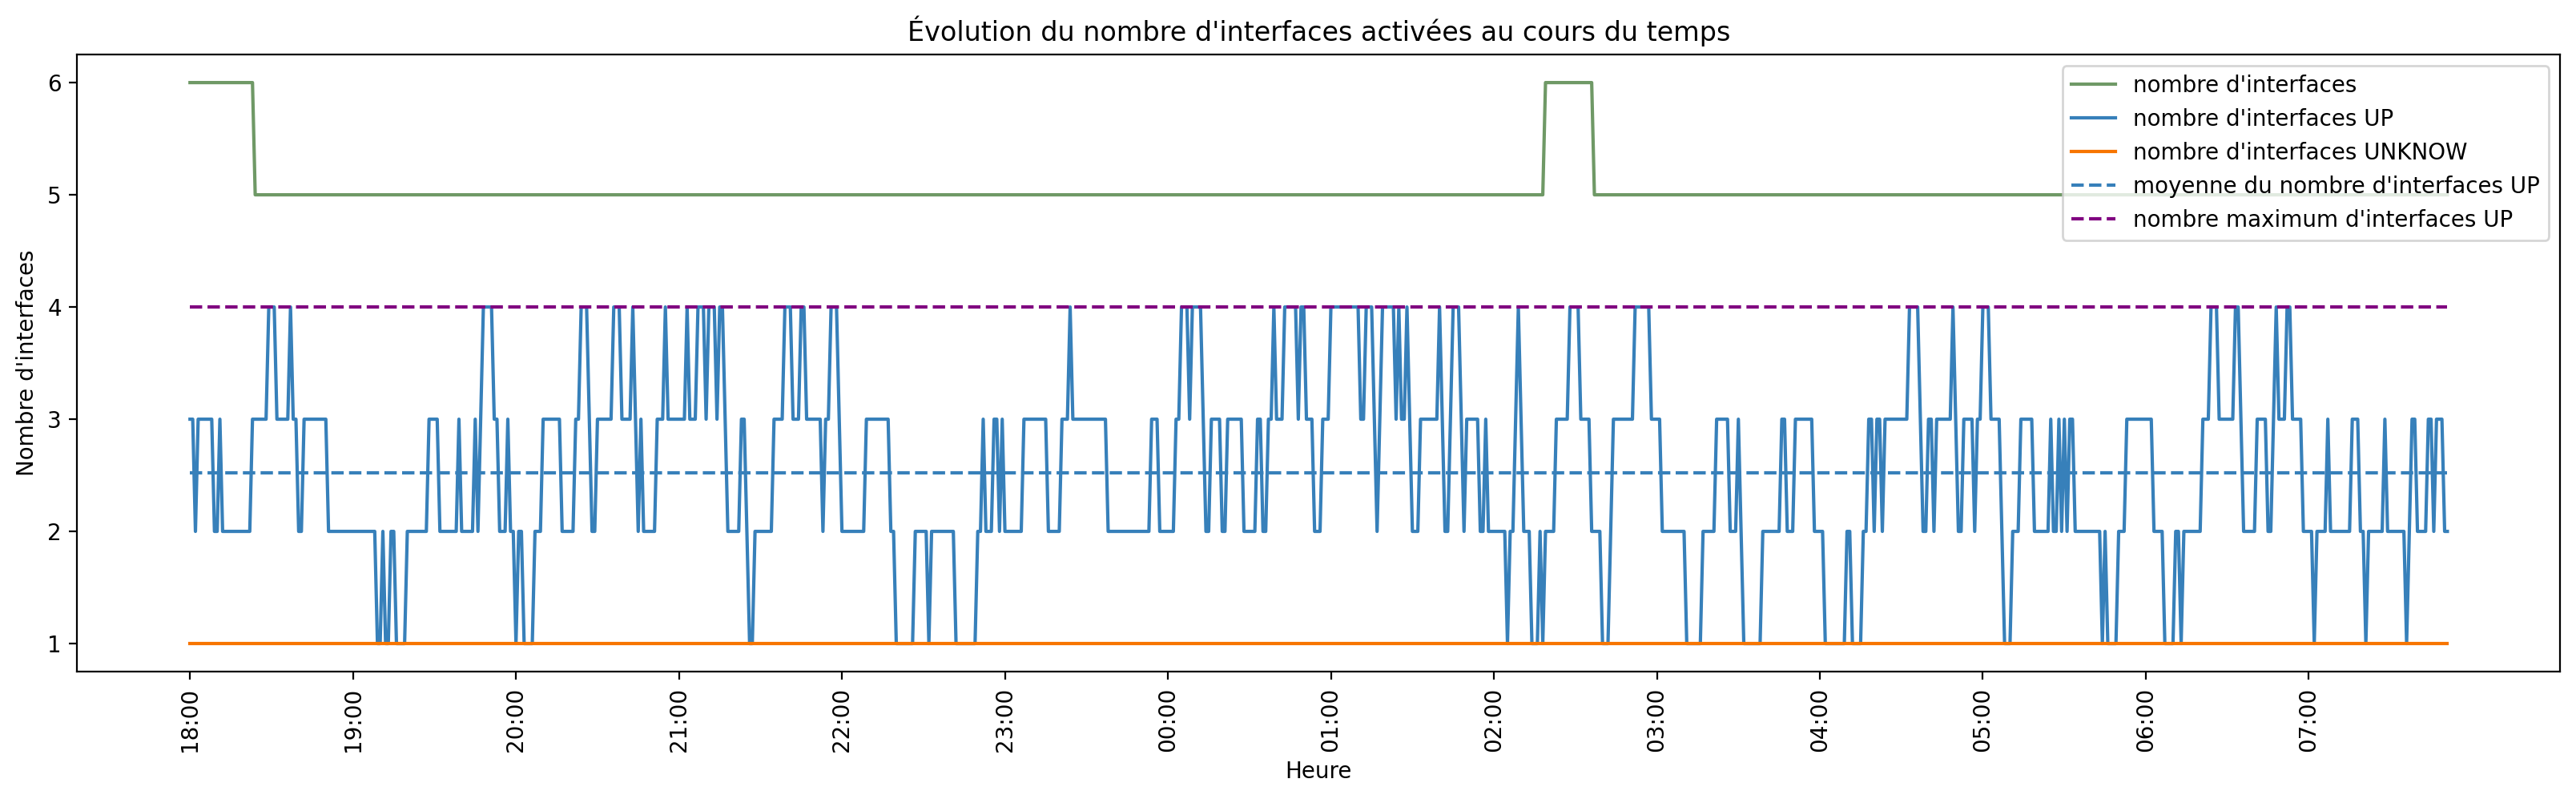

In [3]:
# courbes_evolution_nb_interfaces.py
# Ce programme permet d'afficher des courbes permettant de visualiser l'évolution du nombre d'interfaces 
# et de leurs états au court du temps, grâce au module Mathplotlib.
# Ce programme a besoin des données traitées par les programmes calcul_statistiques.py et recuperation_donnees.py pour fonctionner.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 03/01/2024 par Yann.

### Importation des modules ###
import numpy as np
import matplotlib.pyplot as plt

def affPlot(x1 : list[str], y1 : list[int], y2 : list[int], y3 : list[int], y4 : list[int], y5_temp : float, y6_temp : int) -> None:
    """Crée et affiche un graphique contenant des courbes représentant l'évolution du statut des interfaces au cours du temps.

    Args:
        x1 (list[str]): liste contenant chaque heure de mesure (toutes les minutes) (abscisse)
        y1 (list[int]): liste contenant le nombre d'interfaces de la machine, mesuré chaque minute.
        y2 (list[int]): liste contenant le nombre d'interfaces avec le statut UP, mesuré chaque minute.
        y3 (list[int]): liste contenant le nombre d'interfaces avec le statut DOWN, mesuré chaque minute.
        y4 (list[int]): liste contenant le nombre d'interfaces avec le statut UNKNOW, mesuré chaque minute.
        y5_temp (float): moyenne du nombre d'interfaces UP, calculée par le programme calcul_statistiques.py.
        y6_temp (int): nombre maximum d'interfaces UP, calculé par le programme calcul_statistiques.py.
    """
    ### Création du graphique ###
    plt.figure(figsize=(20,5), dpi=200)
    plt.xticks(np.arange(0, len(x1), 60), rotation = 90)
    plt.yticks(np.arange(min(y2), max(y1)+1, 1))

    ### Conversion d'un nombre seul en liste contenant x1 fois ce nombre ###
    y5 : list[float] = [y5_temp]*len(x1)
    y6 : list[int] = [y6_temp]*len(x1)

    ### Création des courbes ###
    plt.plot(x1, y1, color="#6f9966", label="nombre d'interfaces")
    plt.plot(x1, y2, color="#3780ba", label="nombre d'interfaces UP")
    #plt.plot(x1, y3, color="#dde0ea", label="nombre d'interfaces DOWN")
    plt.plot(x1, y4, color="#f77500", label="nombre d'interfaces UNKNOW")
    plt.plot(x1, y5, color="#3780ba", label="moyenne du nombre d'interfaces UP", linestyle="dashed")
    plt.plot(x1, y6, color="purple", label="nombre maximum d'interfaces UP", linestyle="dashed")
    
    ### Création de la légende ###
    plt.title("Évolution du nombre d'interfaces activées au cours du temps")
    plt.ylabel("Nombre d'interfaces")
    plt.xlabel("Heure")
    plt.legend()

    ### Affichage du graphique ###
    plt.show()

affPlot(x1 = transposee[6], y1 = transposee[1], y2=transposee[2], y3=transposee[3], y4=transposee[4], y5_temp=stats_interfaces["moyenne_nb_int_up"], y6_temp=stats_interfaces["max_nb_int_up"])

#### Preuves de fonctionnement :

##### Avec la ligne `plt.plot(x1, y3, color="#dde0ea", label="nombre d'interfaces DOWN")` en commentaire :
![4.1_courbes_1.png](images\preuves_de_fonctionnement\4.1_courbes_1.png)

##### Avec la ligne `plt.plot(x1, y3, color="#dde0ea", label="nombre d'interfaces DOWN")` décommentée :
![4.1_courbes_2.png](images\preuves_de_fonctionnement\4.1_courbes_2.png)

[Retour en haut](#)

### 4.2 Diagramme circulaire : Temps d'utilisation de chaque réseau<a class="anchor" id="42"> </a>
L'utilisation d'un diagramme circulaire permet de représenter, la proportion de temps d'utilisation de chaque réseau de manière très simple. Ce diagramme est lisible en un coup d'oeil et rapide à générer.

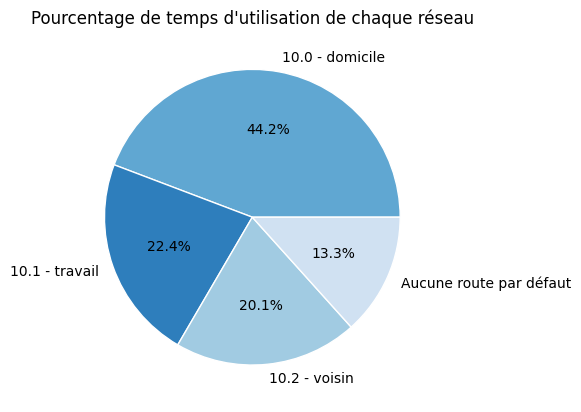

In [4]:
# diagramme_circulaire_temps_sur_chaque_reseau.py
# Ce programme permet d'afficher un diagramme circulaire permettant de visualiser la proportion de temps d'utilisation de chaque réseau, grâce au module Mathplotlib.
# Ce programme a besoin des données traitées par les programmes calcul_statistiques.py et recuperation_donnees.py pour fonctionner.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 31/12/2023 par Yann.

### Importation des modules ###
import matplotlib.pyplot as plt

def route_par_defaut_pie(donnees : list[int]) -> None:
    """Crée et affiche un diagramme circulaire représentant la proportion temps d'utilisation de chaque réseau.

    Args:
        donnees (list[int]): liste contenant le temps d'utilisation de chaque réseau, en minutes,
        dans l'ordre "10.0 - domicile", "10.1 - travail", "10.2 - voisin" puis "Aucune route par défaut".
    """
    labels : list[str]
    colors : list[str]
    wedgeprops : dict

    labels = ["10.0 - domicile", "10.1 - travail", "10.2 - voisin", "Aucune route par défaut"]
    colors = ["#60a7d2", "#2e7ebc", "#a1cbe2", "#d0e1f2"] # Couleurs utilisé par le schéma
    wedgeprops={"linewidth": 1, "edgecolor": "white"} # Ligne de séparation entre chaque secteur

    plt.pie(donnees, labels=labels, colors=colors, wedgeprops=wedgeprops, autopct='%1.1f%%')
    plt.title("Pourcentage de temps d'utilisation de chaque réseau")
    plt.show

route_par_defaut_pie(time_in_each_network.values())

#### Preuves de fonctionnement :

![4.2_pie.png](images\preuves_de_fonctionnement\4.2_pie.png)

[Retour en haut](#)

### 4.3 Diagramme en barres empilées : Durée de connexion à chaque réseau par heure<a class="anchor" id="43"> </a>

Comme contrainte, nous nous sommes imposé d'utiliser une liste de dictionnaires en entrée des fonctions, pour les deux graphiques suivants. Ce n'est évidemment pas la manière la plus optimisée, mais c'était un bon exercice pour renforcer notre maitrise des dictionnaires Python tout en répondant à la consigne.

Deux versions du diagramme existent : une ayant l'axe des ordonnées en minutes, l'autre ayant l'axe des ordonnées en pourcent.

Ces diagrammes en barres empilées permettent de représenter les même données que celles du diagramme circulaire, avec une meilleure précision (à l'échelle d'une heure plutôt qu'à l'échelle globale), mais aussi avec plus de complexité.

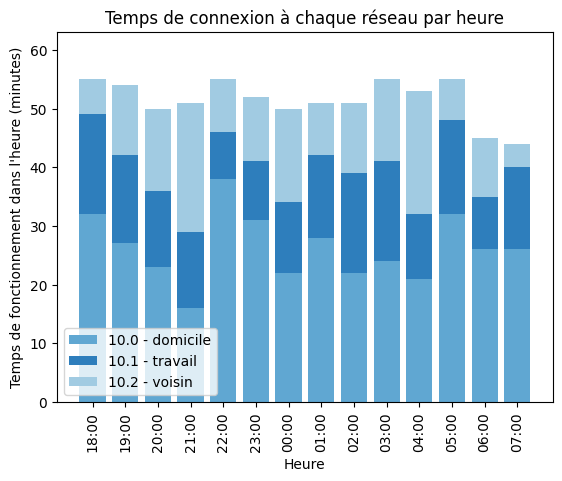

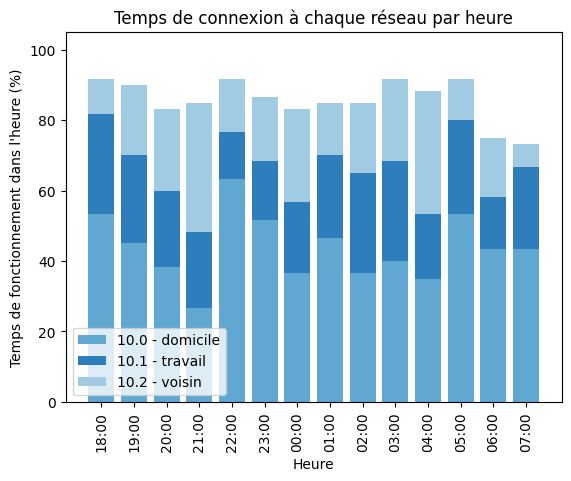

In [5]:
# diagramme_barres_empilees_temps_sur_chaque_reseau_par_heure.py
# Ce programme permet d'afficher des barres empilées permettant de visualiser la proportion de temps d'utilisation de chaque réseau par heure, grâce au module Mathplotlib.
# Ce programme a besoin des données traitées par les programmes calcul_statistiques.py et recuperation_donnees.py pour fonctionner.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 31/12/2023.

### Importation des modules ###
import numpy as np
import matplotlib.pyplot as plt

def show_route_par_defaut_in_bars(unit : str, hours : list[str], time_in_dot0 : list[int], time_in_dot1 : list[int], time_in_dot2 : list[int], time_with_no_road : list[int]) -> None:
    """Crée et affiche le graphique en barres empilées illustrant la durée de connexion à chaque réseau par heure,
    une fois les données préprarées par les fonctions route_par_defaut_bars et route_par_defaut_bars_percentage.

    Args:
        unit (str): unité du temps de fonctionnement dans l'heure (minute ou %)
        hours (list[str]): liste contenant l'heure de chaque barre (toutes les 60 minutes) (abscisse)
        time_in_dot0 (list[int]): liste contenant le temps (en minutes ou en pourcentage) passé chaque heure sur la route par défaut 10.0.255.254
        time_in_dot1 (list[int]): liste contenant le temps (en minutes ou en pourcentage) passé chaque heure sur la route par défaut 10.1.255.254
        time_in_dot2 (list[int]): liste contenant le temps (en minutes ou en pourcentage) passé chaque heure sur la route par défaut 10.2.255.254
        time_with_no_road (list[int]): liste contenant le temps (en minutes ou en pourcentage) passé chaque heure sans route par défaut
    """
    ### Définition de la hauteur à partir de laquelle chaque barre doit être représentée ###
    bottom_dot1 : list[int] = time_in_dot0
    bottom_dot2 = np.add(time_in_dot0, time_in_dot1)
    bottom_no_road = np.add(bottom_dot2, time_in_dot2)

    ### Création des barres à afficher ###
    plt.bar(hours, time_in_dot0, label='10.0 - domicile', color="#60a7d2")
    plt.bar(hours, time_in_dot1, bottom=bottom_dot1, label='10.1 - travail', color="#2e7ebc")
    plt.bar(hours, time_in_dot2, bottom=bottom_dot2, label='10.2 - voisin', color = "#a1cbe2")
    plt.bar(hours, time_with_no_road, bottom=bottom_no_road, color="white")

    ### Créations de la légende  ###
    plt.title("Temps de connexion à chaque réseau par heure")
    plt.xlabel('Heure')
    plt.ylabel(f"Temps de fonctionnement dans l'heure ({unit})")
    plt.xticks(rotation = 90)
    plt.legend()

    ### Affichage du graphique ###
    plt.show()


def route_par_defaut_bars(time_in_each_network_by_hour : list[dict]) -> None:
    """Prépare les données pour qu'elles soient utilisable par la fonction show_route_par_defaut_in_bars, puis appelle cette fonction show_route_par_defaut_in_bars.
    Les données permetteront la création d'un graphique en barres empilées tel que décrit dans le docstring de la fonction show_route_par_defaut_in_bars, 
    en utilisant comme unité les MINUTES.
    Comme contrainte, nous nous sommes imposé d'utiliser une liste de dictionnaires en entrée des fonctions, pour les deux graphiques suivants. 
    Ce n'est évidemment pas la manière la plus optimisée, mais c'était un bon exercice pour renforcer notre maitrise des dictionnaires Python tout en répondant à la consigne.

    Args:
        time_in_each_network_by_hour (list[dict]): liste de dictionnaires représentant le temps (le nombre de minutes) que l'ordinateur a passé CHAQUE HEURE dans chaque réseau
    """
    i : int
    hours : list[str] = []
    time_in_dot0 : list[int] = []
    time_in_dot1 : list[int] = []
    time_in_dot2 : list[int] = []
    time_with_no_road : list[int] = []

    for i in range(len(time_in_each_network_by_hour)):
        hours.append(time_in_each_network_by_hour[i]["hour"])
        time_in_dot0.append(time_in_each_network_by_hour[i]["time_in_dot0"])
        time_in_dot1.append(time_in_each_network_by_hour[i]["time_in_dot1"])
        time_in_dot2.append(time_in_each_network_by_hour[i]["time_in_dot2"])
        time_with_no_road.append(time_in_each_network_by_hour[i]["time_with_no_road"])

    show_route_par_defaut_in_bars("minutes", hours, time_in_dot0, time_in_dot1, time_in_dot2, time_with_no_road)


def route_par_defaut_bars_percentage(time_in_each_network_by_hour : list[dict]) -> None:
    """Prépare les données pour qu'elles soient utilisable par la fonction show_route_par_defaut_in_bars, puis appelle cette fonction show_route_par_defaut_in_bars.
    Les données permetteront la création d'un graphique en barres empilées tel que décrit dans le docstring de la fonction show_route_par_defaut_in_bars, 
    en utilisant comme unité le POURCENTAGE.
    Comme contrainte, nous nous sommes imposé d'utiliser une liste de dictionnaires en entrée des fonctions, pour les deux graphiques suivants. 
    Ce n'est évidemment pas la manière la plus optimisée, mais c'était un bon exercice pour renforcer notre maitrise des dictionnaires Python tout en répondant à la consigne.

    Args:
        time_in_each_network_by_hour (list[dict]): liste de dictionnaires représentant le temps (le nombre de minutes) que l'ordinateur a passé CHAQUE HEURE dans chaque réseau
    """
    i : int
    hours : list[str] = []
    time_in_dot0_percent : list[int] = []
    time_in_dot1_percent : list[int] = []
    time_in_dot2_percent : list[int] = []
    time_with_no_road_percent : list[int] = []

    for i in range(len(time_in_each_network_by_hour)):
        hours.append(time_in_each_network_by_hour[i]["hour"])
        time_in_dot0_percent.append(time_in_each_network_by_hour[i]["time_in_dot0"] / 60 * 100)
        time_in_dot1_percent.append(time_in_each_network_by_hour[i]["time_in_dot1"] / 60 * 100)
        time_in_dot2_percent.append(time_in_each_network_by_hour[i]["time_in_dot2"] / 60 * 100)
        time_with_no_road_percent.append(time_in_each_network_by_hour[i]["time_with_no_road"] / 60 * 100)

    show_route_par_defaut_in_bars("%", hours, time_in_dot0_percent, time_in_dot1_percent, time_in_dot2_percent, time_with_no_road_percent)


route_par_defaut_bars(time_in_each_network_by_hour)
route_par_defaut_bars_percentage(time_in_each_network_by_hour)

#### Preuves de fonctionnement :

![4.3_barres_en_minutes.png](images\preuves_de_fonctionnement\4.3_barres_en_minutes.png)
![4.3_barres_en_pourcent.png](images\preuves_de_fonctionnement\4.3_barres_en_pourcent.png)

[Retour en haut](#)

### 4.4 Diagramme 3D en barres : Durée de connexion à chaque réseau selon leurs localisations<a class="anchor" id="44"> </a>
La représentation des données en 3D permet l'ajout d'une dimension supplémentaire : les distances, ici imaginaires, entre les trois lieux de connexion de l'ordinateur (un lieu = une route par défaut).

/!\ ATTENTION /!\ Pour interagir avec le graphique en 3D, il est recommandé d'exécuter le code de cette cellule dans un fichier .py basique, et non dans un notebook.


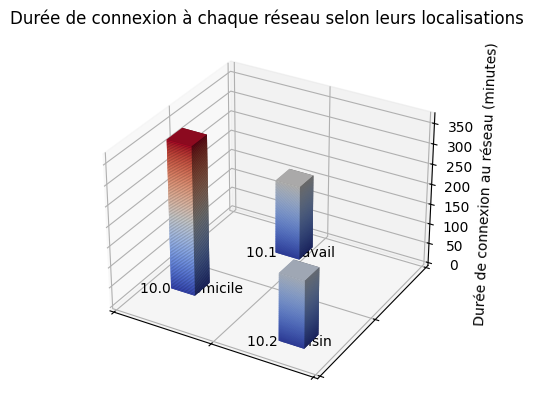

In [6]:
# diagramme_barres_3D_temps_sur_chaque_reseau.py
# Ce programme permet d'afficher en 3D des barres permettant de visualiser la proportion de temps d'utilisation de chaque réseau
# selon leurs localisations, grâce au module Mathplotlib.
# Ce programme a besoin des données traitées par les programmes calcul_statistiques.py et recuperation_donnees.py pour fonctionner.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 31/12/2023 par Yann.

### Importation des modules ###
import matplotlib.pyplot as plt
from matplotlib import cm

def route_par_defaut_3D_bars(time_in_each_network : dict[str, int]) -> None:
    """Crée et affiche un graphique 3D en barres représentant la durée de connexion de l'ordinateur à chaque réseau, selon leurs localisation.

    Args:
        time_in_each_network (dict[str, int]): liste de dictionnaires représentant le temps (le nombre de minutes) que l'ordinateur a passé dans chaque réseau 
        pendant toute la capture des données.
    """
    # /!\ ATTENTION /!\ Pour pouvoir interagir avec le graphique en 3D, il est recommandé d'exécuter le code de cette cellule dans un fichier .py basique, et non dans un notebook.
    print("/!\ ATTENTION /!\ Pour interagir avec le graphique en 3D, il est recommandé d'exécuter le code de cette cellule dans un fichier .py basique, et non dans un notebook.")

    ### Taille de chaque barre du graphique ###
    total_time_in_dot0 : int = time_in_each_network["time_in_dot0"]
    total_time_in_dot1 : int = time_in_each_network["time_in_dot1"]
    total_time_in_dot2 : int = time_in_each_network["time_in_dot2"]

    ### Initialisation de la figure 3D ###
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ### Coordonnées des barres du graphique ###
    xpos : list[float] = [0.25, 0.75, 1.5] # position en x de la base des trois barres
    ypos : list[float] = [0.5, 1.5, 0.25] # position en y de la base des trois barres
    largeur : list[float] = [0.25, 0.25, 0.25] # largeur des barres
    profondeur : list[float] = [0.25, 0.25, 0.25] # profondeur des barres
    hauteur : list[int] = [total_time_in_dot0, total_time_in_dot1, total_time_in_dot2] # hauteur des barres

    ### Création des barres à partir de sous-barres de couleurs différentes (afin de créer un dégradé) ###
    max_height : int = max(hauteur) # hauteur maximale des barres pour la normalisation des couleurs du dégradé
    nb_sousbarres : int = 100 # nombre de barres à superposer pour créer le dégradé de couleur

    for i in range(len(xpos)): # pour chacune des barres
        color = hauteur[i] / max_height
        for numero_sousbarre in range(nb_sousbarres):
            zpos = numero_sousbarre * hauteur[i] / nb_sousbarres # position en z (hauteur) de la sous-barre
            hauteur_sousbarre = hauteur[i] / nb_sousbarres
            ax.bar3d(xpos[i], ypos[i], zpos, largeur[i], profondeur[i], hauteur_sousbarre, color=cm.coolwarm(color * (numero_sousbarre/nb_sousbarres)))

    ### Création des labels ###
    ax.set_title('Durée de connexion à chaque réseau selon leurs localisations')
    ax.set_zlabel("Durée de connexion au réseau (minutes)")
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.set_xticklabels([]) # forcer la suppression des labels des ticks l'axe x
    ax.set_yticklabels([]) # forcer la suppression des labels des ticks l'axe y

    labels = ['10.0 - domicile', '10.1 - travail', '10.2 - voisin']
    for i in range(len(xpos)):
        ax.text(xpos[i] - 0.2, ypos[i] - 0.2, 0, labels[i])

    ### Affichage du graphique ###
    plt.show()

route_par_defaut_3D_bars(time_in_each_network)

#### Preuves de fonctionnement :

<img src="images\preuves_de_fonctionnement\4.4_barres_3D_png.png" height="400">
<img src="images\preuves_de_fonctionnement\4.4_barres_3D_gif.gif" height="400">


[Retour en haut](#)

### 4.5 Diagramme 3D en barres : Durée de connexion à chaque réseau par heure, selon leurs localisations<a class="anchor" id="45"> </a>
Suite à l'ajout d'une troisième dimension dans le diagramme précédent, nous avons voulu en ajouter une quatrième pour une meilleure échelle de précision : l'heure. L'heure, dont les données sont visualisées sur l'écran, peut maintenant être choisie grâce à un curseur.

/!\ ATTENTION /!\ Pour interagir avec le graphique en 3D, il est recommandé d'exécuter le code de cette cellule dans un fichier .py basique, et non dans un notebook.


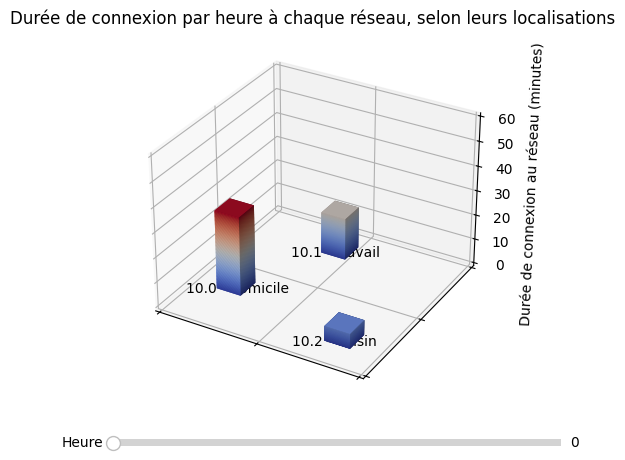

In [7]:
# diagramme_barres_3D_temps_sur_chaque_reseau_par_heure.py
# Ce programme permet d'afficher en 3D des barres permettant de visualiser la proportion de temps d'utilisation de chaque réseau par heure, et
# selon leurs localisations, grâce au module Mathplotlib.
# Ce programme a besoin des données traitées par les programmes calcul_statistiques.py et recuperation_donnees.py pour fonctionner.
# Écrit par Yann Plougonven--Lastennet et Gurvan Mury,
# élèves en BUT réseaux et télécommunications à l'IUT de Lannion.
# Dernière édition de ce fichier le 31/12/2023 par Yann.

### Importation des modules ###
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib import cm
import numpy as np


def route_par_defaut_live_3D_bars(time_in_each_network_by_hour : list[dict]) -> None:
    """Crée et affiche un graphique 3D en barres représentant la durée de connexion de l'ordinateur à chaque réseau, selon leurs localisation, 
    pendant l'heure choisie par l'utilisateur avec un curseur.

    Args:
        time_in_each_network_by_hour (list[dict]): liste de dictionnaires représentant le temps (le nombre de minutes) que l'ordinateur a passé CHAQUE HEURE dans chaque réseau.
    """
    # /!\ ATTENTION /!\ Pour pouvoir interagir avec le graphique en 3D, il est recommandé d'exécuter le code de cette cellule dans un fichier .py basique, et non dans un notebook.
    print("/!\ ATTENTION /!\ Pour interagir avec le graphique en 3D, il est recommandé d'exécuter le code de cette cellule dans un fichier .py basique, et non dans un notebook.")
    
    ### Typage des variables ###
    hours : list[str] = []
    xpos : list[float]
    ypos : list[float]
    largeur : list[float]
    profondeur : list[float]
    hauteur : list[int]
    bars : list 
    max_height : int
    nb_sousbarres_previsualisation : int 
    i : int
    labels : list[str]

    ### Initialisation de la figure 3D ###
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ### Initialisation du curseur ###
    axtime = plt.axes([0.2, 0.01, 0.7, 0.03]) # positionnement et taille du curseur
    slider_time = Slider(axtime, 'Heure', 0, len(time_in_each_network_by_hour)-1, valinit=0, valstep=1)
    
    for i in range(len(time_in_each_network_by_hour)):
        hours.append(time_in_each_network_by_hour[i]["hour"])

    ### Coordonnées des barres du graphique ###
    xpos = [0.25, 0.75, 1.5] # position en x de la base des trois barres
    ypos = [0.5, 1.5, 0.25] # position en y de la base des trois barres
    largeur = [0.25, 0.25, 0.25] # largeur des barres
    profondeur = [0.25, 0.25, 0.25] # profondeur des barres
    
    # Hauteur des barres :
    hauteur = [time_in_each_network_by_hour[0]['time_in_dot0'], 
               time_in_each_network_by_hour[0]['time_in_dot1'], 
               time_in_each_network_by_hour[0]['time_in_dot2']]
    

    ### Afficher les premières barres dès le début ###
    bars = []
    max_height = max(hauteur) # hauteur maximale des barres pour la normalisation des couleurs du dégradé
    nb_sousbarres_previsualisation : int = 100 # nombre de barres à superposer pour créer le dégradé de couleur (réduire ce nombre sur les ordinateurs peu performants)
    for i in range(len(xpos)): # pour chacune des barres
        color = hauteur[i] / max_height
        for z in np.arange(0, hauteur[i], hauteur[i]/nb_sousbarres_previsualisation):
            bars.append(ax.bar3d(xpos[i], ypos[i], z, largeur[i], profondeur[i], hauteur[i]/nb_sousbarres_previsualisation, color=cm.coolwarm(color * (z/hauteur[i]))))

    ### Mettre à jour chaque barre quand le curseur est utilisé ###
    def update(val) -> None:
        """Méthode appellée pour mettre à jour les barres affichées sur le graphique, lorsque le curseur est bougé par l'utilsateur.

        Args:
            val : valeur quelquonque exigée par mathplotlib, ne devant pas figurer dans l'appel de la méthode.
        """
        numero_heure = int(slider_time.val)
        slider_time.valtext.set_text(hours[numero_heure]) # changer la valeur de l'heure à côté du curseur
        
        # Hauteur des barres :
        hauteur = [time_in_each_network_by_hour[numero_heure]['time_in_dot0'], 
                   time_in_each_network_by_hour[numero_heure]['time_in_dot1'], 
                   time_in_each_network_by_hour[numero_heure]['time_in_dot2']]

        ### Supprimer les barres à remplacer ###
        for bar in bars:
            bar.remove()
        bars.clear()

        ### Afficher les nouvelles barres ###
        max_height : int = max(hauteur) # hauteur maximale des barres pour la normalisation des couleurs du dégradé
        nb_sousbarres = 50 # nombre de barres à superposer pour créer le dégradé de couleur (réduire ce nombre sur les ordinateurs peu performants)
        for i in range(len(xpos)): # pour chacune des barres
            color = hauteur[i] / max_height
            for z in np.arange(0, hauteur[i], hauteur[i]/nb_sousbarres):
                bars.append(ax.bar3d(xpos[i], ypos[i], z, largeur[i], profondeur[i], hauteur[i]/nb_sousbarres, color=cm.coolwarm(color * (z/hauteur[i]))))

    slider_time.on_changed(update)

    ### Création des labels ###
    ax.set_title('Durée de connexion par heure à chaque réseau, selon leurs localisations')
    ax.set_zlabel("Durée de connexion au réseau (minutes)")
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.set_zlim(0, 60) # forcer l'axe z à toujours être à la même hauteur (ici 60, pour 60 minutes dans une heure)
    ax.set_xticklabels([]) # forcer la suppression des labels des ticks l'axe x
    ax.set_yticklabels([]) # forcer la suppression des labels des ticks l'axe y

    labels = ['10.0 - domicile', '10.1 - travail', '10.2 - voisin']
    for i in range(len(xpos)):
        ax.text(xpos[i] - 0.2, ypos[i] - 0.2, 0, labels[i])

    ### Affichage du graphique ###
    plt.show()

route_par_defaut_live_3D_bars(time_in_each_network_by_hour)

#### Preuves de fonctionnement :

<img src="images\preuves_de_fonctionnement\4.5_barres_3D_selon_heure_18h_png.png" height="500">
<img src="images\preuves_de_fonctionnement\4.5_barres_3D_selon_heure_21h_png.png" height="500">
<img src="images\preuves_de_fonctionnement\4.5_barres_3D_selon_heure_gif.gif" height="500">

## Conclusion du projet <a class="anchor" id="conclusion"> </a>

Ce projet démontre le potentiel et la puissance de l'utilisation conjointe de fichiers CSV et du langage de programmation Python.

Il illustre la flexibilité et la facilité offertes par Python et sa bibliothèque Matplotlib, pour représenter graphiquement, en 2D ou en 3D, des données et leur évolution.

La mise sous forme de liste et de dictionnaires des données, ainsi que le calcul de statistiques, nous ont permis de préparer les données pour leur représentation graphique.

Finalement, ce projet nous a permis de développer nos capacités en bash et en Python, ainsi que de nous familiariser avec les modules csv, Numpy, et surtout Mathplotlib. Le tout en nous faisant remarquer que ces outils, bien maitrisés, peuvent être utiles dans la vie personnelle  et professionnelle.

Un projet similaire aurait pu être réalisé par une personne cherchant à mieux comprendre les causes et conséquences des problèmes de connexion de son ordinateur.

[Retour en haut](#)